# Capture traces for 07.12

#### Try-out

In [ ]:
!pip install ipython ipympl ipywidgets -Uq
!pip install --upgrade ipython -Uq

In [1]:
import matplotlib.pylab as plt

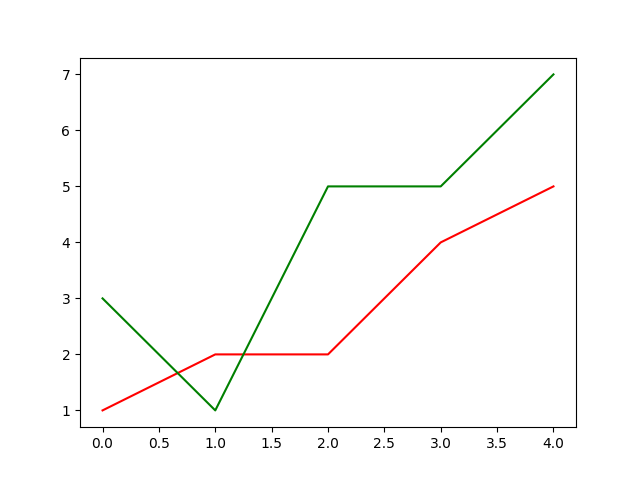

In [2]:
%matplotlib ipympl
import matplotlib.pylab as plt
    
plt.plot([1,2,2,4,5], 'r')
plt.plot([3,1,5,5,7], 'g')
plt.show()

#### Agregates

In [12]:
import matplotlib.pyplot as plt

In [ ]:
%run "./File_Uploader.ipynb"

In [2]:
%run "./ANN_Observer.ipynb"

✔️ The Setuper class succesfuly imported.
✔️ The ANN_Observer class succesfuly imported.


In [27]:
%run "./Analyser.ipynb"

[ 8  2  6  4  4  6 10  6]
[256, 258, 4550, 1666, 2245, 6546, 7888, 6788]
[  512   516  9100  3332  4490 13092 15776 13576]
[ 256  258 4550 1666 2245 6546 7888 6788]
256
258
4550
1666
2245
6546
7888
6788
✔️ The Analyser succesfuly runned.


#### Definitions

In [5]:
scope : cw.scope = None
target: cw.target = None
cw_setuper: CW_Setuper
def setup(makedir):
    global scope
    global target
    global cw_setuper
    make_dir = makedir
    re_init_config = {"MAKEDIR" : f'./{make_dir}/'}
    cw_setuper = CW_Setuper(firmware_reinit = True, re_init_dict  = re_init_config)
    scope = cw_setuper.scope
    target = cw_setuper.target
    return scope, target, cw_setuper

In [6]:
def calc_corr(waves, rand_inputs, _func, _name, epochs, trace_len):
    ncorr_all1 = _func(rand_inputs, np.array(waves)[:,:], n_traces = epochs, trace_len = trace_len, ith_weight = 0, calc_p_value=False)
    np.save(f"E:/DP_database/database/corrs_{_name}.npy", np.array(ncorr_all1))
    plot_mult(np.array(ncorr_all1)[:,:], _type = "tmp", ylim=[-1,1])
    return ncorr_all1

In [7]:
def capture_correlate(scope, epochs_list = [3000], ncorr_all1 = None, ncorr_all2 = None, decimate = 1, reverse = False, runName="_722_BasicMLP"):
    for i in trange(len(epochs_list), desc='Capturing and Analysing the traces:'):
        global epochs
        epochs = epochs_list[i]
        cmd = 'p'
        if reverse:
            cmd = 'o'
        name = f"{runName}_Dec{decimate}-ntg{decimate}-{epochs}" #ntg no-target-reset
     
        scope_setup(samples=24429, decimate=decimate)    
        traces, rand_inputs = measure_traces(cmd=cmd)
        waves = []
        out_data = []
        for i in traces:
            waves.append(i[0])
            out_data.append(i[2])
        plot_mult(np.array(waves[0]), _type = name, mult=False)
        files = save_data(waves, rand_inputs, out_data[0], path="E:/DP_database/database", name_extended = name)
        #upload_file_to_gdrive(files,  dir_path = "E:/DP_database/database/")
        #Analysis
        print(out_data[0])
        ith_weight = 0
        start = ith_weight*epochs
        #rand_inputs = np.array(rand_inputs)
        #ncorr_all1 = calc_corr(waves=np.array(waves)[:,4000:10000], rand_inputs= np.array(rand_inputs), _func=V2_ANN_CPA_OTS, _name="tmp_corr", epochs=epochs, trace_len=6000)
        #ncorr_all2 = calc_corr(waves=np.array(waves)[:,4000:10000], rand_inputs= np.array(rand_inputs), _func=oldV2_ANN_CPA_OTS, _name="tmp_corr", epochs=epochs, trace_len=6000)
        #ncorr_all3 = calc_corr(waves=np.array(waves)[:,4000:10000], rand_inputs= np.array(rand_inputs), _func=ancientV2_ANN_CPA_OTS, _name="tmp_corr", epochs=epochs, trace_len=6000)
        
        ncorr_all1 = calc_corr(waves=waves, rand_inputs= np.array(rand_inputs), _func=V2_ANN_CPA_OTS, _name="tmp_corr", epochs=epochs, trace_len=24000)
        ncorr_all2 = calc_corr(waves=waves, rand_inputs= np.array(rand_inputs), _func=oldV2_ANN_CPA_OTS, _name="tmp_corr", epochs=epochs, trace_len=24000)
        ncorr_all3 = calc_corr(waves=waves, rand_inputs= np.array(rand_inputs), _func=ancientV2_ANN_CPA_OTS, _name="tmp_corr", epochs=epochs, trace_len=24000)
        
    cw_setuper._scope_disc_()
    scope : cw.scope = None
    target: cw.target = None
    return ncorr_all1, ncorr_all2, ncorr_all2, rand_inputs, waves, out_data[0]

In [26]:
def analyse_corr(corr_map: np.ndarray, weights: list[int], stop_num = 5, maxims_map = None, _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3):
    index = _index
    for secret in weights:
        
        print(f"Hello {secret}")
        secret_value, time_sample, correlation, localMax_vector, colmn_maxVector, nextIndex, maxims_map = get_weight(corr_map,
                                                                                                                     peak_range,
                                                                                                                     show_info=True,
                                                                                                                     lastIndex=index,
                                                                                                                     map_2dgrMaxs=maxims_map,
                                                                                                                     mountain_half_dist=mountain_half_dist,
                                                                                                                     level=level)
    
        index = nextIndex
        figure, axis = plt.subplots(1, 2)
        # Comparison to real correlation
        axis[0].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
        axis[0].plot(corr_map[secret], color='g', label=f'secret_val_corr = {secret}', linewidth=0.5)
        #axis[0].legend(loc='upper right')
        axis[0].legend(bbox_to_anchor=(0.75, 1.15), ncol=2)
        axis[0].set_title("All - Real")
        plt.xlabel("Time Sample")
        plt.ylabel("Correlation")
        plt.axvline(x = index, color = 'orange')
    
        # Comparison to found correlation
        axis[1].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
        axis[1].plot(corr_map[secret_value], color='r', label=f'found_corr = {secret_value}', linewidth=0.5)
        #axis[1].legend(loc='upper right')
        axis[1].legend(bbox_to_anchor=(0.75, -0.5), ncol=2)
        axis[1].set_title("All - Found")
        plt.axvline(x = index, color = 'orange')
    
        #figure.savefig(f'{name}_correlation.png')
    
        stop_num -= 1
        if stop_num == 0:
            break
        plt.show()
        last_found_indx = time_sample

## Capture Traces

## Zkonstatovanie: 

- Uz viem co sposobovalo poruchu/ghost peaks, ako je zrejme z definicie uintX_t, je to iba struktura ktora zakonponava unsigned char do urcitych mier, typujem ze obsahuje i pocet bytov, alebo charov ktore ma obsahovat a podobne, a mozno i ine hodnoty
- z tohto dovodu vydime celkom vysoku hodnotu correlacie pre tuto vahu vsade kde by mala byt i realna. <--- Riesenie nahrad uint8_t za unsigned char, uint16/32_t za int, a pretipovanie rob norm. s %256 (v pripade ze opt. je vypnuta, vzhladom na to ze v tomto pripade moze dojst k undefined behavior)

## QUANTIZATED MULT CPA, tryout with 2 similar but different CPA algs. 

In [11]:
scope.dis()
target.dis()

#### Semi quantized

In [13]:
scope, target, cw_setuper = setup("makefile_dir_basic_mult")
time.sleep(30)

⚠️ Changed, firmware config!!!
✔️ Firmware maked, with command cd %s | make CRYPTO_TARGET=%s PLATFORM=%s FIRMWAREPATH=%s SS_VER=%s TARGET=%s> output.txt 2>warnings_new.txt.
INFO: Found ChipWhisperer😍
✔️ INFO: Scope and Target, are set😍
❤️ Target hex: ./makefile_dir_basic_mult/simpleserial-target-CWLITEARM.hex
Detected known STMF32: STM32F302xB(C)/303xB(C)
Extended erase (0x44), this can take ten seconds or more
Attempting to program 11243 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 11243 bytes
✔️ Setuper initiated.


Capturing and Analysing the traces::   0%|          | 0/1 [00:00<?, ?it/s]

⚠️ Generating rand_input..


                                Capturing traces:   0%|          | 0/3000 [00:00<?, ?it/s]

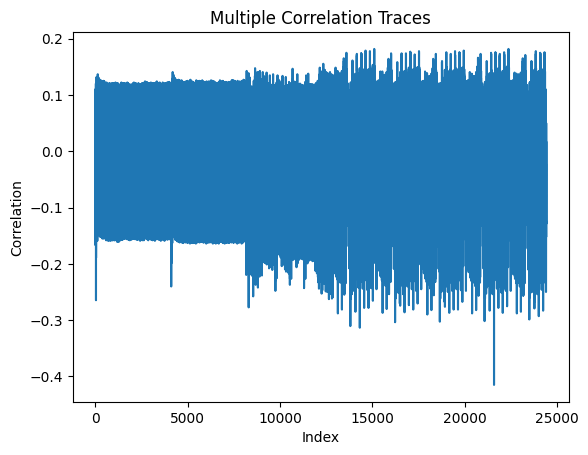

✔️ Saving Rand_input succesfull.
🌍 Saving Secret_weights succesfull.
CWbytearray(b'00 72 02 1b 00 97 00')


Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

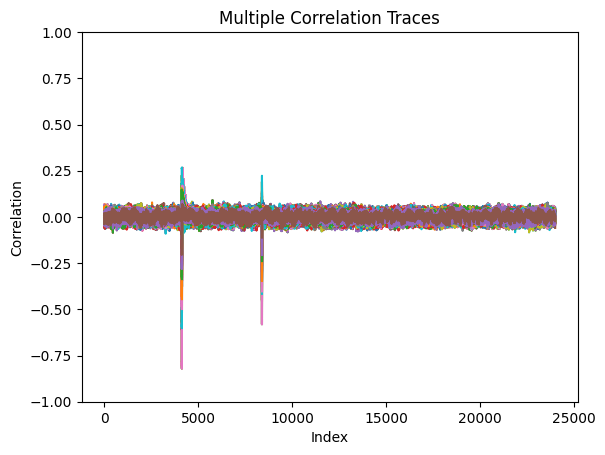

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

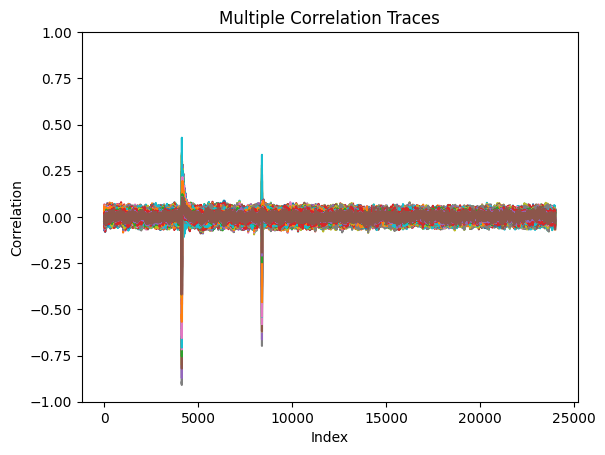

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

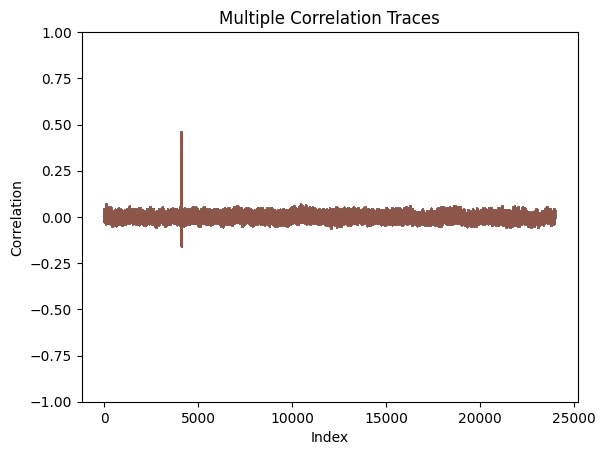

✔️ Scope disconnected.
✔️ Firmware disconnected.


In [14]:
corr1, corr2, corr3, rand_input, waves, out = capture_correlate(scope, epochs_list = [3000], ncorr_all1 = None, ncorr_all2 = None, decimate = 1, reverse = True, runName="_722_BasicMult")

##### Aditional Analysis

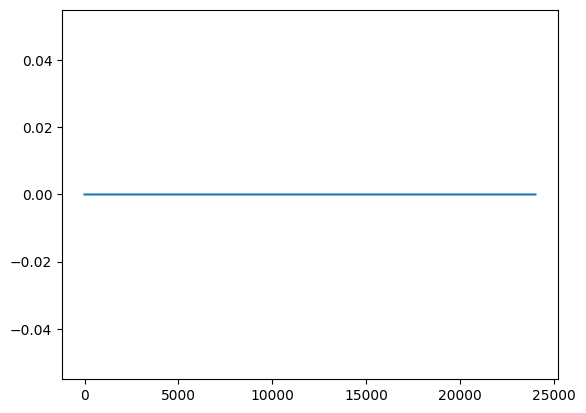

In [16]:
plt.plot(corr_map[0])

In [25]:
out

CWbytearray(b'00 72 02 1b 00 97 00')

##### Additional Analysis

Hello 27
31
 Index of global max: 4134 and global_max_val: 0.8204085966855512


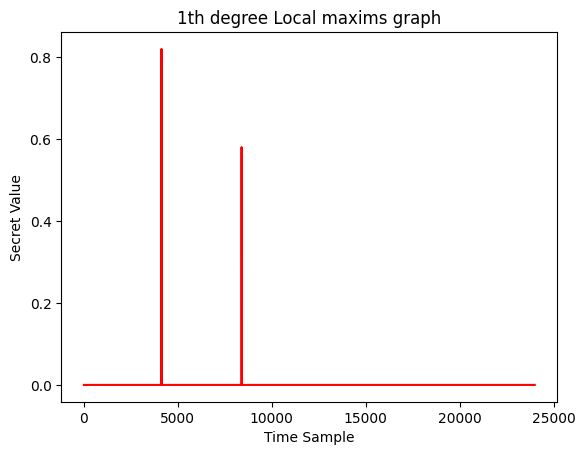

Number of uniques: 1
Number of local maxims: 10
Uniquess: [27]
Local maxims: [27, 27, 27, 27, 27, 27, 27, 27, 27, 27]


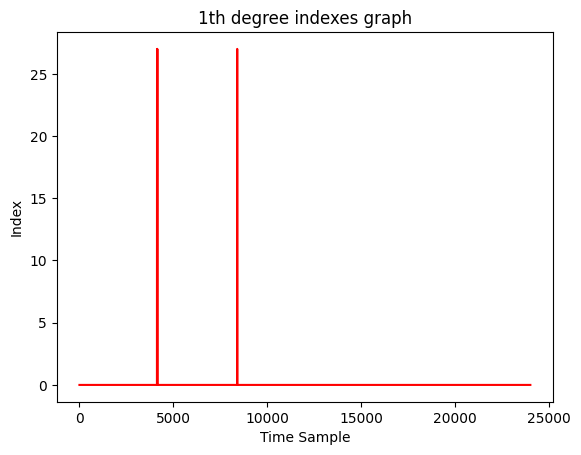

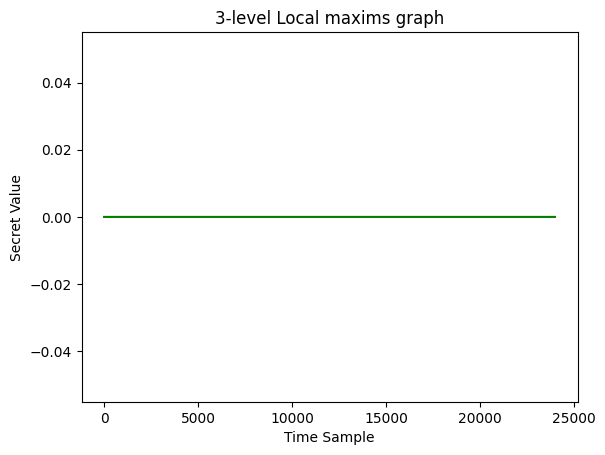

Number of uniques: 0
Number of local maxims: 0
Uniquess: []
Local maxims: []


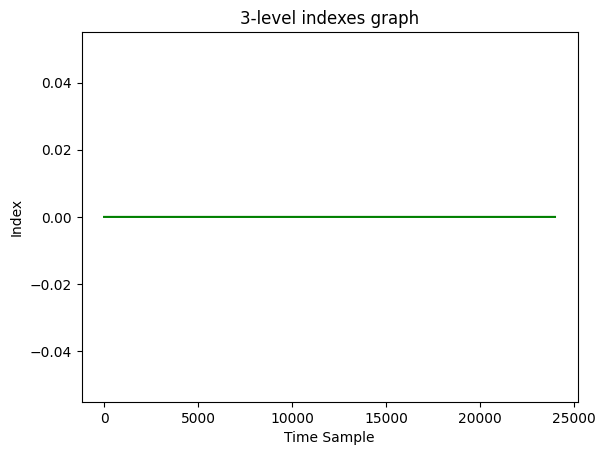

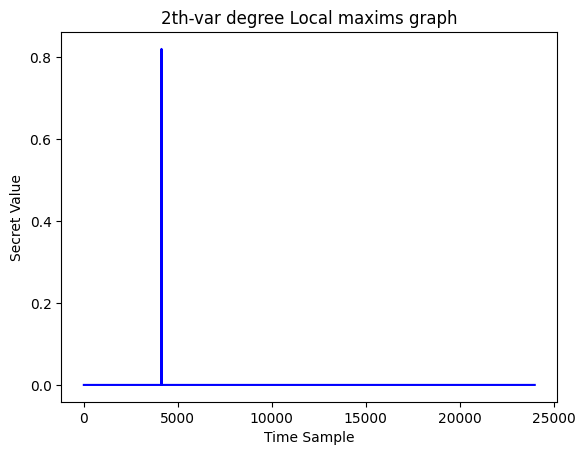

Number of uniques: 1
Number of local maxims: 1
Uniquess: [27]
Local maxims: [27]


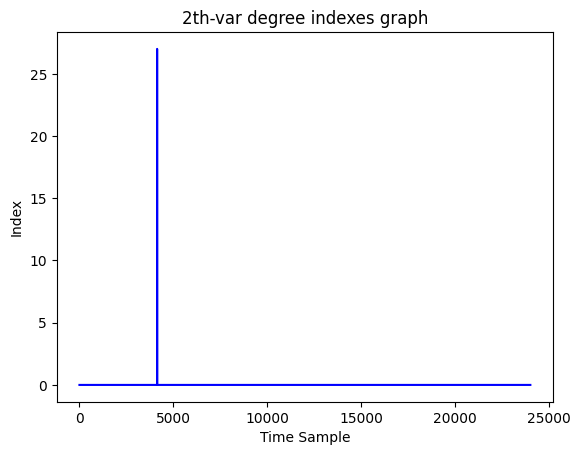

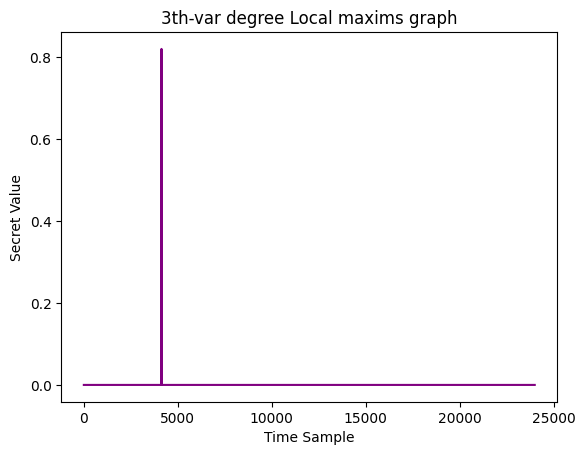

Number of uniques: 1
Number of local maxims: 7
Uniquess: [27]
Local maxims: [27, 27, 27, 27, 27, 27, 27]


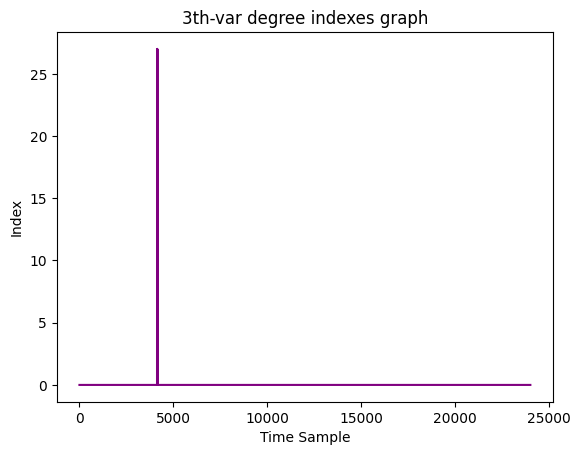

In range 0 - 24000
 Found the soonest secret value is 27, at the time sample 4134, with correlation secret_corr = 0.820


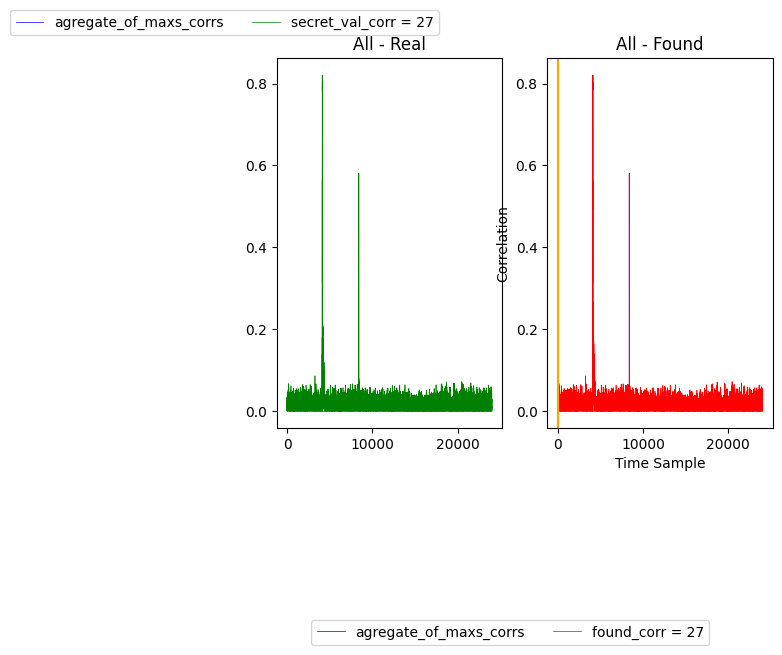

In [28]:
corr_map = abs(np.array(corr1)[:,:])
analyse_corr(corr_map=corr_map, weights=np.array([27]), stop_num = 5, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3)

Hello 27
37
 Index of global max: 4130 and global_max_val: 0.9093672622034572


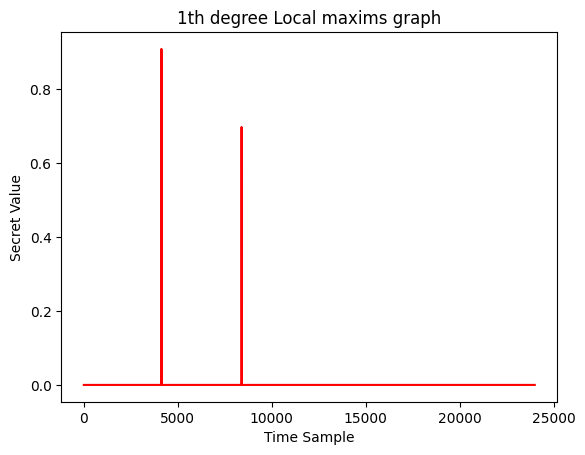

Number of uniques: 1
Number of local maxims: 9
Uniquess: [27]
Local maxims: [27, 27, 27, 27, 27, 27, 27, 27, 27]


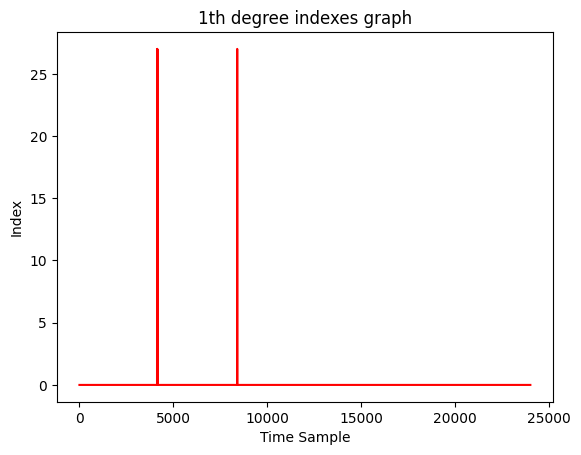

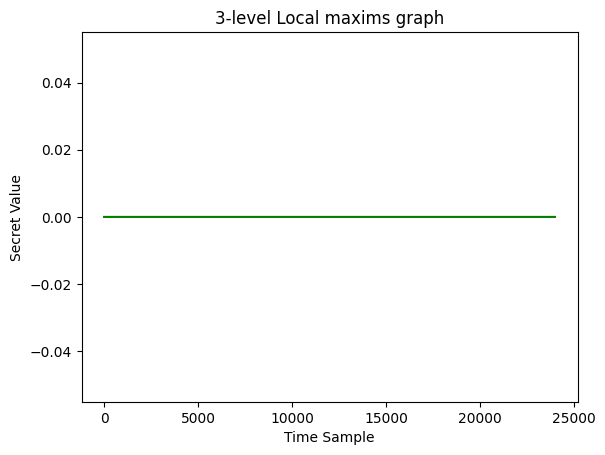

Number of uniques: 0
Number of local maxims: 0
Uniquess: []
Local maxims: []


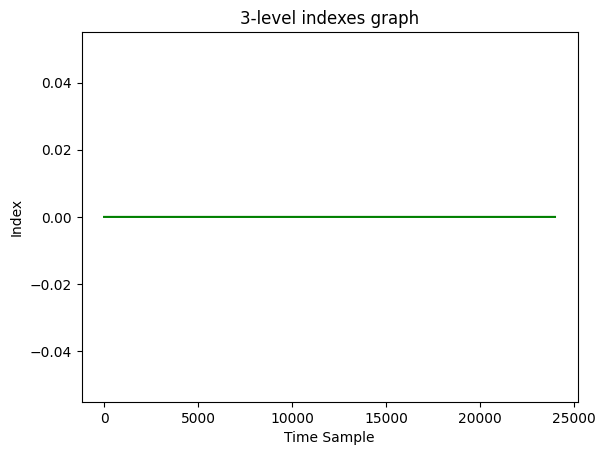

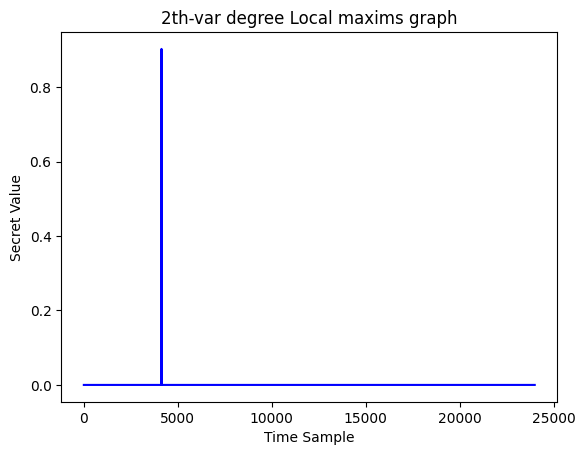

Number of uniques: 1
Number of local maxims: 1
Uniquess: [27]
Local maxims: [27]


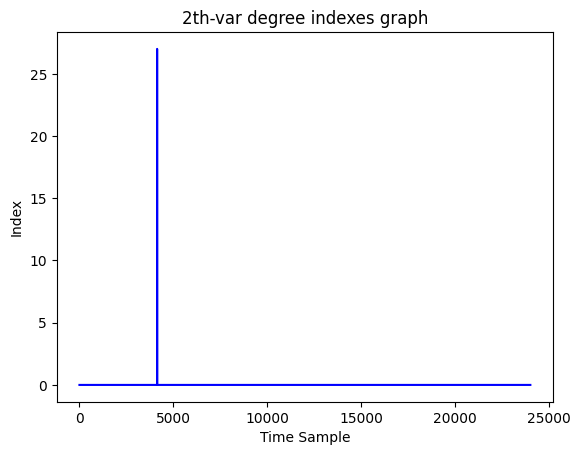

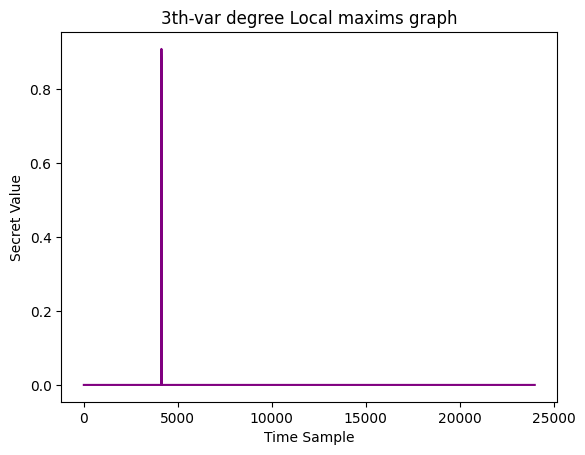

Number of uniques: 1
Number of local maxims: 7
Uniquess: [27]
Local maxims: [27, 27, 27, 27, 27, 27, 27]


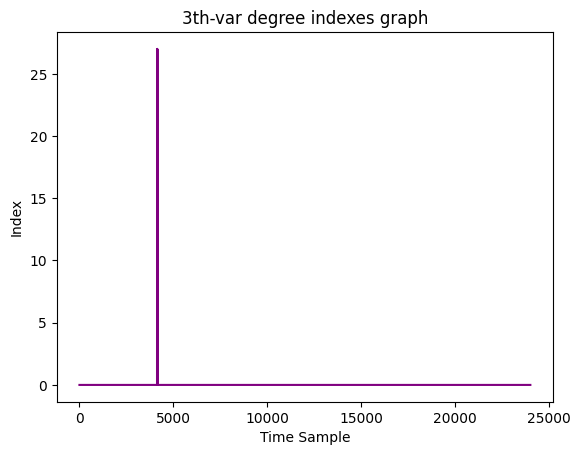

In range 0 - 24000
 Found the soonest secret value is 27, at the time sample 4134, with correlation secret_corr = 0.903


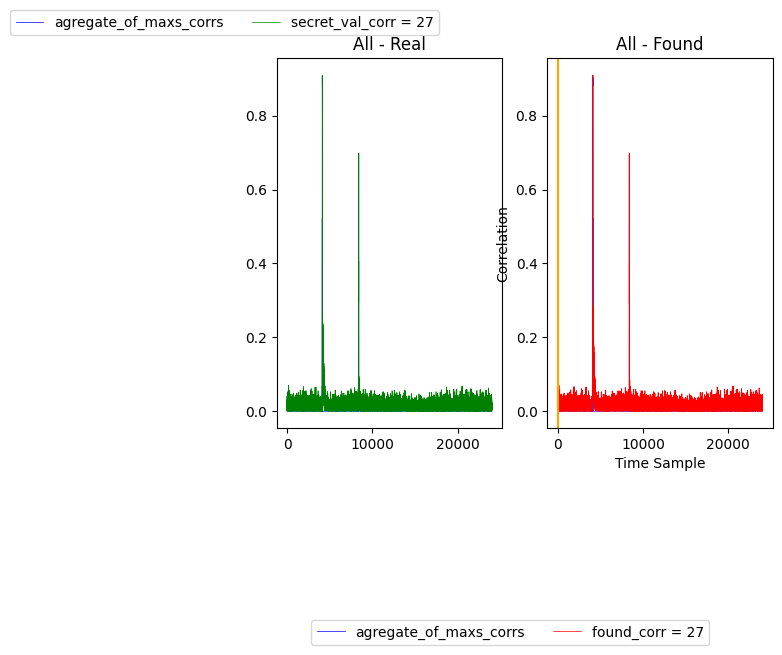

In [29]:
corr_map = abs(np.array(corr2)[:,:])
analyse_corr(corr_map=corr_map, weights=np.array([27]), stop_num = 5, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3)

Hello 27
37
 Index of global max: 4130 and global_max_val: 0.9093672622034572


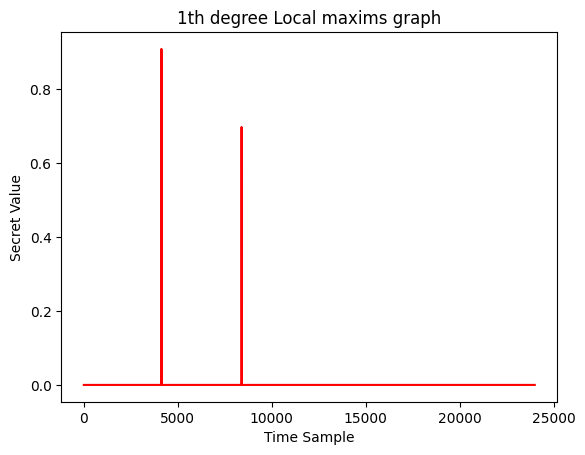

Number of uniques: 1
Number of local maxims: 9
Uniquess: [27]
Local maxims: [27, 27, 27, 27, 27, 27, 27, 27, 27]


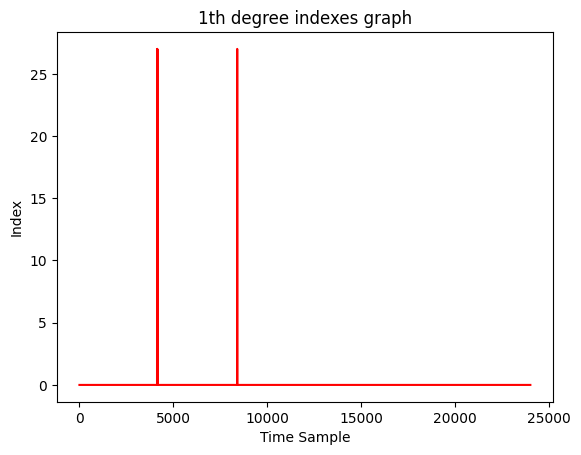

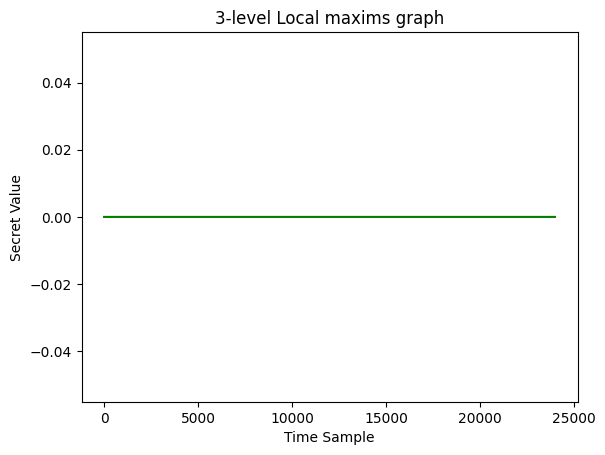

Number of uniques: 0
Number of local maxims: 0
Uniquess: []
Local maxims: []


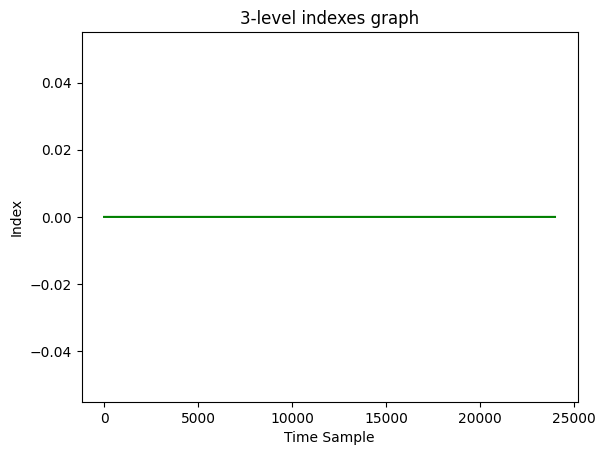

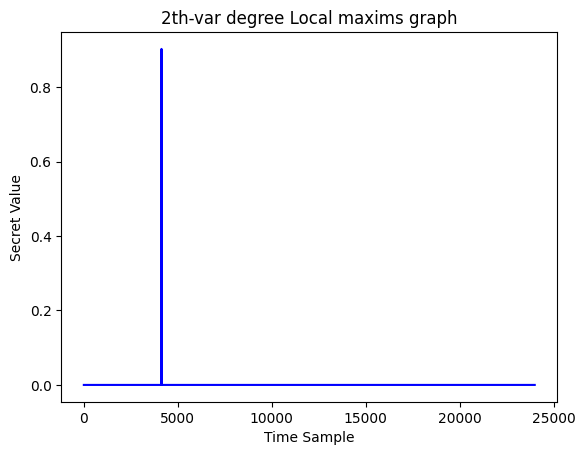

Number of uniques: 1
Number of local maxims: 1
Uniquess: [27]
Local maxims: [27]


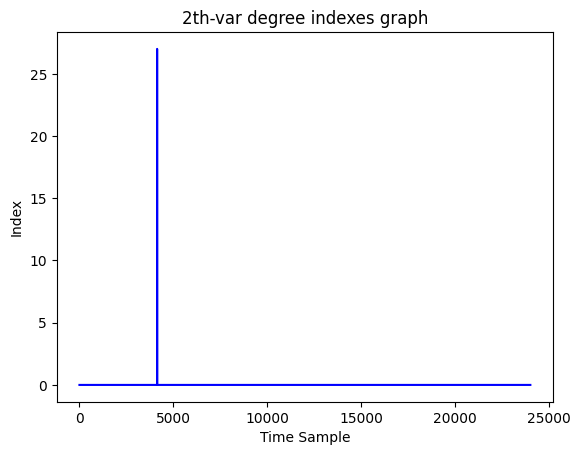

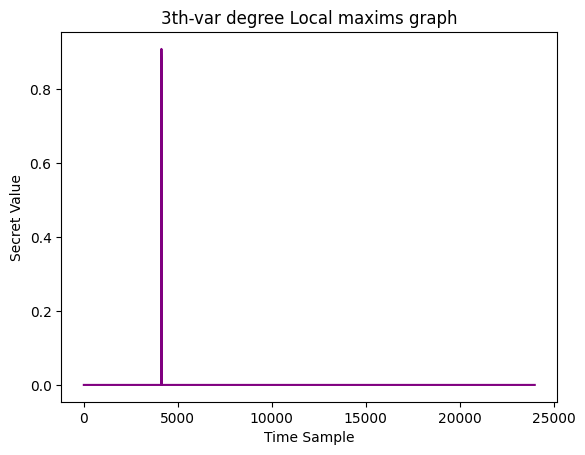

Number of uniques: 1
Number of local maxims: 7
Uniquess: [27]
Local maxims: [27, 27, 27, 27, 27, 27, 27]


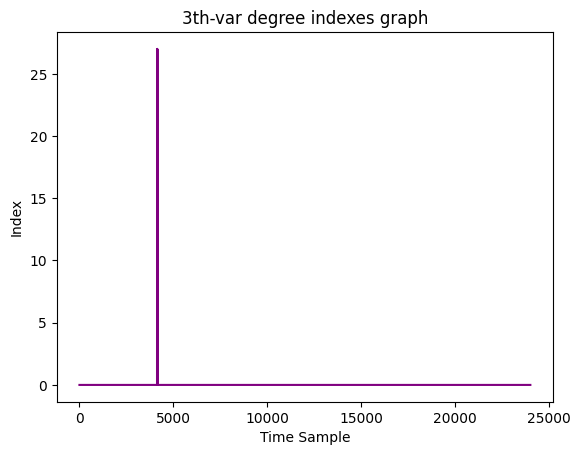

In range 0 - 24000
 Found the soonest secret value is 27, at the time sample 4134, with correlation secret_corr = 0.903


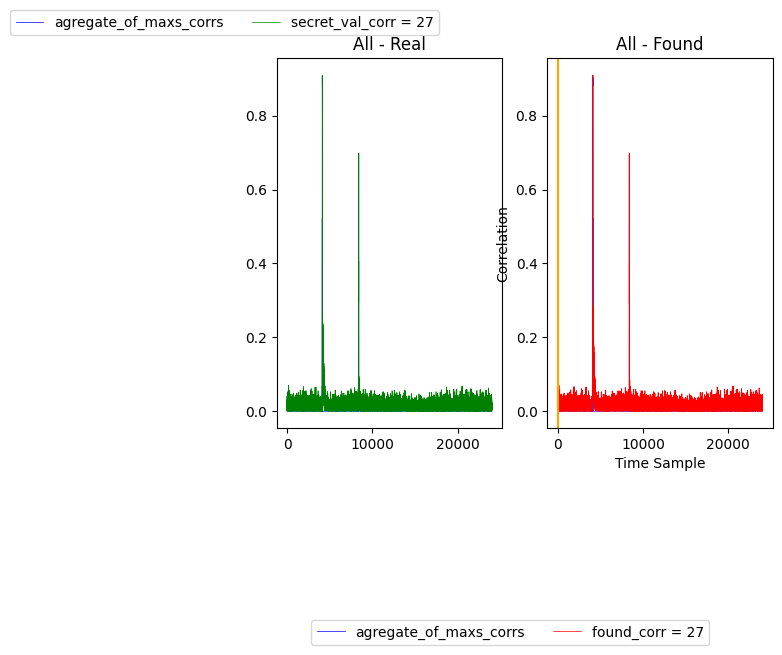

In [30]:
corr_map = abs(np.array(corr3)[:,:])
analyse_corr(corr_map=corr_map, weights=np.array([27]), stop_num = 5, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3)

#### Quantized

In [31]:
scope, target, cw_setuper = setup("makefile_dir_basic_quantized_mult")
time.sleep(30)

⚠️ Changed, firmware config!!!
✔️ Firmware maked, with command cd %s | make CRYPTO_TARGET=%s PLATFORM=%s FIRMWAREPATH=%s SS_VER=%s TARGET=%s> output.txt 2>warnings_new.txt.
INFO: Found ChipWhisperer😍
✔️ INFO: Scope and Target, are set😍
❤️ Target hex: ./makefile_dir_basic_quantized_mult/simpleserial-target-CWLITEARM.hex
Detected known STMF32: STM32F302xB(C)/303xB(C)
Extended erase (0x44), this can take ten seconds or more
Attempting to program 11259 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 11259 bytes
✔️ Setuper initiated.


Capturing and Analysing the traces::   0%|          | 0/1 [00:00<?, ?it/s]

⚠️ Generating rand_input..


                                Capturing traces:   0%|          | 0/3000 [00:00<?, ?it/s]

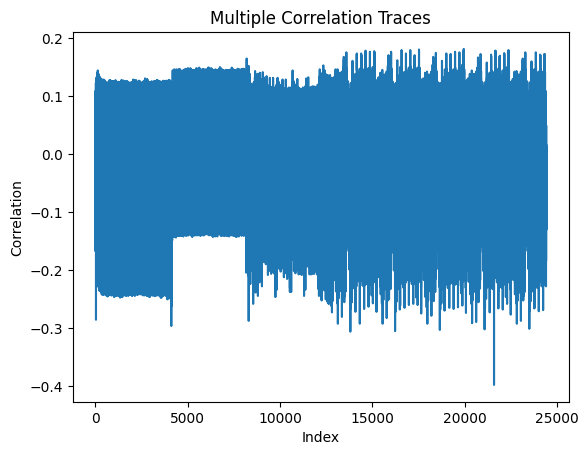

✔️ Saving Rand_input succesfull.
🌍 Saving Secret_weights succesfull.
CWbytearray(b'00 72 02 1b 00 97 00')


Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

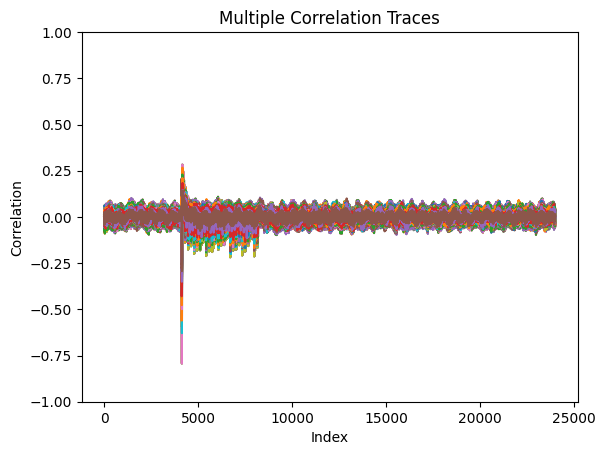

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

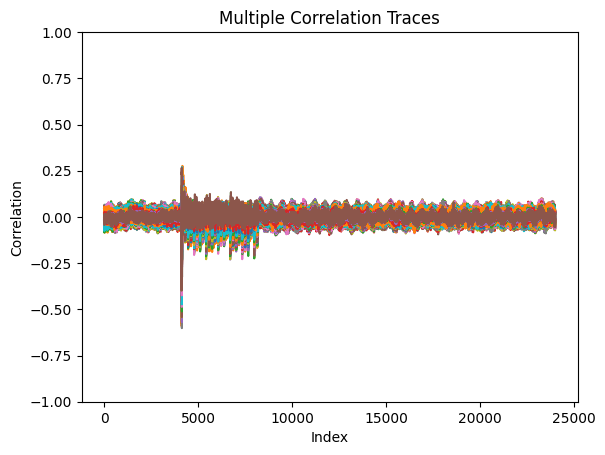

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

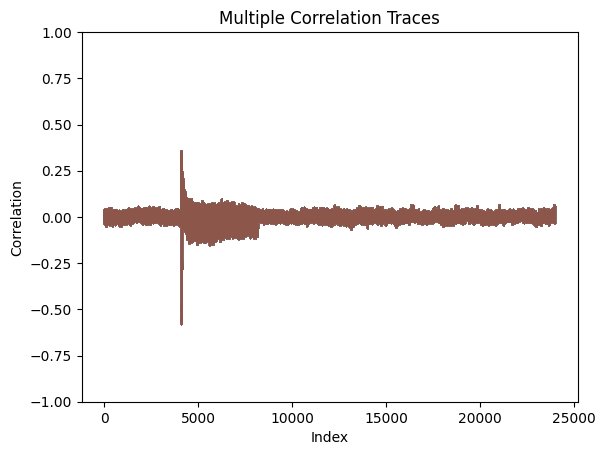

✔️ Scope disconnected.
✔️ Firmware disconnected.


In [32]:
corr1, corr2, corr3, rand_input, waves, out = capture_correlate(scope, epochs_list = [3000], ncorr_all1 = None, ncorr_all2 = None, decimate = 1, reverse = True, runName="_722_BasicMult")

##### Aditional Analysis

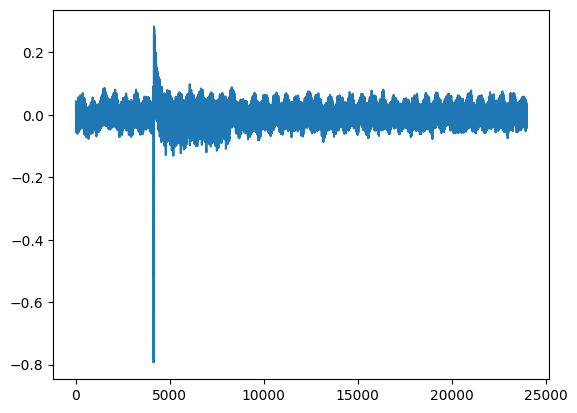

In [37]:
plt.plot(corr1[27])

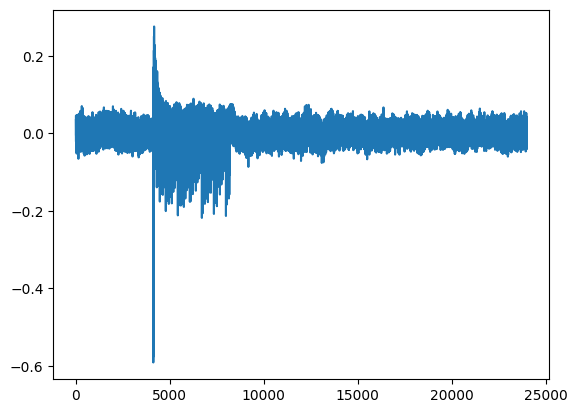

In [36]:
plt.plot(corr1[1])

Hello 27
23
 Index of global max: 4134 and global_max_val: 0.793236789335311


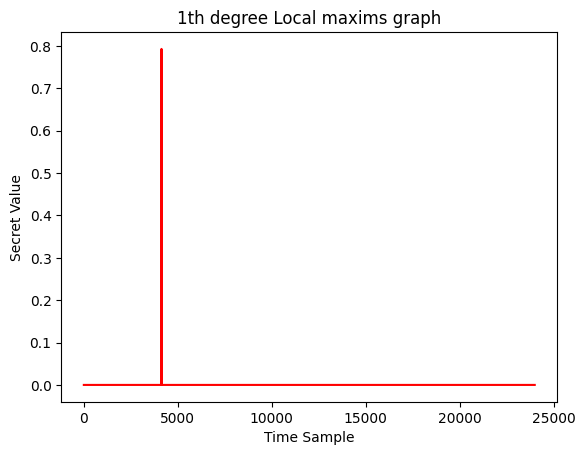

Number of uniques: 2
Number of local maxims: 13
Uniquess: [1, 27]
Local maxims: [1, 1, 1, 1, 1, 1, 27, 27, 27, 27, 27, 27, 27]


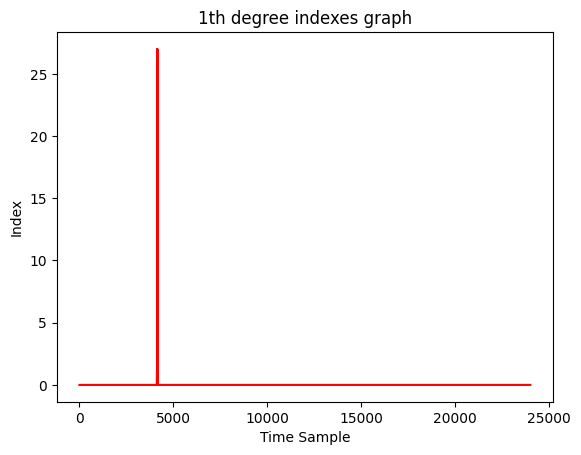

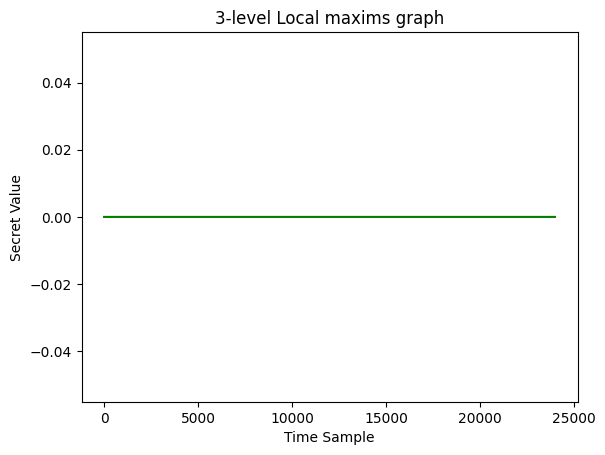

Number of uniques: 0
Number of local maxims: 0
Uniquess: []
Local maxims: []


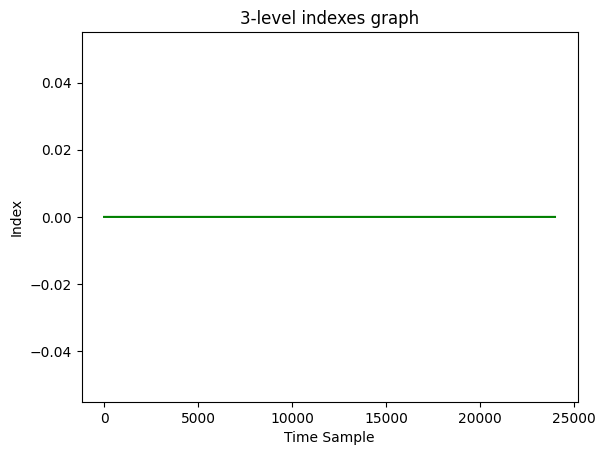

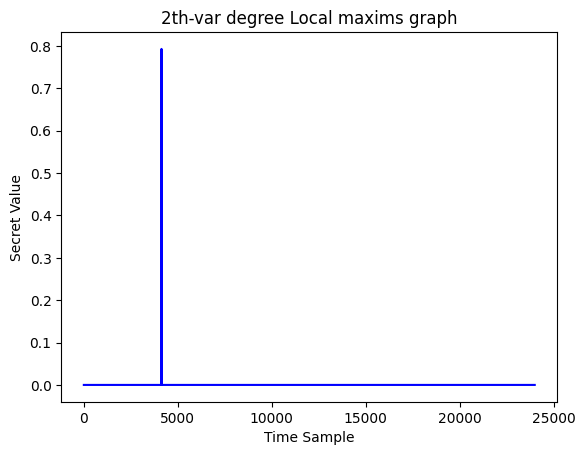

Number of uniques: 1
Number of local maxims: 1
Uniquess: [27]
Local maxims: [27]


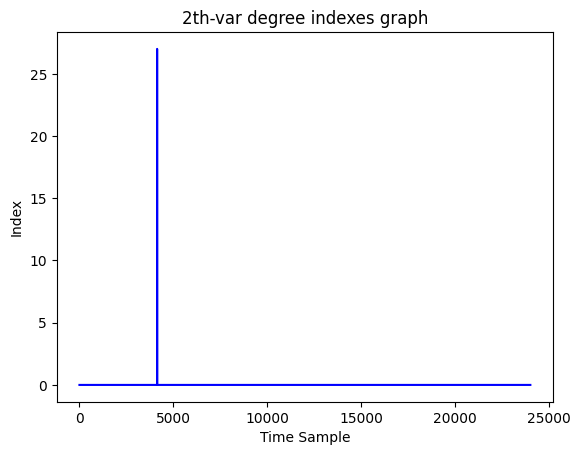

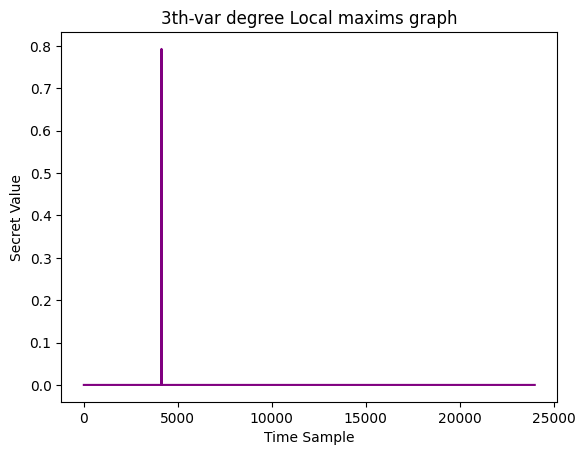

Number of uniques: 2
Number of local maxims: 9
Uniquess: [1, 27]
Local maxims: [1, 1, 1, 1, 1, 27, 27, 27, 27]


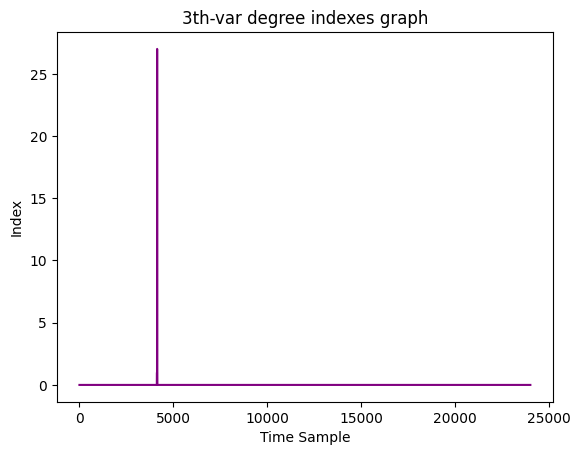

In range 0 - 24000
 Found the soonest secret value is 27, at the time sample 4134, with correlation secret_corr = 0.793


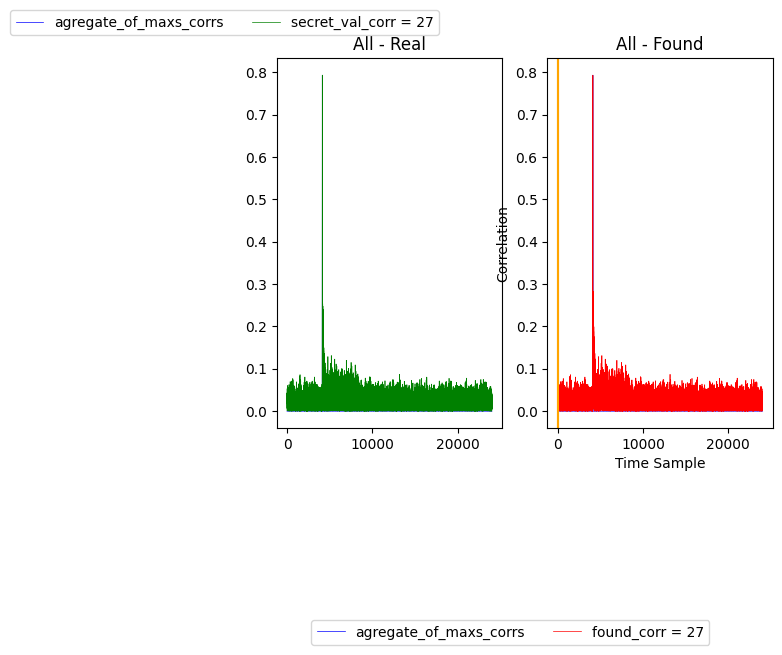

In [33]:
corr_map = abs(np.array(corr1)[:,:])
analyse_corr(corr_map=corr_map, weights=np.array([27]), stop_num = 5, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3)

Hello 27
25
 Index of global max: 4134 and global_max_val: 0.6017556056478043


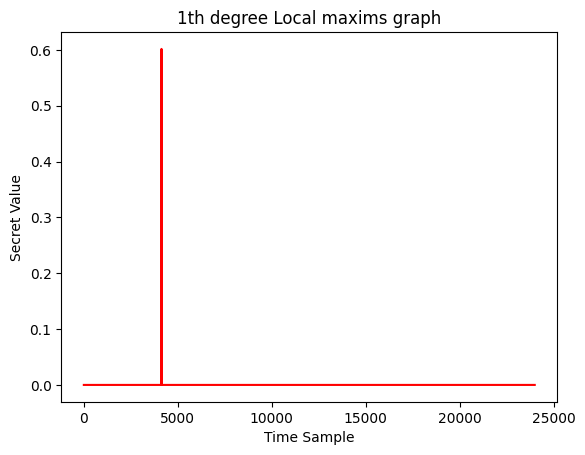

Number of uniques: 3
Number of local maxims: 18
Uniquess: [64, 1, 27]
Local maxims: [64, 64, 64, 1, 1, 1, 1, 1, 1, 1, 1, 27, 27, 27, 27, 27, 27, 27]


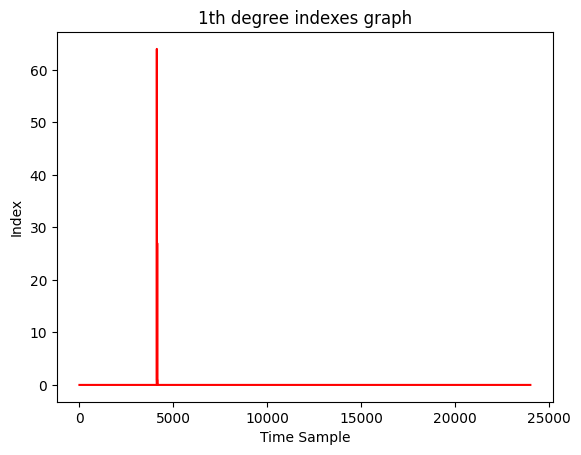

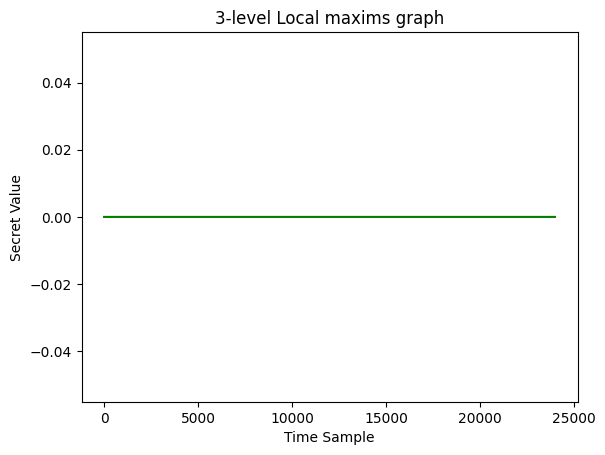

Number of uniques: 0
Number of local maxims: 0
Uniquess: []
Local maxims: []


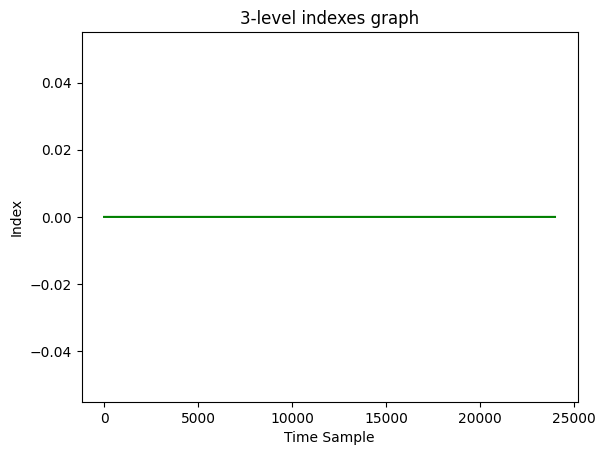

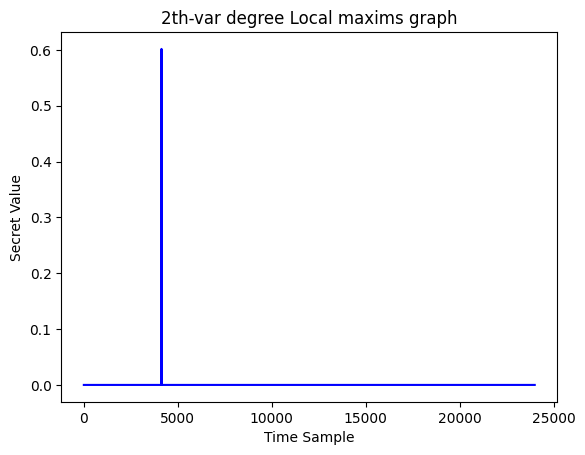

Number of uniques: 1
Number of local maxims: 1
Uniquess: [27]
Local maxims: [27]


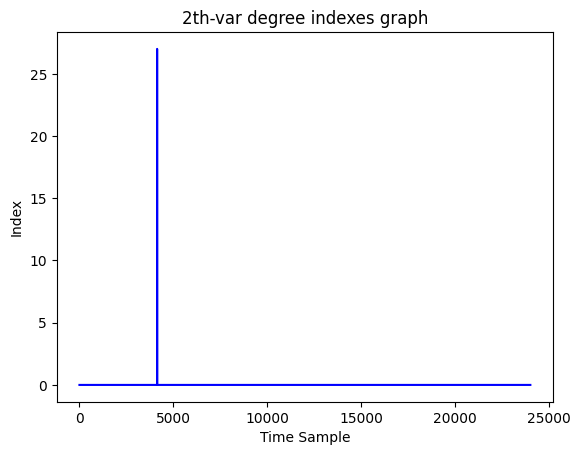

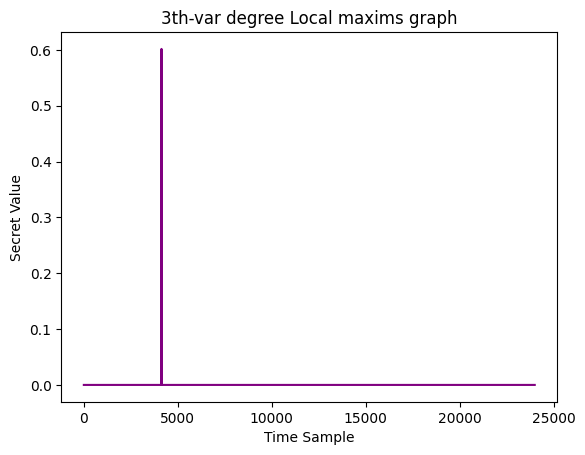

Number of uniques: 3
Number of local maxims: 14
Uniquess: [64, 1, 27]
Local maxims: [64, 64, 1, 1, 1, 1, 1, 1, 27, 27, 27, 27, 27, 27]


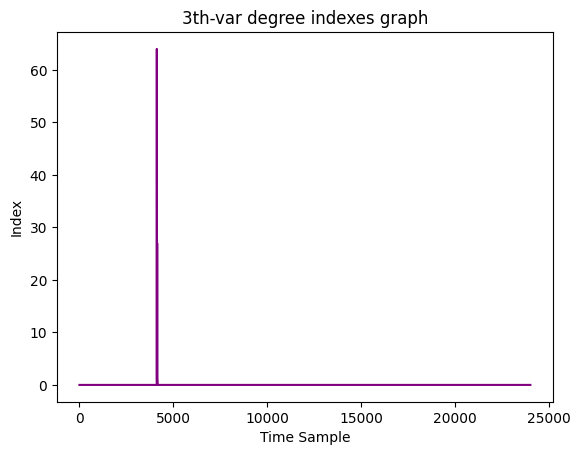

In range 0 - 24000
 Found the soonest secret value is 27, at the time sample 4134, with correlation secret_corr = 0.602


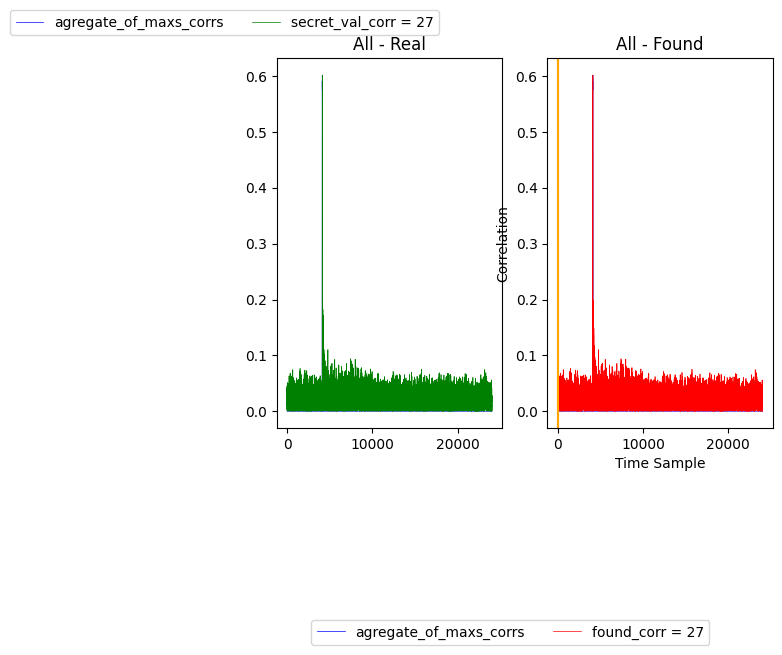

In [34]:
corr_map = abs(np.array(corr2)[:,:])
analyse_corr(corr_map=corr_map, weights=np.array([27]), stop_num = 5, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3)

Hello 27
25
 Index of global max: 4134 and global_max_val: 0.6017556056478043


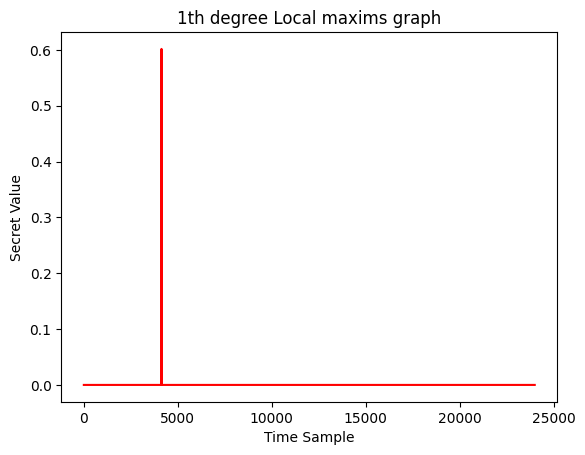

Number of uniques: 3
Number of local maxims: 18
Uniquess: [64, 1, 27]
Local maxims: [64, 64, 64, 1, 1, 1, 1, 1, 1, 1, 1, 27, 27, 27, 27, 27, 27, 27]


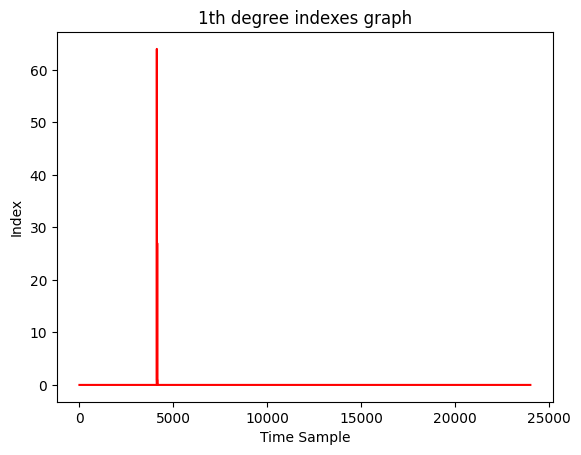

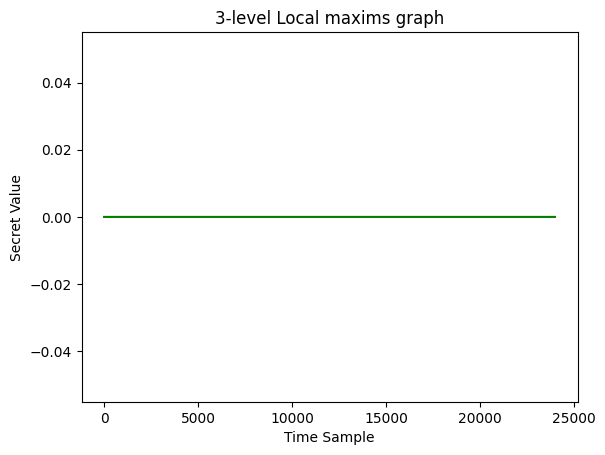

Number of uniques: 0
Number of local maxims: 0
Uniquess: []
Local maxims: []


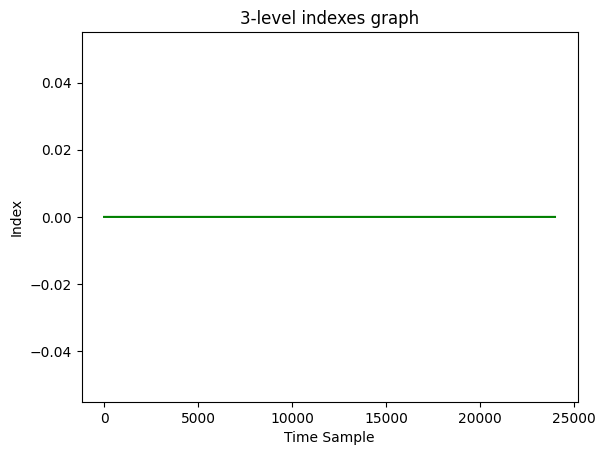

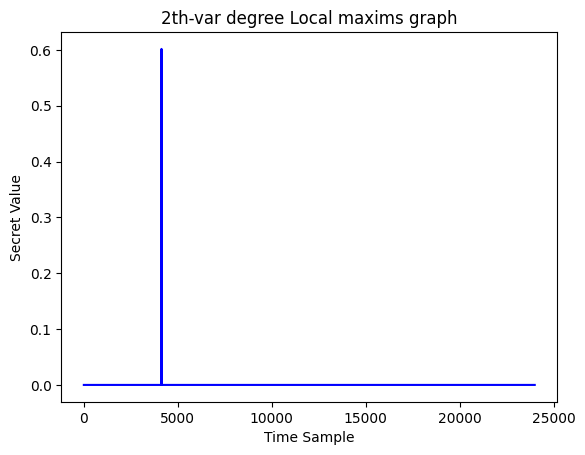

Number of uniques: 1
Number of local maxims: 1
Uniquess: [27]
Local maxims: [27]


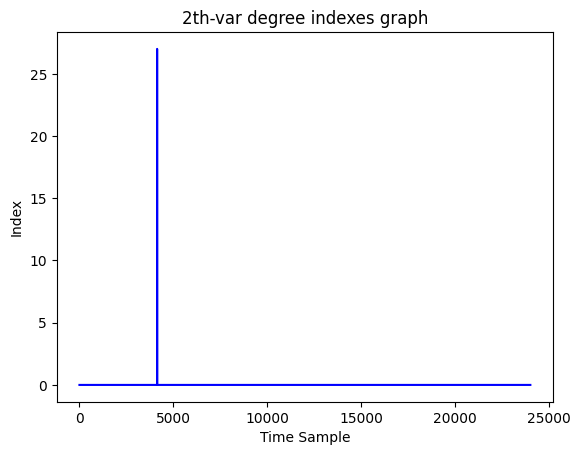

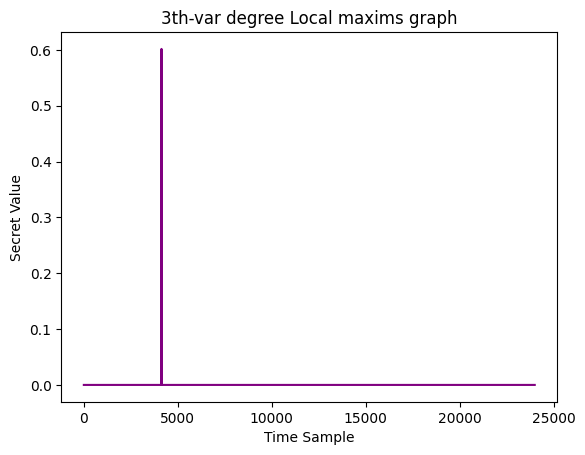

Number of uniques: 3
Number of local maxims: 14
Uniquess: [64, 1, 27]
Local maxims: [64, 64, 1, 1, 1, 1, 1, 1, 27, 27, 27, 27, 27, 27]


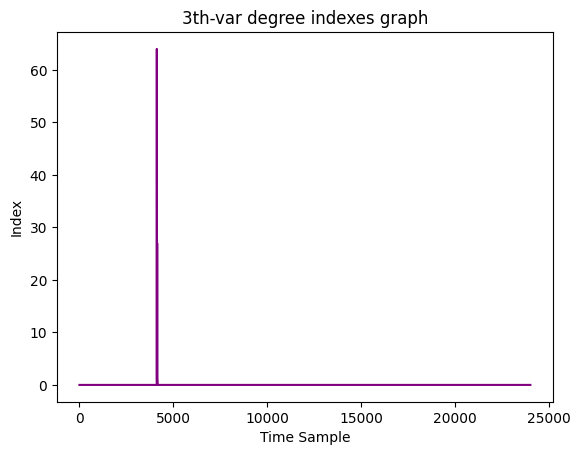

In range 0 - 24000
 Found the soonest secret value is 27, at the time sample 4134, with correlation secret_corr = 0.602


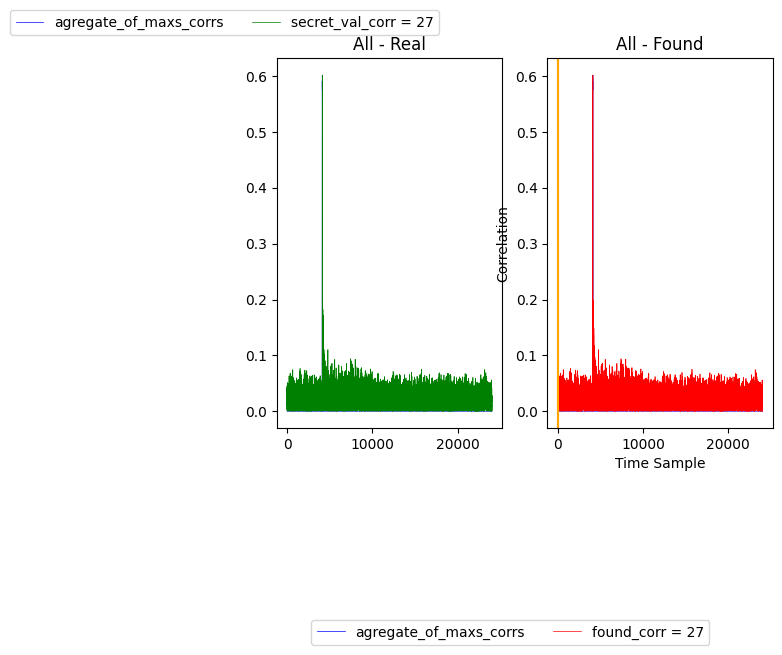

In [35]:
corr_map = abs(np.array(corr3)[:,:])
analyse_corr(corr_map=corr_map, weights=np.array([27]), stop_num = 5, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3)

#### Quantized Prev

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

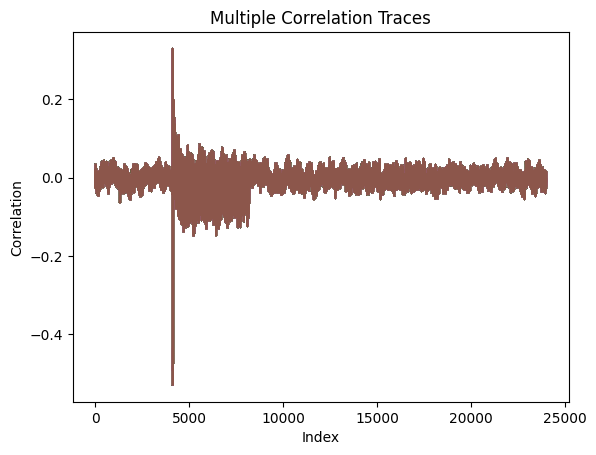

In [120]:
calc_corr(waves=waves, rand_inputs=rand_input, _func=ancientV2_ANN_CPA_OTS, _name="tmp_corr", epochs=3000, trace_len=24000)

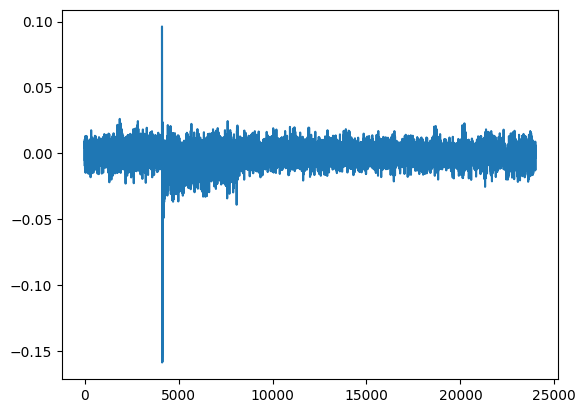

In [134]:
plt.plot(np.subtract(abs(np.array(corr2)[5,:]), abs(np.array(corr1)[10,:])))

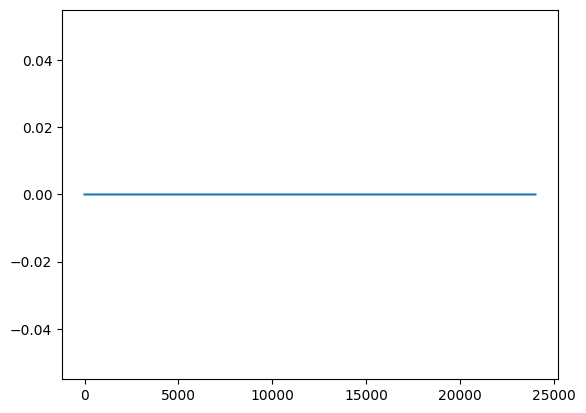

In [127]:
plt.plot(np.subtract(abs(np.array(corr1)[5,:]), abs(np.array(corr1)[160,:])))

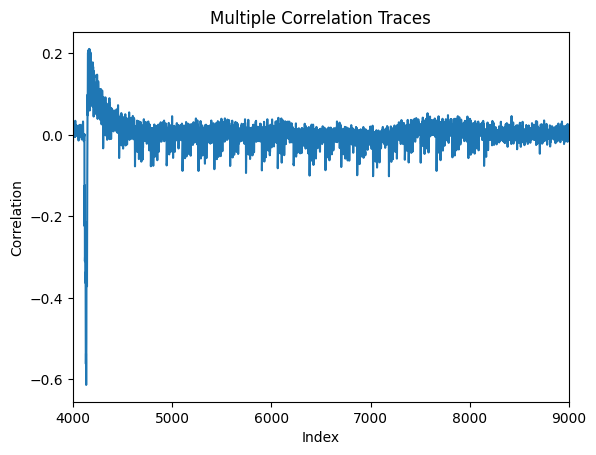

In [131]:
plot_mult(np.array(corr2)[10,:], _type = "tmp", mult=False, xlim=[4000,9000])

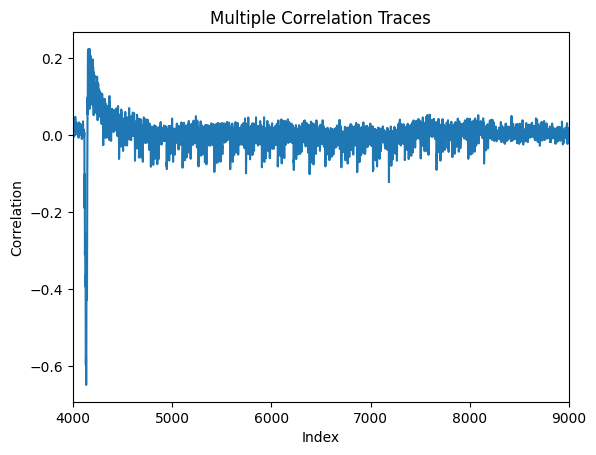

In [130]:
plot_mult(np.array(corr2)[5,:], _type = "tmp", mult=False, xlim=[4000,9000])

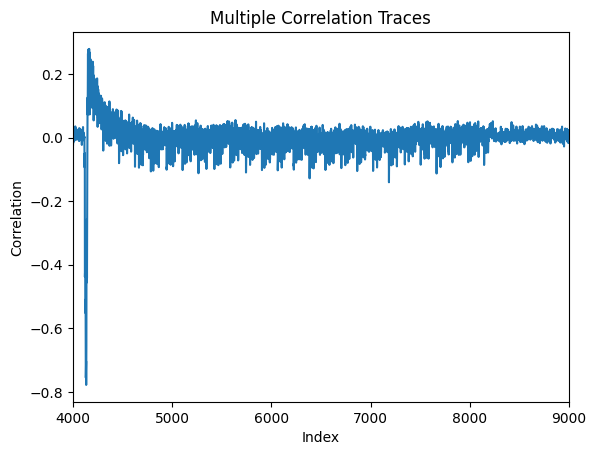

In [121]:
plot_mult(np.array(corr1)[5,:], _type = "tmp", mult=False, xlim=[4000,9000])

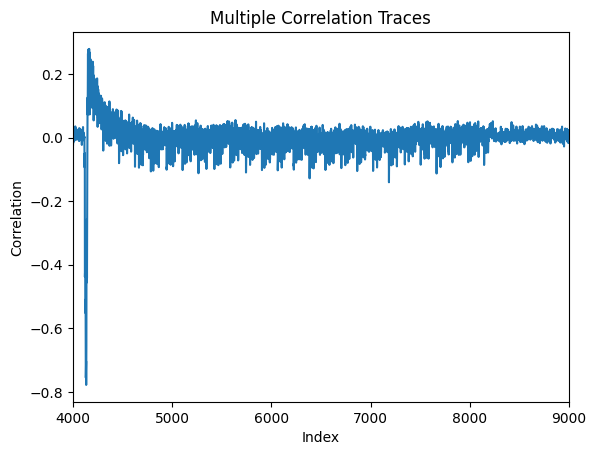

In [122]:
plot_mult(np.array(corr1)[10,:], _type = "tmp", mult=False, xlim=[4000,9000])

In [119]:
corr_map = abs(np.array(corr1)[:,:])
analyse_corr(corr_map=corr_map, weights=np.array(out)[3:-4], stop_num = 5, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3)

## QUANTIZATED ANN CPA, tryout with 2 similar but different CPA algs., and turned off optimalization while building, 3000 traces

In [86]:
scope.dis()
target.dis()

(ChipWhisperer Scope ERROR|File naeusbchip.py:108) Scope already disconnected!


In [82]:
scope, target, cw_setuper = setup("makefile_dir_basic_quantized_MLP-NO_OPT")
time.sleep(10)

⚠️ Changed, firmware config!!!
✔️ Firmware maked, with command cd %s | make CRYPTO_TARGET=%s PLATFORM=%s FIRMWAREPATH=%s SS_VER=%s TARGET=%s> output.txt 2>warnings_new.txt.
INFO: Found ChipWhisperer😍
✔️ INFO: Scope and Target, are set😍
❤️ Target hex: ./makefile_dir_basic_quantized_MLP-NO_OPT/simpleserial-target-CWLITEARM.hex
Detected known STMF32: STM32F302xB(C)/303xB(C)
Extended erase (0x44), this can take ten seconds or more
Attempting to program 22851 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 22851 bytes
✔️ Setuper initiated.


### traces=1000, decimate=1

Capturing and Analysing the traces::   0%|          | 0/1 [00:00<?, ?it/s]

⚠️ Generating rand_input..


                                Capturing traces:   0%|          | 0/3000 [00:00<?, ?it/s]

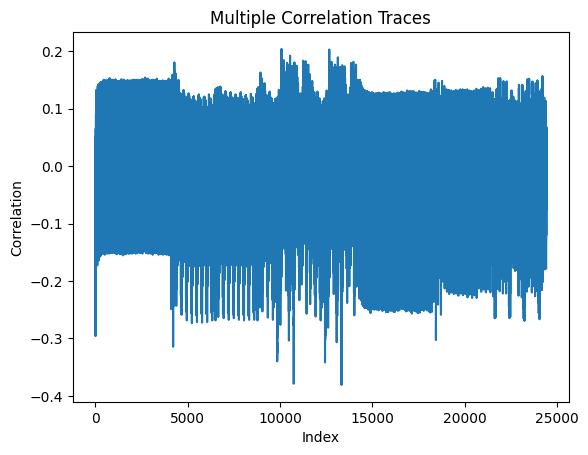

✔️ Saving Rand_input succesfull.
🌍 Saving Secret_weights succesfull.
CWbytearray(b'00 72 16 0a 00 00 00 00 00 00 00 14 00 00 00 00 00 00 00 4d d2 2c 55 2a 00 05 00')


Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

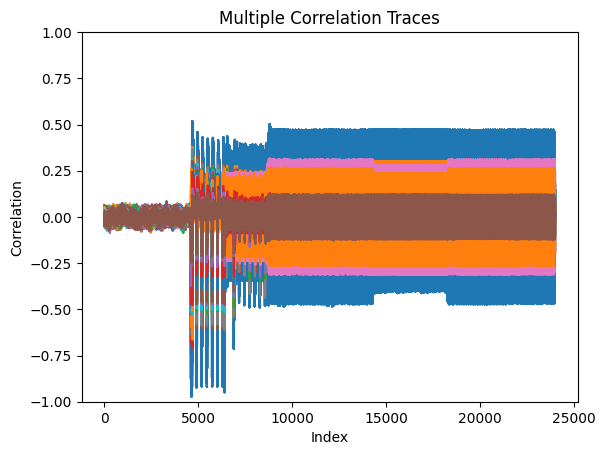

KeyboardInterrupt: 

In [83]:
corr1_10000, corr2_10000, corr3_10000, rand_input, waves, out = capture_correlate(scope, epochs_list = [3000], ncorr_all1 = None, ncorr_all2 = None, decimate = 1, reverse = False, runName="_722_BasicMLP-NO_OPT")

Capturing and Analysing the traces::   0%|          | 0/1 [00:00<?, ?it/s]

⚠️ Generating rand_input..


                                Capturing traces:   0%|          | 0/1000 [00:00<?, ?it/s]

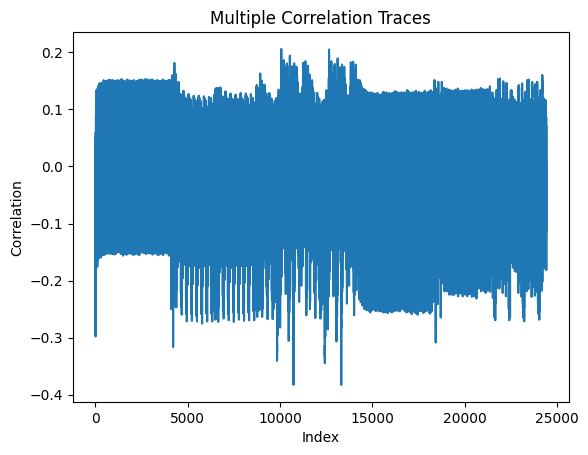

✔️ Saving Rand_input succesfull.
🌍 Saving Secret_weights succesfull.
CWbytearray(b'00 72 16 0a 00 00 00 00 00 00 00 14 00 00 00 00 00 00 00 4d d2 2c 55 2a 00 05 00')


Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

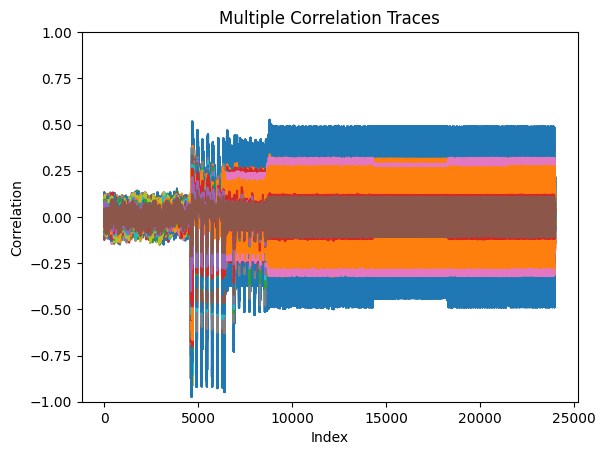

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

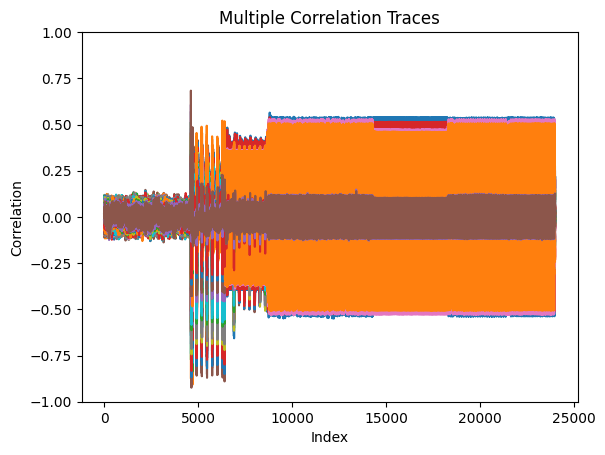

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

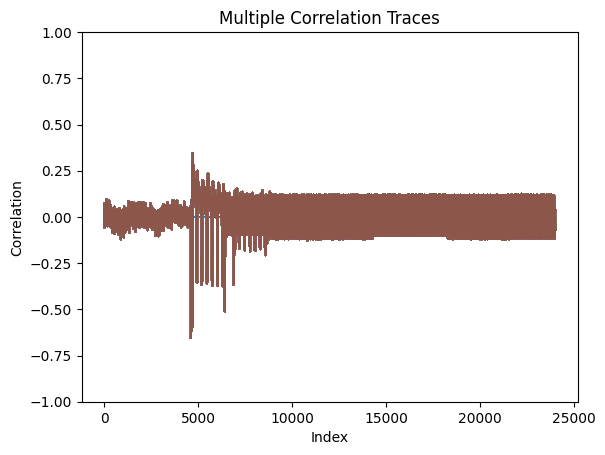

✔️ Scope disconnected.
✔️ Firmware disconnected.


In [85]:
corr1_10000, corr2_10000, corr3_10000, rand_input, waves, out = capture_correlate(scope, epochs_list = [1000], ncorr_all1 = None, ncorr_all2 = None, decimate = 1, reverse = False, runName="_722_BasicMLP-NO_OPT")

Capturing and Analysing the traces::   0%|          | 0/1 [00:00<?, ?it/s]

⚠️ Generating rand_input..


                                Capturing traces:   0%|          | 0/1000 [00:00<?, ?it/s]

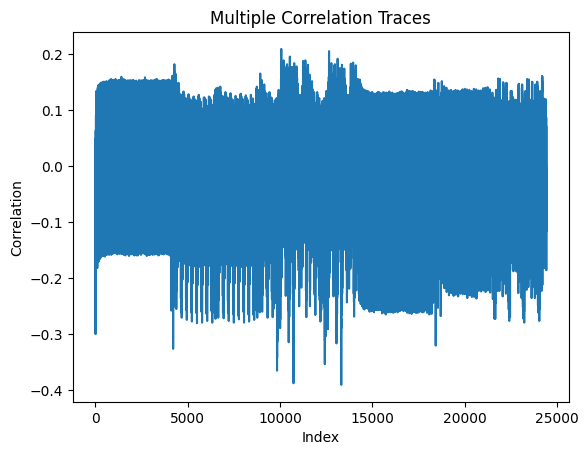

✔️ Saving Rand_input succesfull.
🌍 Saving Secret_weights succesfull.
CWbytearray(b'00 72 16 0a 00 00 00 00 00 00 00 14 00 00 00 00 00 00 00 4d d2 2c 55 2a 00 05 00')


Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

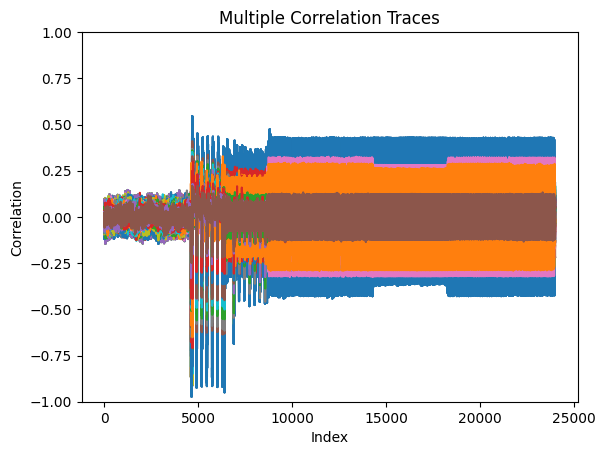

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

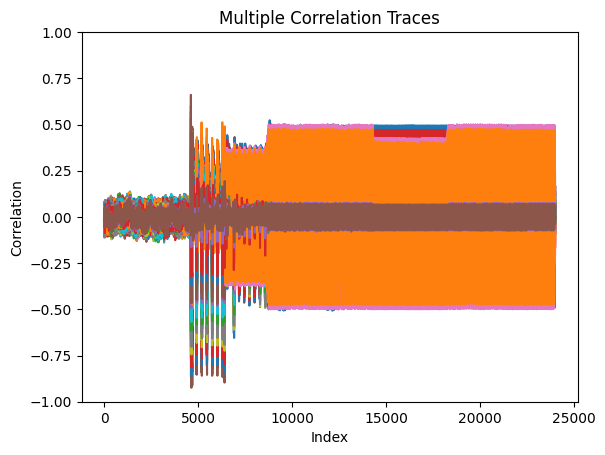

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

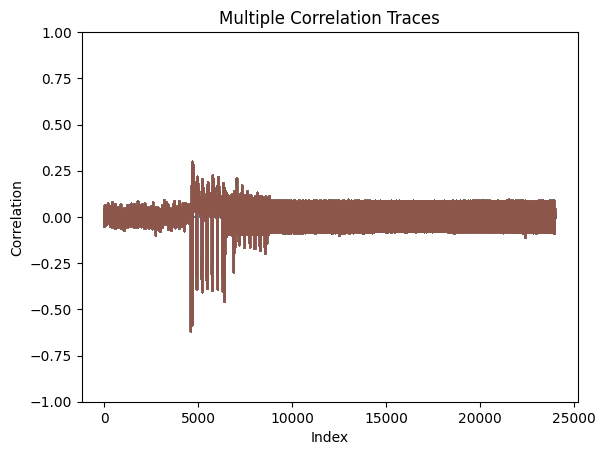

✔️ Scope disconnected.
✔️ Firmware disconnected.


In [74]:
corr1_10000, corr2_10000, corr3_10000, rand_input, waves, out = capture_correlate(scope, epochs_list = [1000], ncorr_all1 = None, ncorr_all2 = None, decimate = 1, reverse = False, runName="_722_BasicMLP-NO_OPT")

##### Additional analysis

9875
 Index of global max: 4649 and global_max_val: 0.9725209561628996


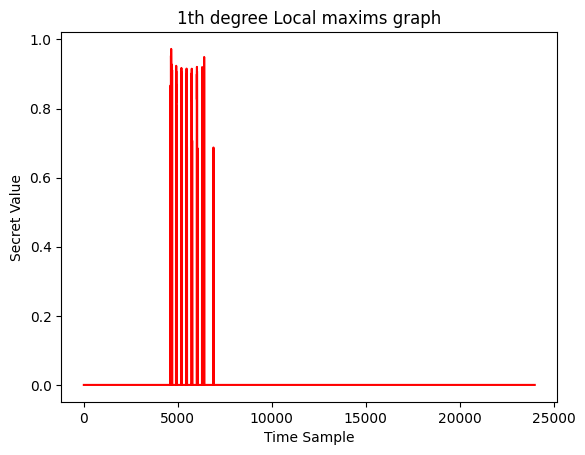

Number of uniques: 2
Number of local maxims: 117
Uniquess: [1, 5]
Local maxims: [1, 1, 1, 1, 5, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


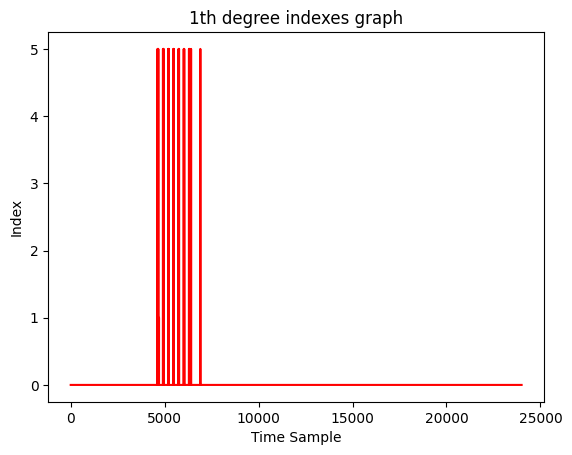

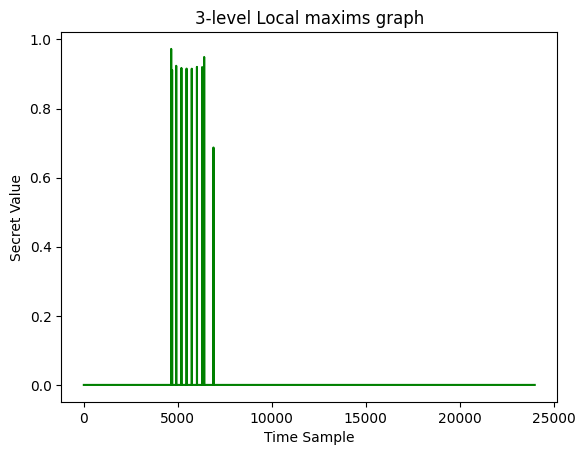

Number of uniques: 2
Number of local maxims: 10
Uniquess: [5, 1]
Local maxims: [5, 1, 5, 5, 5, 5, 5, 5, 5, 5]


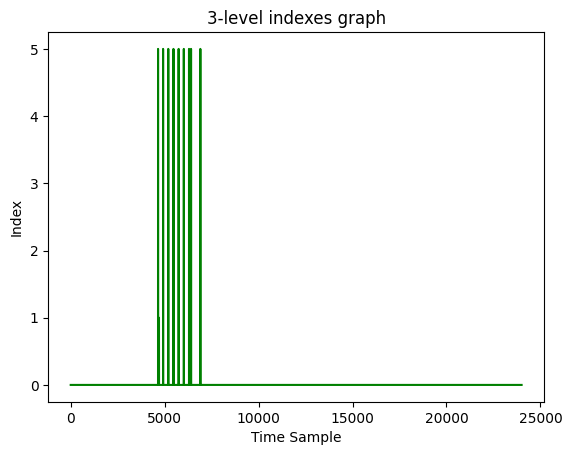

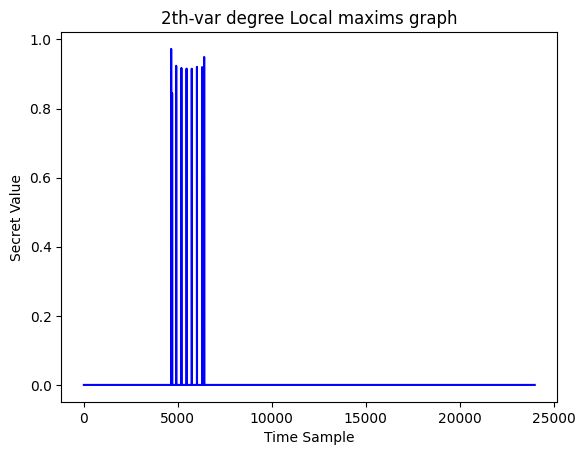

Number of uniques: 2
Number of local maxims: 9
Uniquess: [5, 1]
Local maxims: [5, 1, 5, 5, 5, 5, 5, 5, 5]


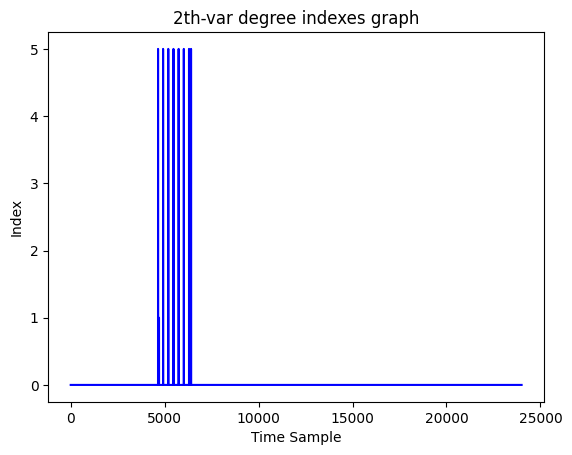

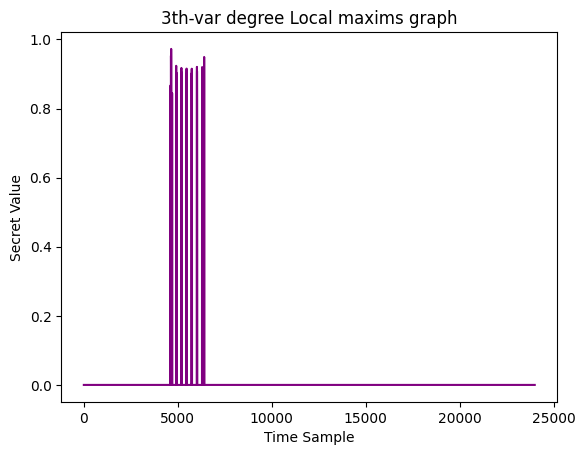

Number of uniques: 2
Number of local maxims: 75
Uniquess: [1, 5]
Local maxims: [1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


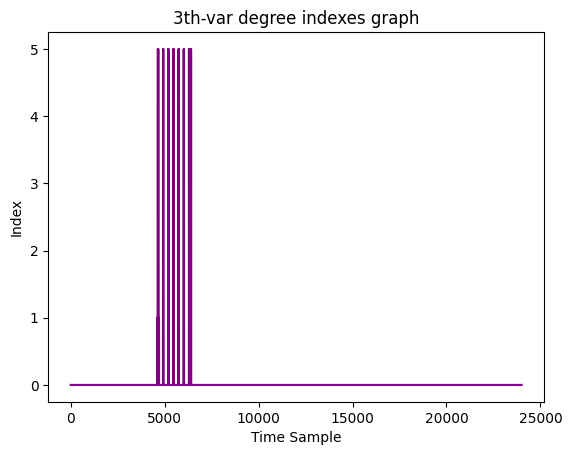

In range 0 - 24000
 Found the soonest secret value is 5, at the time sample 4649, with correlation secret_corr = 0.973


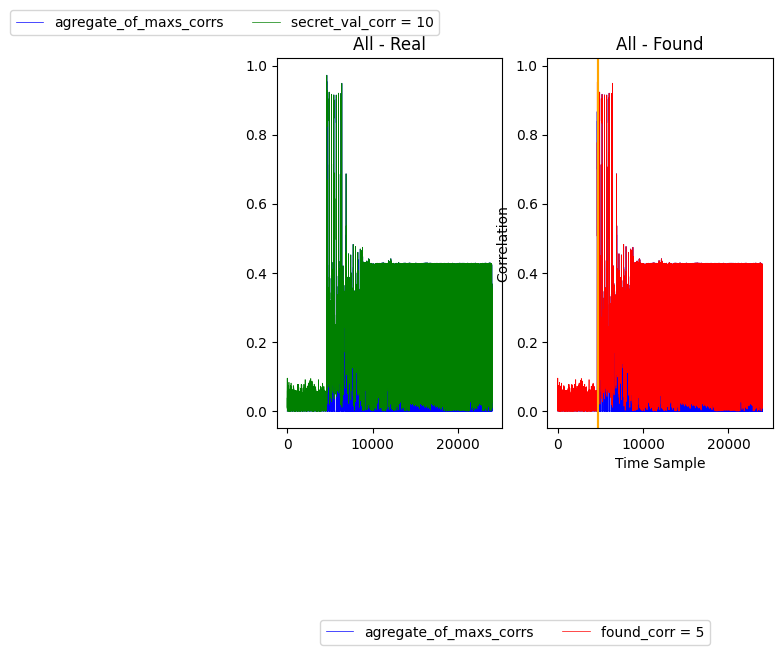

In range 4674 - 24000
 Found the soonest secret value is 1, at the time sample 4699, with correlation secret_corr = 0.844


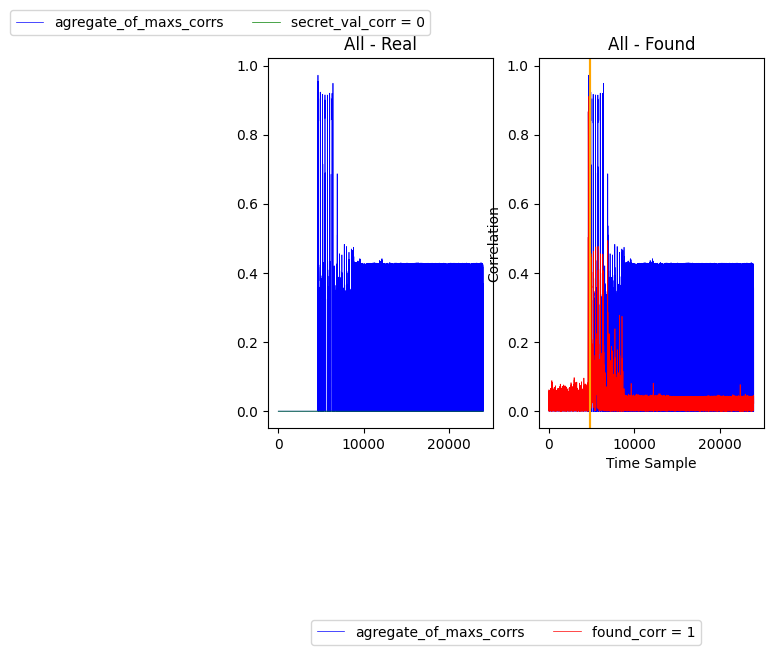

In range 4808 - 24000
 Found the soonest secret value is 5, at the time sample 4917, with correlation secret_corr = 0.924


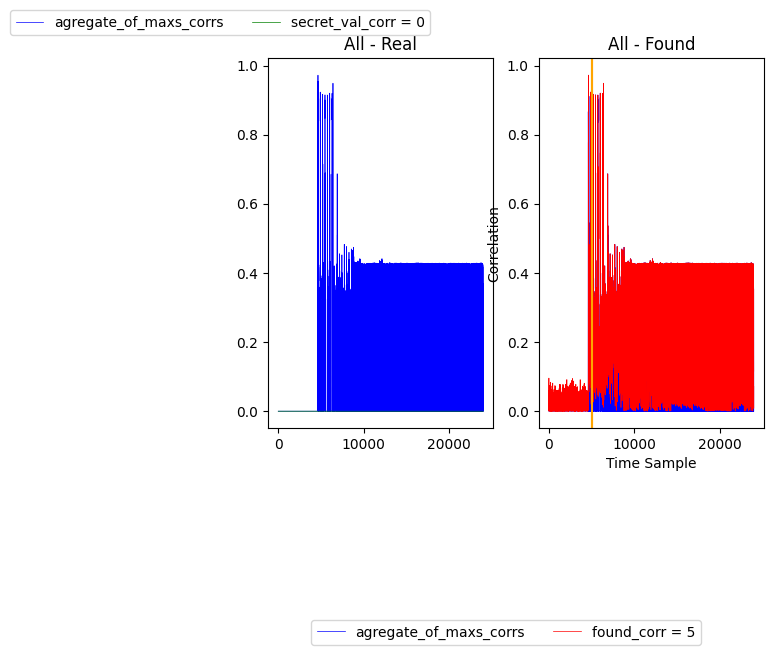

In range 5055 - 24000
 Found the soonest secret value is 5, at the time sample 5193, with correlation secret_corr = 0.917


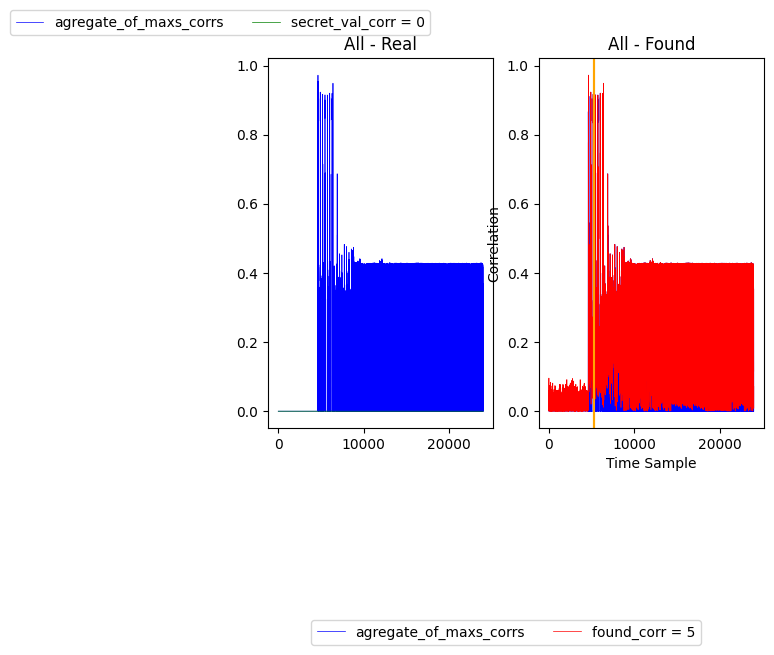

In range 5331 - 24000
 Found the soonest secret value is 5, at the time sample 5469, with correlation secret_corr = 0.916


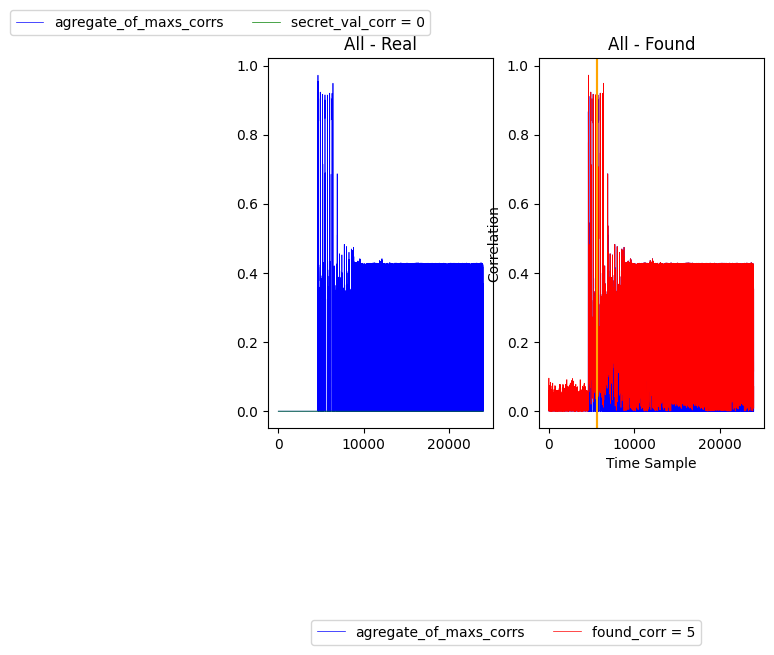

In [79]:
corr_map = abs(np.array(corr1_10000)[:,:])
analyse_corr(corr_map=corr_map, weights=np.array(out)[3:-4], stop_num = 5, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3)

11366
 Index of global max: 4641 and global_max_val: 0.9247232816852616


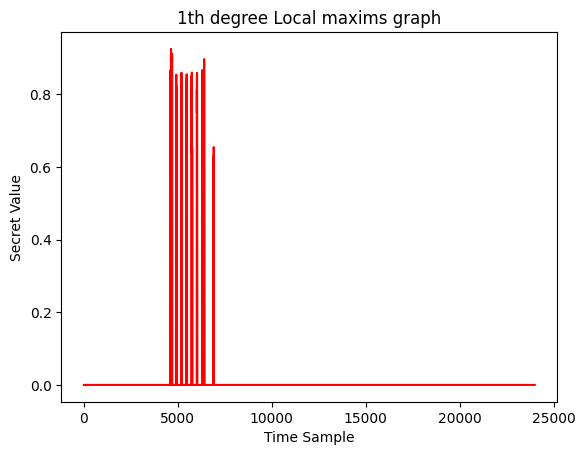

Number of uniques: 4
Number of local maxims: 122
Uniquess: [255, 1, 5, 20]
Local maxims: [255, 255, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 20, 20]


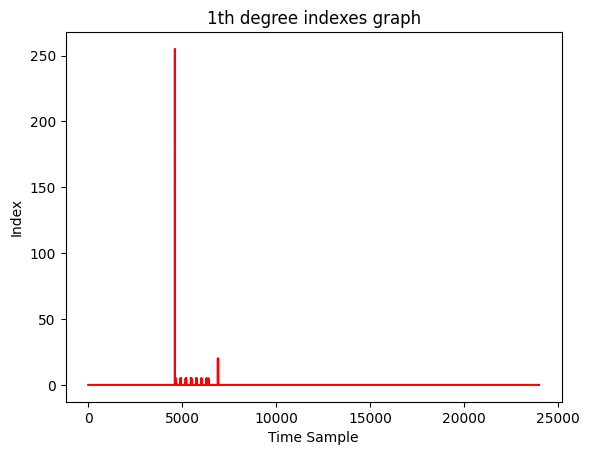

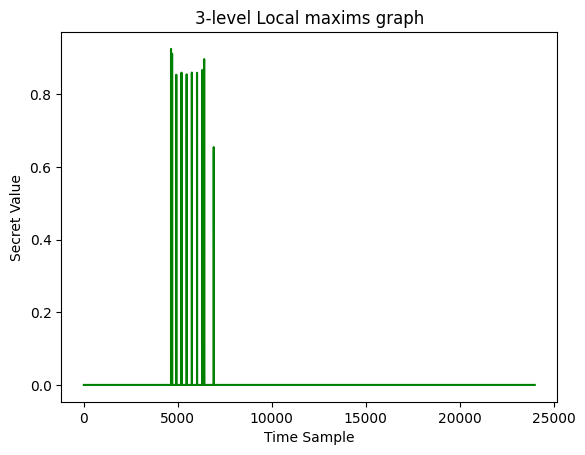

Number of uniques: 3
Number of local maxims: 10
Uniquess: [5, 1, 20]
Local maxims: [5, 1, 5, 5, 5, 5, 5, 5, 5, 20]


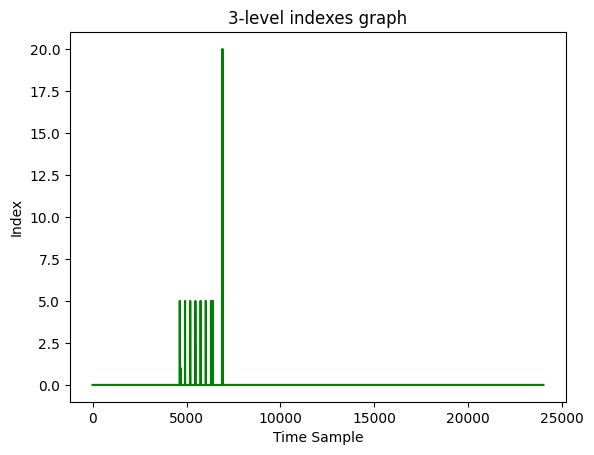

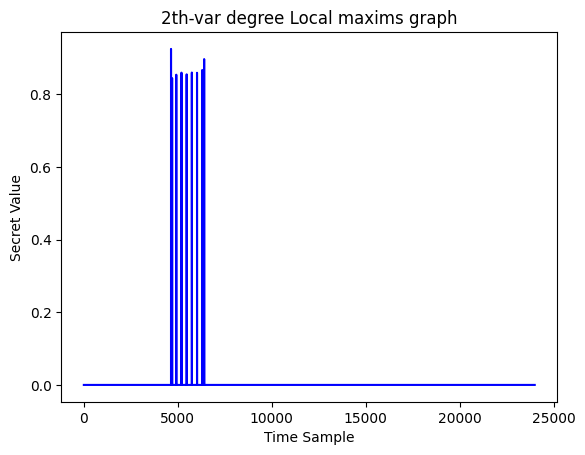

Number of uniques: 2
Number of local maxims: 9
Uniquess: [5, 1]
Local maxims: [5, 1, 5, 5, 5, 5, 5, 5, 5]


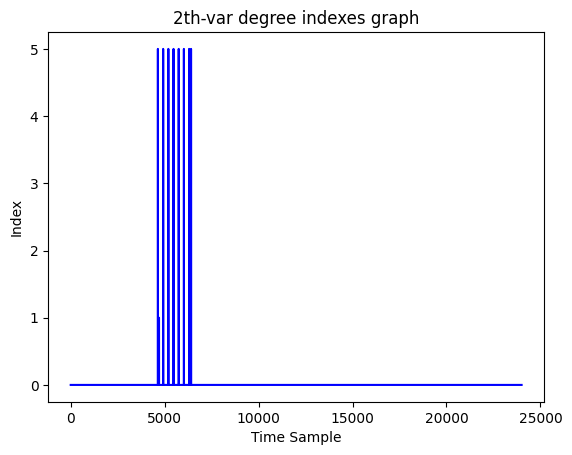

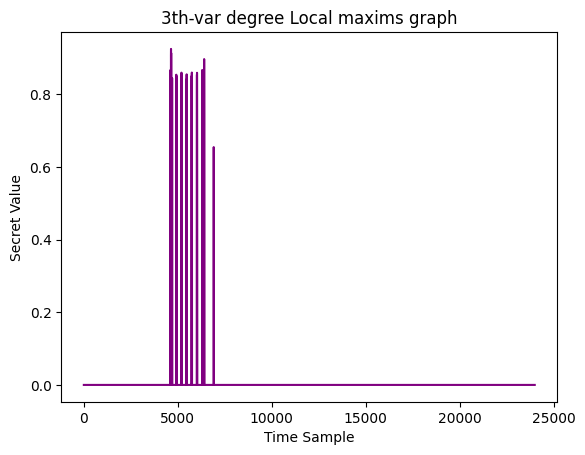

Number of uniques: 4
Number of local maxims: 73
Uniquess: [255, 1, 5, 20]
Local maxims: [255, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 20]


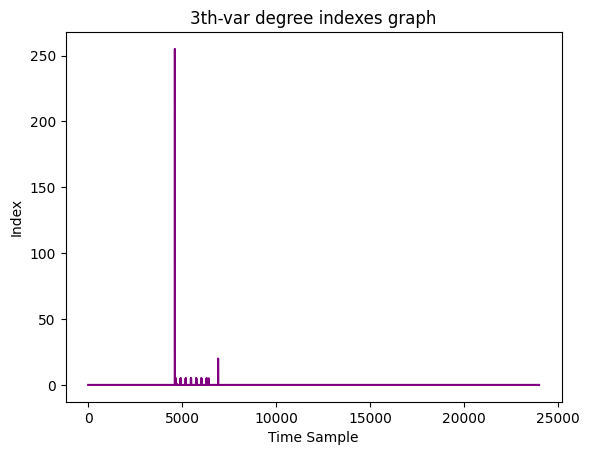

In range 0 - 24000
 Found the soonest secret value is 5, at the time sample 4641, with correlation secret_corr = 0.925


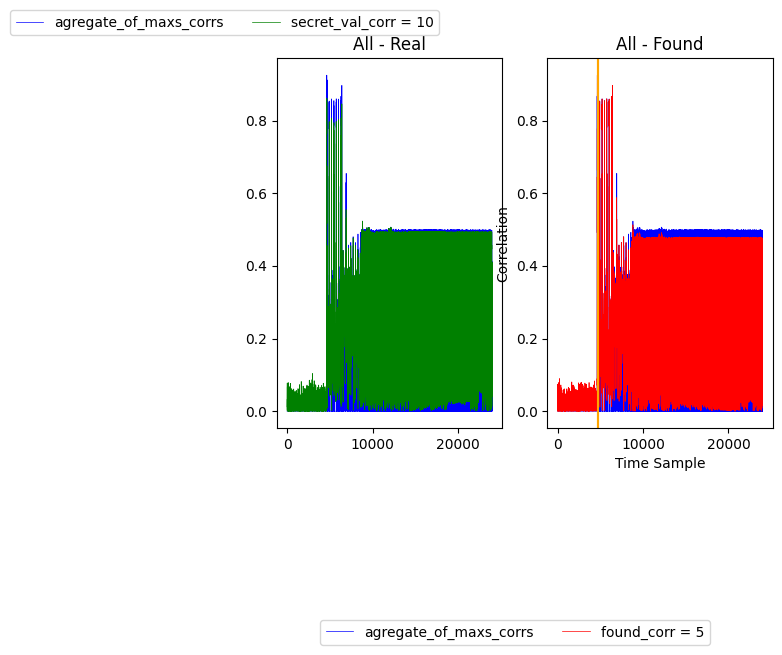

In range 4670 - 24000
 Found the soonest secret value is 1, at the time sample 4699, with correlation secret_corr = 0.844


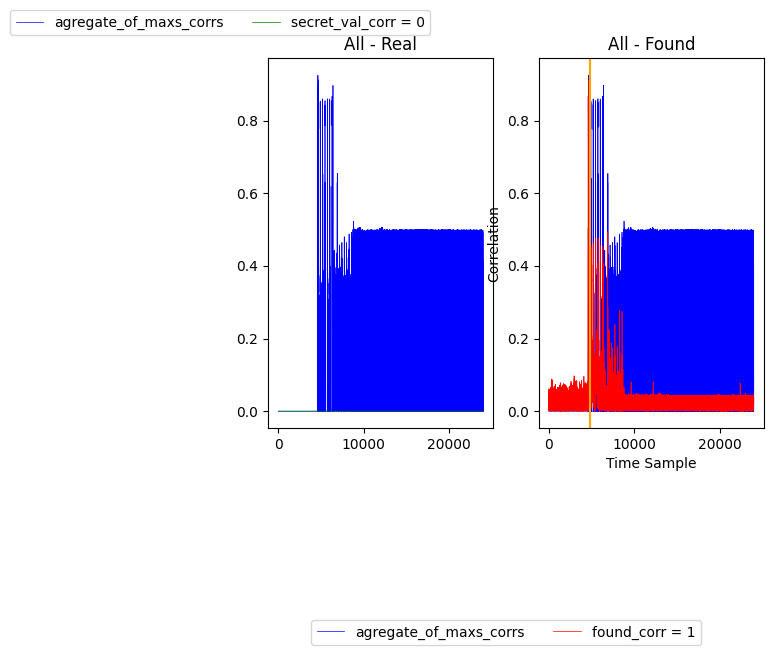

In range 4810 - 24000
 Found the soonest secret value is 5, at the time sample 4921, with correlation secret_corr = 0.854


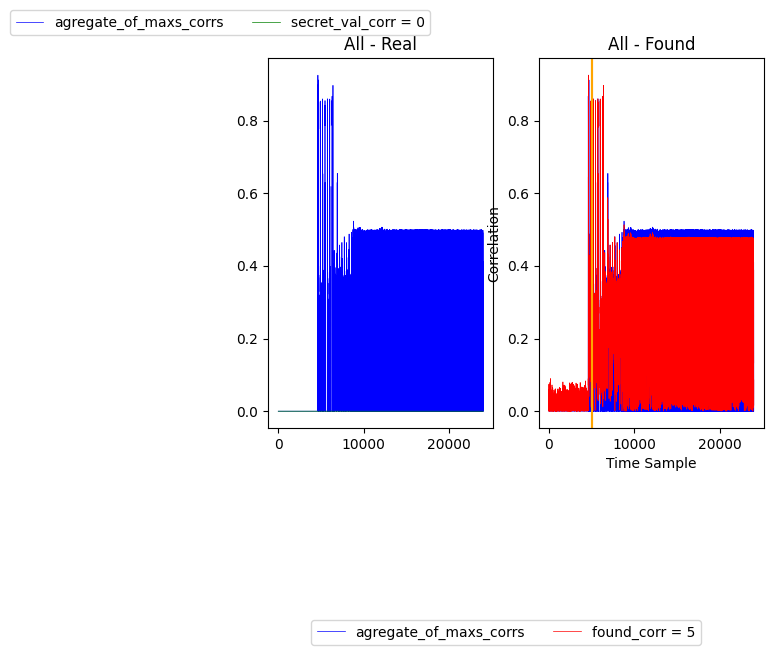

In range 5059 - 24000
 Found the soonest secret value is 5, at the time sample 5197, with correlation secret_corr = 0.859


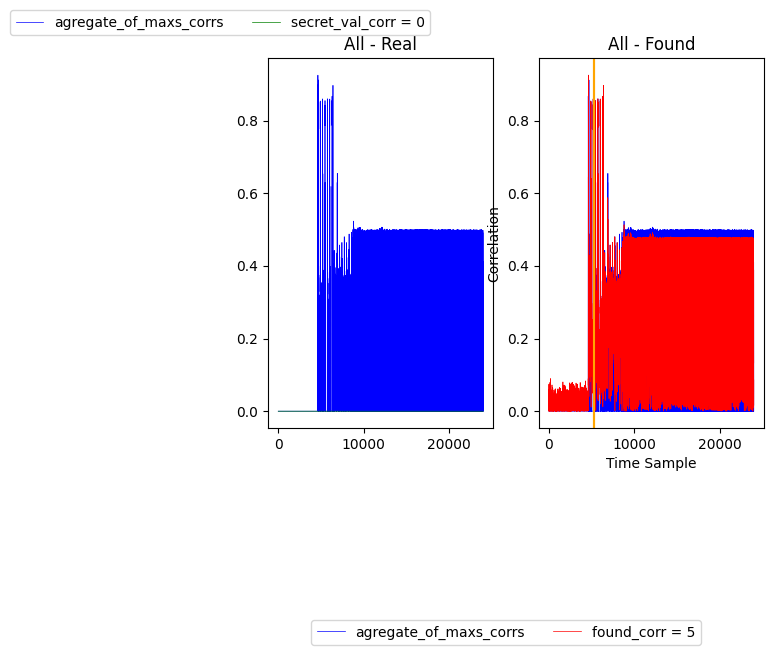

In range 5335 - 24000
 Found the soonest secret value is 5, at the time sample 5473, with correlation secret_corr = 0.855


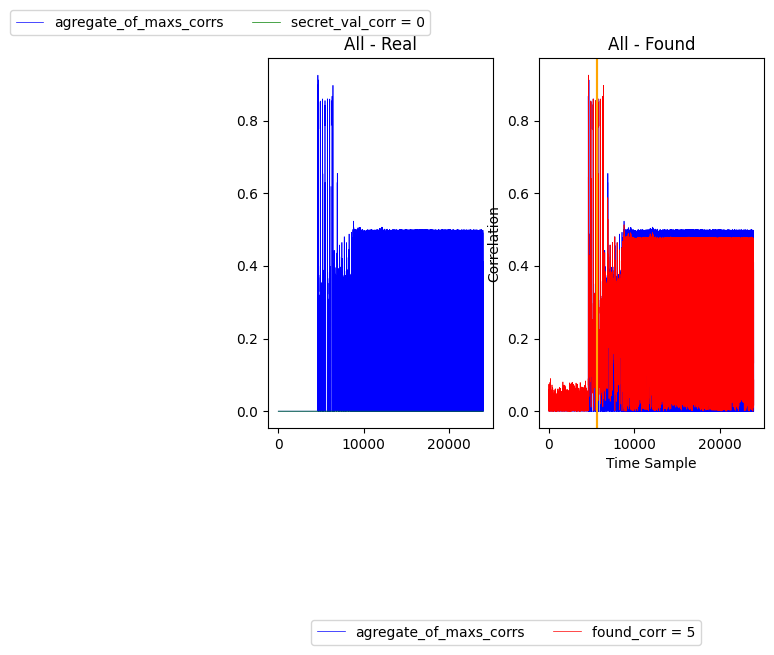

In [78]:
corr_map = abs(np.array(corr2_10000)[:,:])
analyse_corr(corr_map=corr_map, weights=np.array(out)[3:-4], stop_num = 5, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3)

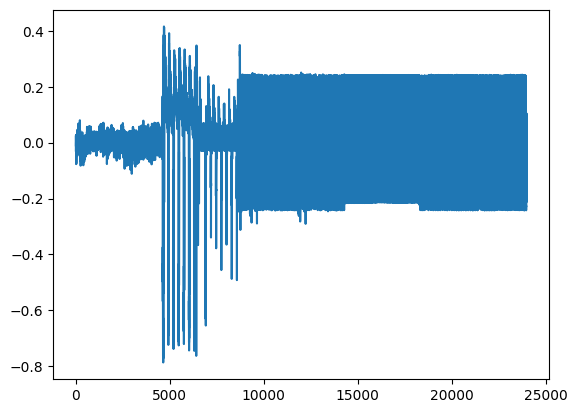

In [77]:
plt.plot(np.array(corr3_10000)[20,:])

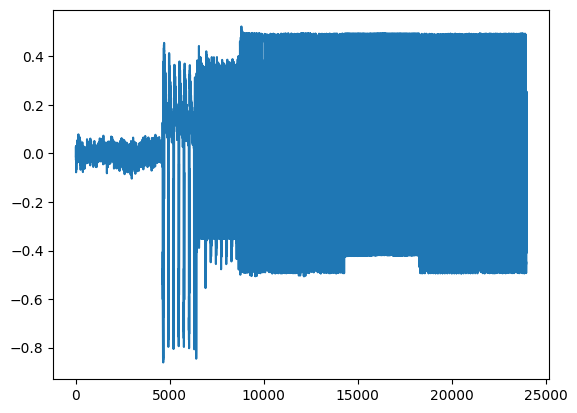

In [76]:
plt.plot(np.array(corr3_10000)[10,:])

11366
 Index of global max: 4641 and global_max_val: 0.9247232816852616


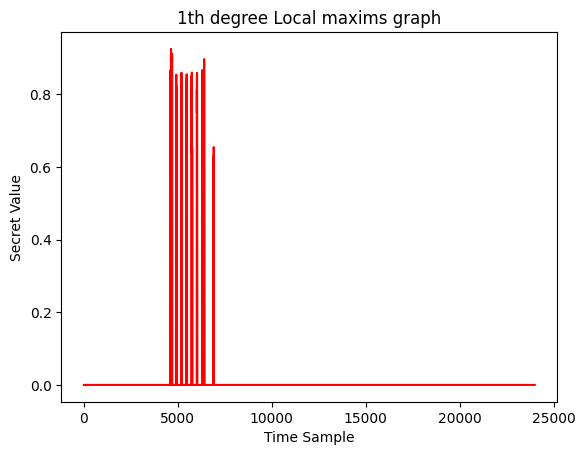

Number of uniques: 4
Number of local maxims: 122
Uniquess: [255, 1, 5, 20]
Local maxims: [255, 255, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 20, 20]


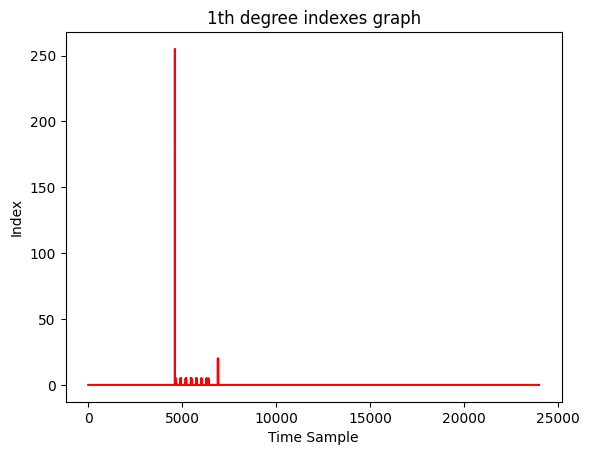

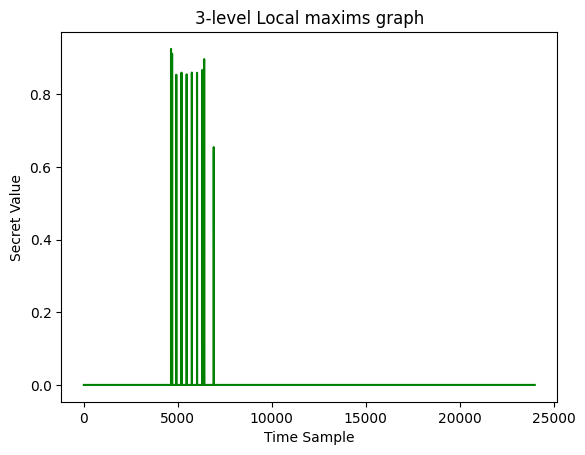

Number of uniques: 3
Number of local maxims: 10
Uniquess: [5, 1, 20]
Local maxims: [5, 1, 5, 5, 5, 5, 5, 5, 5, 20]


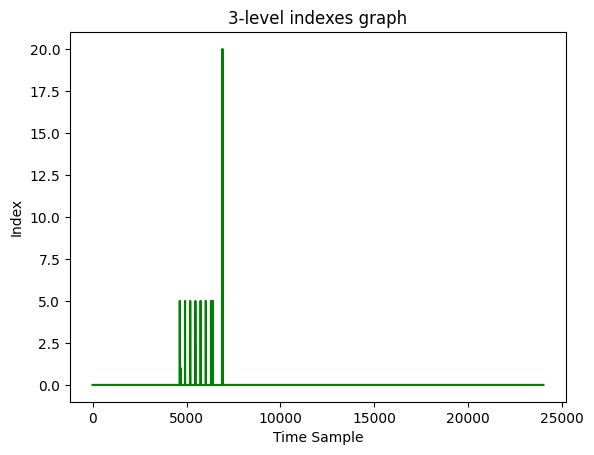

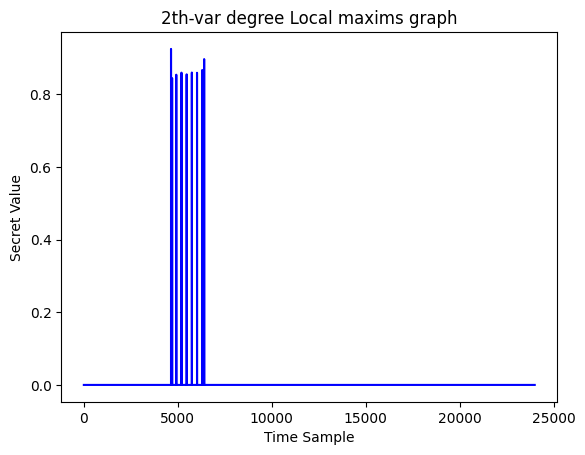

Number of uniques: 2
Number of local maxims: 9
Uniquess: [5, 1]
Local maxims: [5, 1, 5, 5, 5, 5, 5, 5, 5]


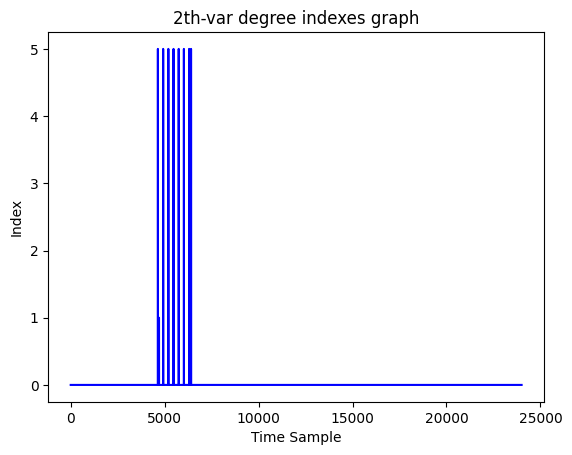

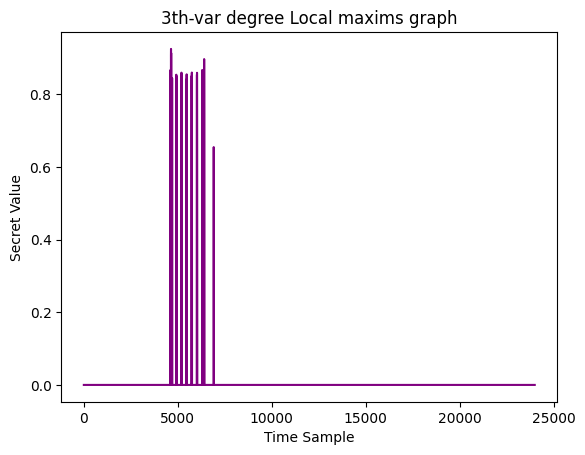

Number of uniques: 4
Number of local maxims: 73
Uniquess: [255, 1, 5, 20]
Local maxims: [255, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 20]


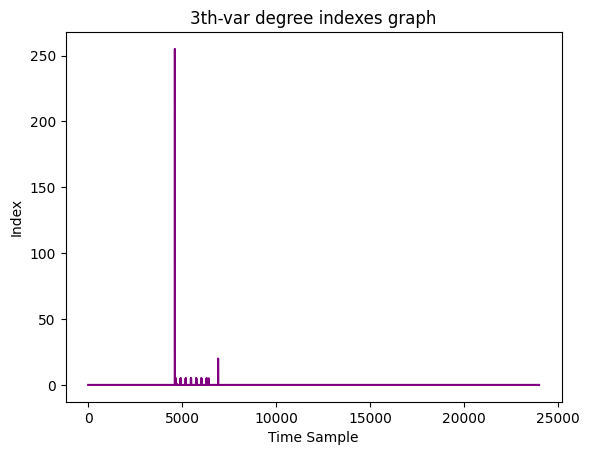

In range 0 - 24000
 Found the soonest secret value is 5, at the time sample 4641, with correlation secret_corr = 0.925


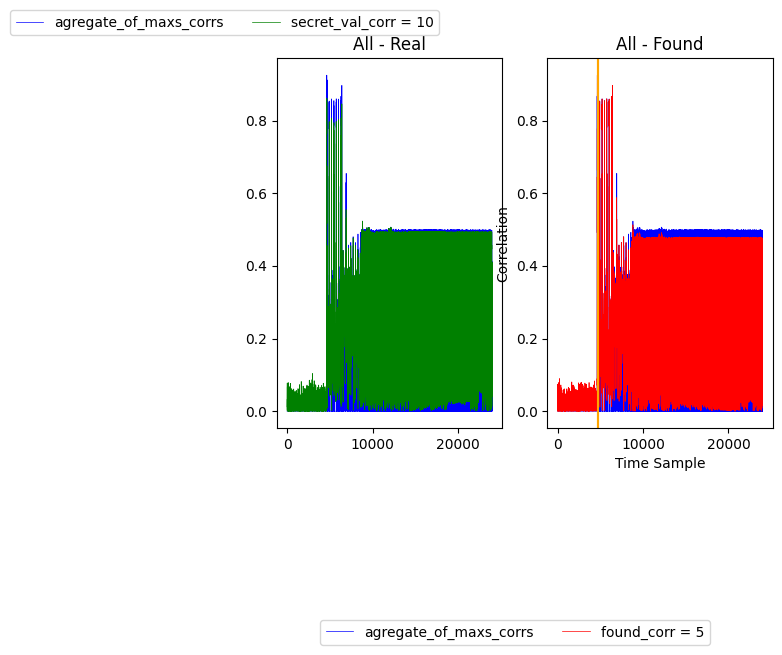

In range 4670 - 24000
 Found the soonest secret value is 1, at the time sample 4699, with correlation secret_corr = 0.844


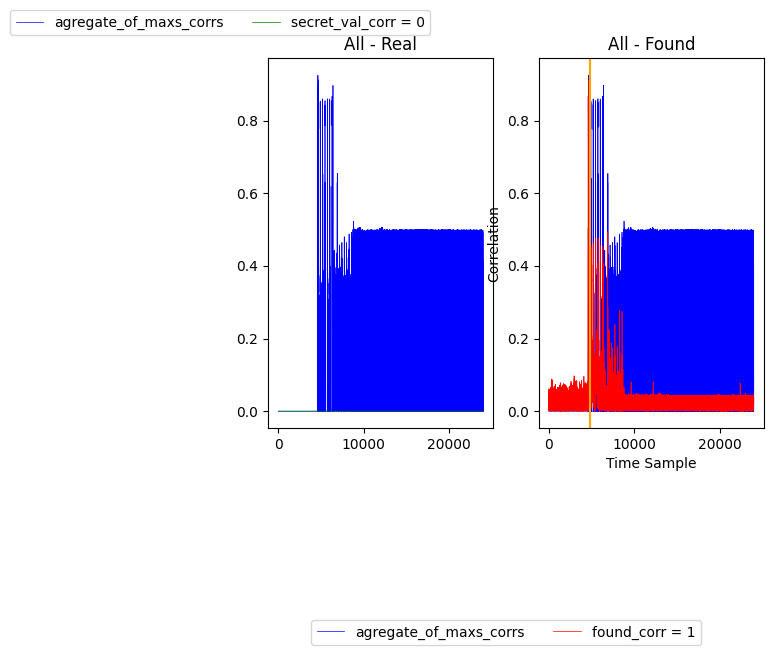

In range 4810 - 24000
 Found the soonest secret value is 5, at the time sample 4921, with correlation secret_corr = 0.854


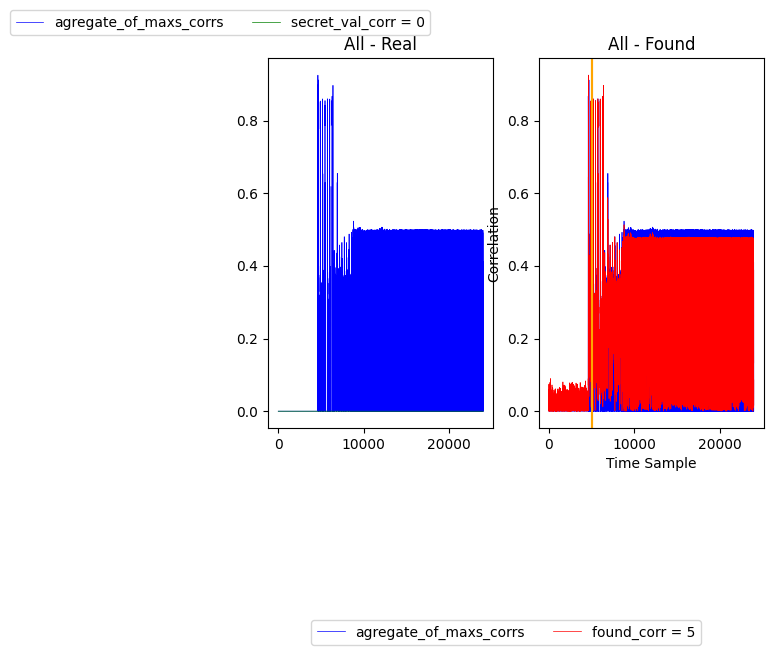

In range 5059 - 24000
 Found the soonest secret value is 5, at the time sample 5197, with correlation secret_corr = 0.859


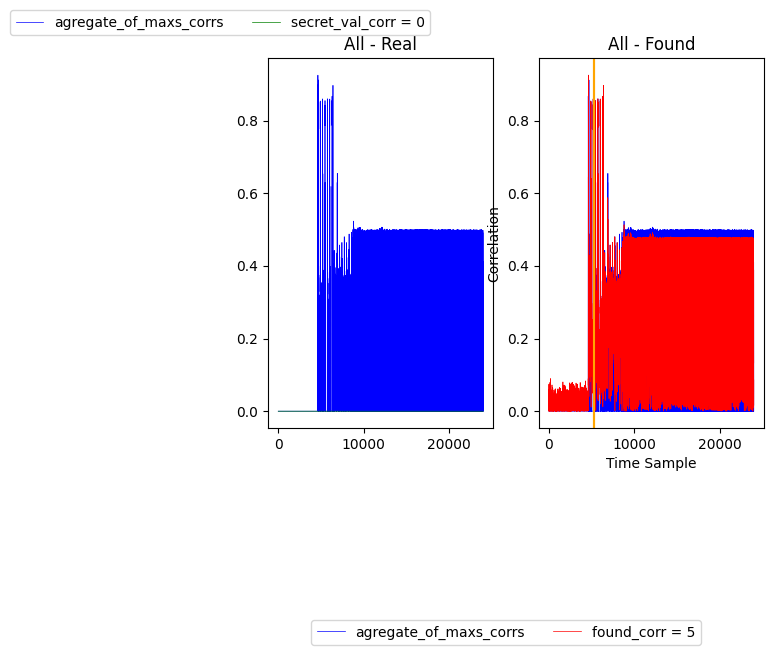

In range 5335 - 24000
 Found the soonest secret value is 5, at the time sample 5473, with correlation secret_corr = 0.855


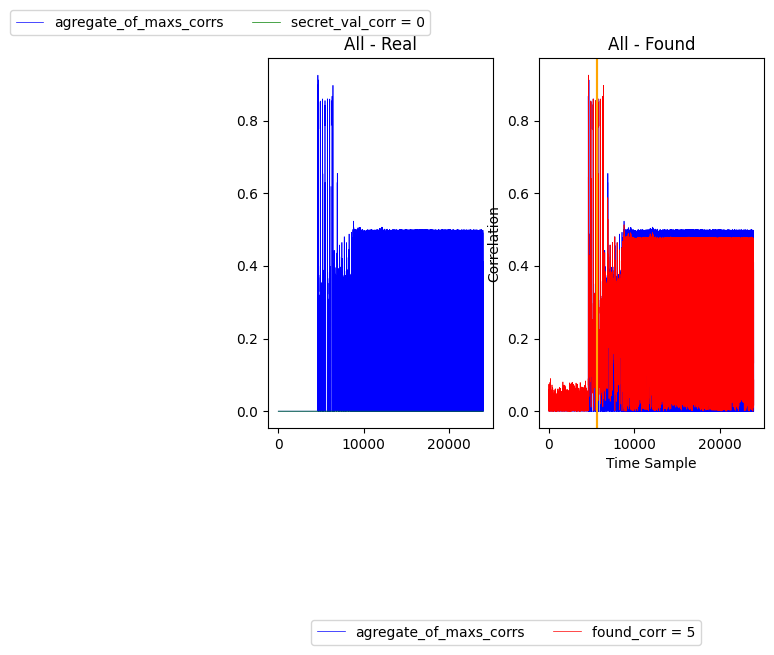

In [75]:
corr_map = abs(np.array(corr3_10000)[:,:])
analyse_corr(corr_map=corr_map, weights=np.array(out)[3:-4], stop_num = 5, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3)

### traces=10000, decimate=1

In [70]:
corr1_10000, corr2_10000, corr3_10000, rand_input, waves, out = capture_correlate(scope, epochs_list = [10000], ncorr_all1 = None, ncorr_all2 = None, decimate = 1, reverse = False, runName="_722_BasicMLP-NO_OPT")

Capturing and Analysing the traces::   0%|          | 0/1 [00:00<?, ?it/s]

⚠️ Generating rand_input..


                                Capturing traces:   0%|          | 0/10000 [00:00<?, ?it/s]

(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:642) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 0b
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:642) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 0a
(ChipWhisperer Target WARNING|File SimpleSerial2.py:514) Unexpected start to command 101
(ChipWhisperer Target WARNING|File SimpleSerial2.py:502) Read timed out: 


Target timed out!


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:642) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 0b
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:642) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 0a
(ChipWhisperer Target WARNING|File SimpleSerial2.py:514) Unexpected start to command 101
(ChipWhisperer Target WARNING|File SimpleSerial2.py:502) Read timed out: 


Target timed out!



KeyboardInterrupt



##### Aditional Analysis

### traces=3000, decimate=2

Capturing and Analysing the traces::   0%|          | 0/1 [00:00<?, ?it/s]

⚠️ Generating rand_input..


                                Capturing traces:   0%|          | 0/3000 [00:00<?, ?it/s]

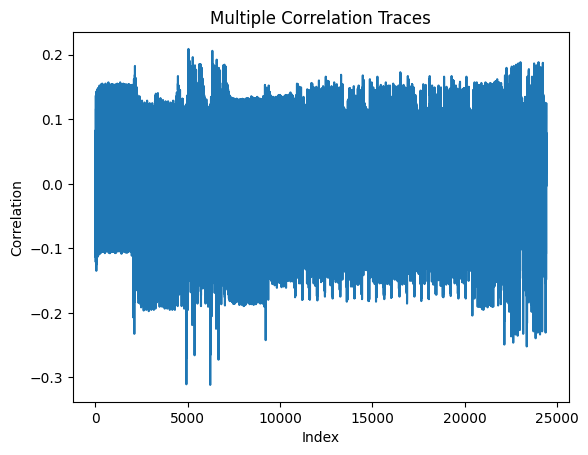

✔️ Saving Rand_input succesfull.
🌍 Saving Secret_weights succesfull.
CWbytearray(b'00 72 16 0a 00 00 00 00 00 00 00 14 00 00 00 00 00 00 00 4d d2 25 55 2a 00 50 00')


Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

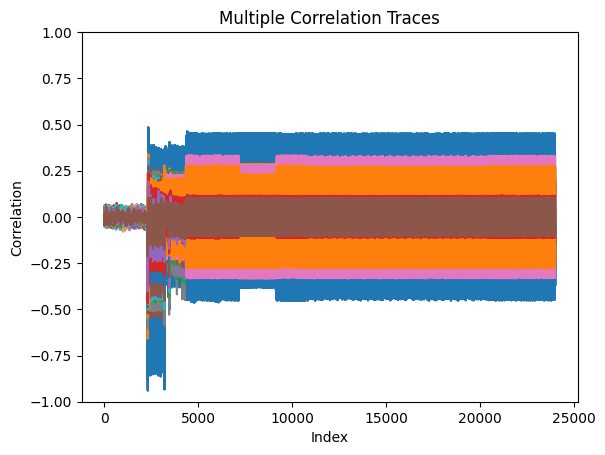

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

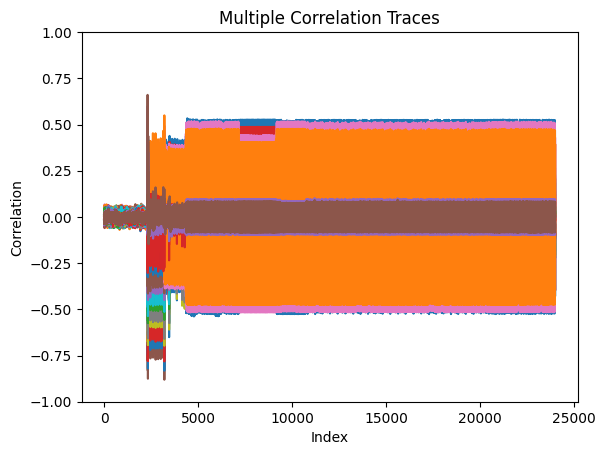

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

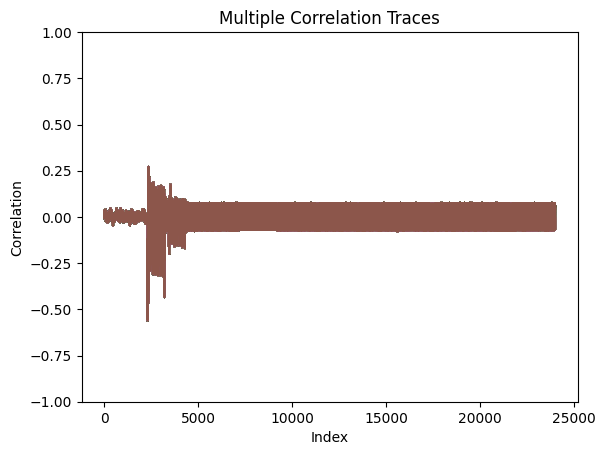

✔️ Scope disconnected.
✔️ Firmware disconnected.


In [33]:
corr1_10000, corr2_10000, corr3_10000, rand_input, waves, out = capture_correlate(scope, epochs_list = [3000], ncorr_all1 = None, ncorr_all2 = None, decimate = 2, reverse = False, runName="_722_BasicMLP-NO_OPT")

##### Additional Analysis

10930
 Index of global max: 2327 and global_max_val: 0.9382811649443774


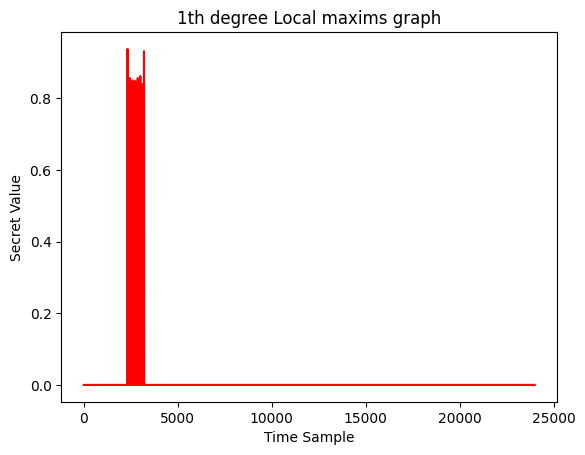

Number of uniques: 2
Number of local maxims: 33
Uniquess: [1, 5]
Local maxims: [1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


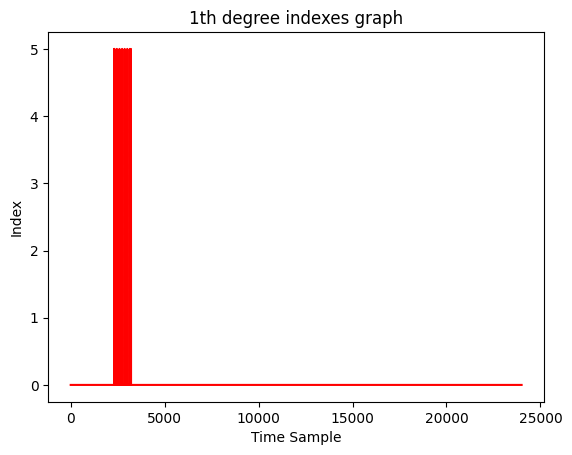

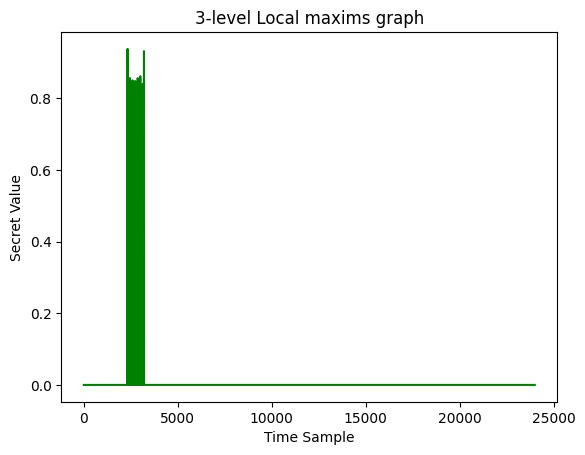

Number of uniques: 2
Number of local maxims: 9
Uniquess: [5, 1]
Local maxims: [5, 1, 5, 5, 5, 5, 5, 5, 5]


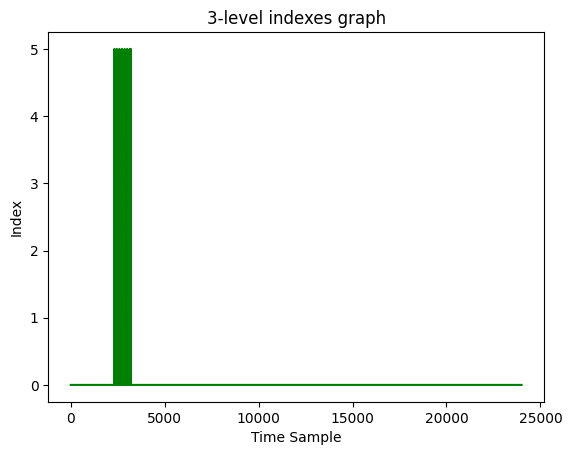

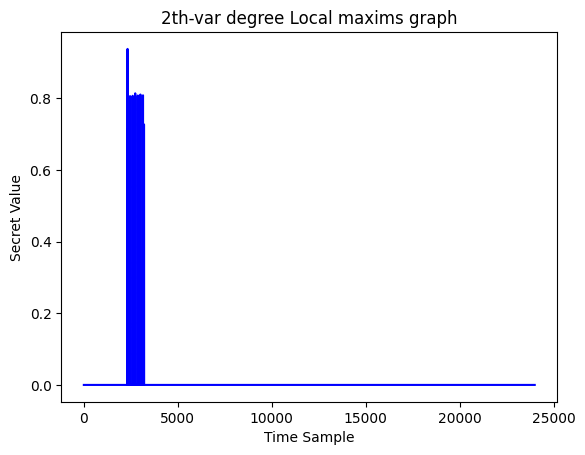

Number of uniques: 2
Number of local maxims: 9
Uniquess: [5, 1]
Local maxims: [5, 1, 5, 5, 5, 5, 5, 5, 5]


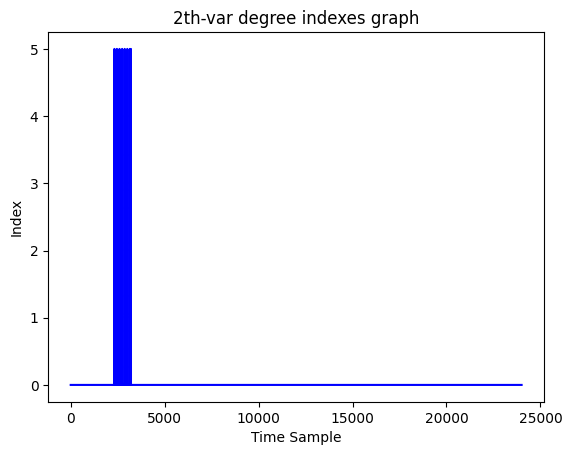

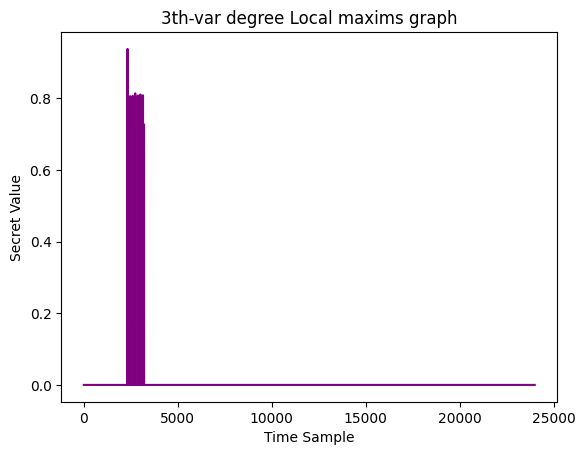

Number of uniques: 2
Number of local maxims: 12
Uniquess: [1, 5]
Local maxims: [1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


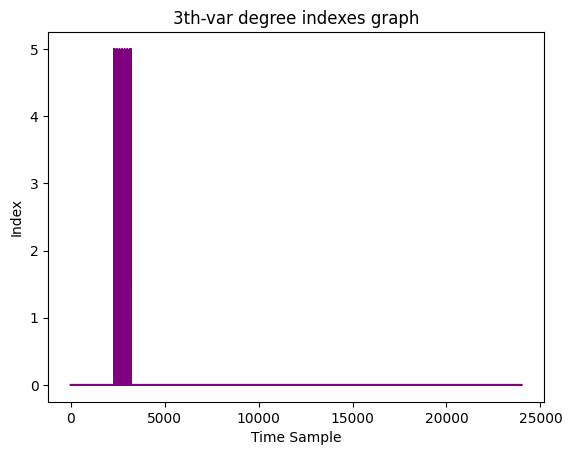

In range 0 - 24000
 Found the soonest secret value is 5, at the time sample 2327, with correlation secret_corr = 0.938


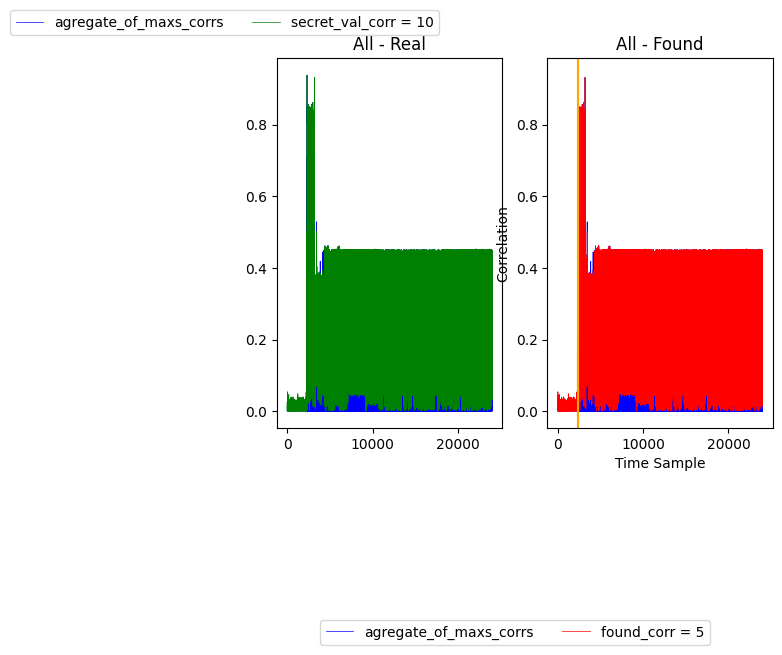

In range 2339 - 24000
 Found the soonest secret value is 1, at the time sample 2351, with correlation secret_corr = 0.716


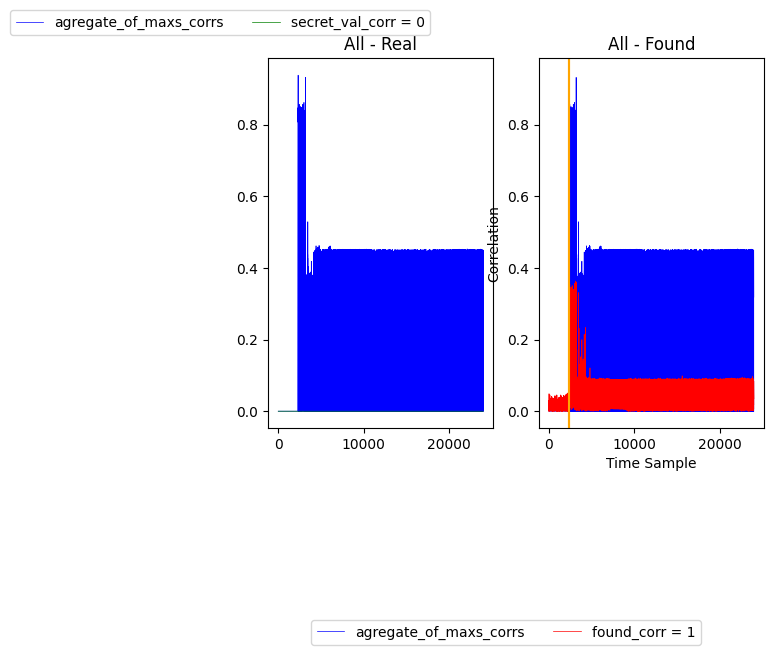

In range 2406 - 24000
 Found the soonest secret value is 5, at the time sample 2460, with correlation secret_corr = 0.806


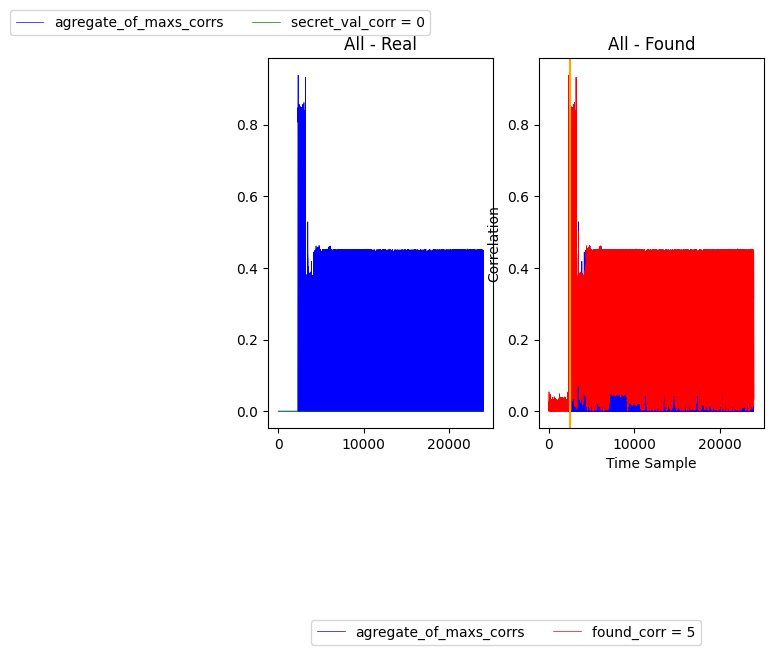

In range 2529 - 24000
 Found the soonest secret value is 5, at the time sample 2598, with correlation secret_corr = 0.807


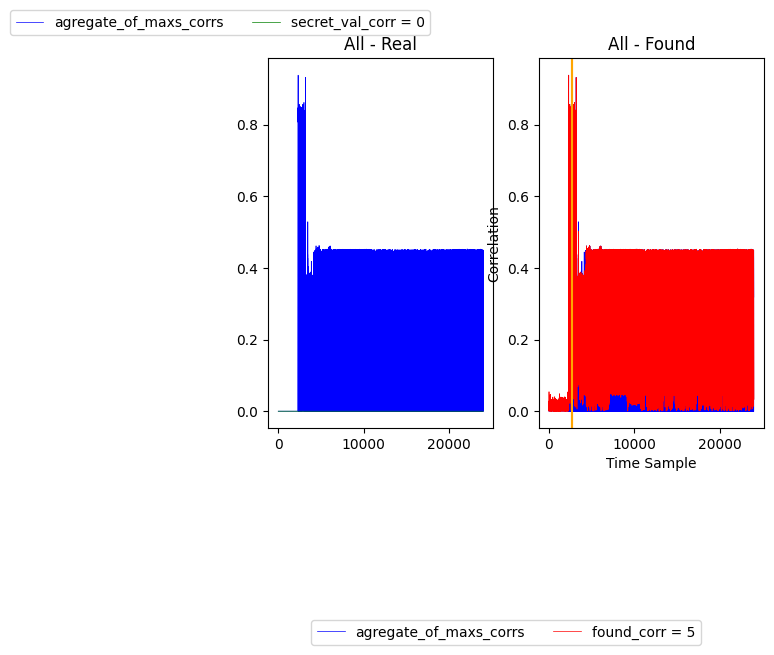

In range 2667 - 24000
 Found the soonest secret value is 5, at the time sample 2736, with correlation secret_corr = 0.814


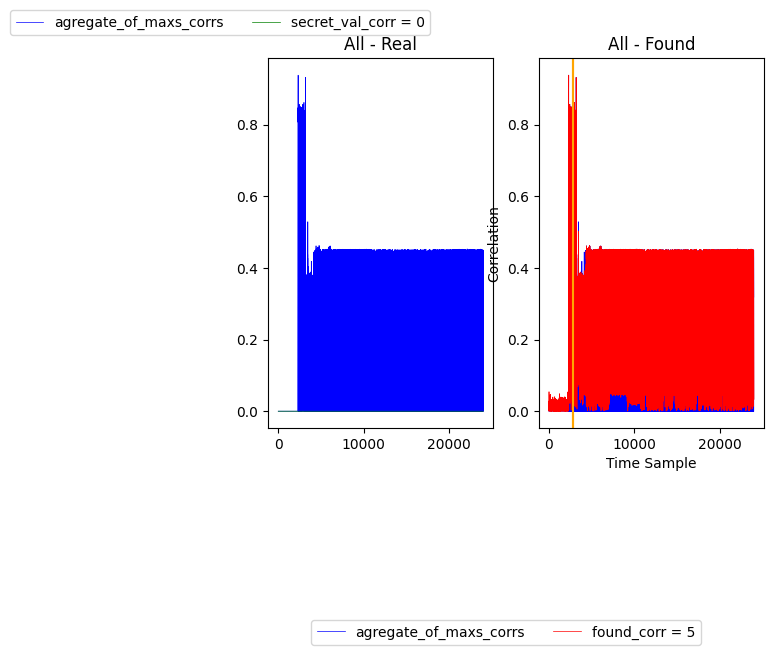

In [48]:
corr_map = abs(np.array(corr1_10000)[:,:])
analyse_corr(corr_map=corr_map, weights=np.array(out)[3:-4], stop_num = 5, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3)

2744
 Index of global max: 3202 and global_max_val: 0.8810185101168834


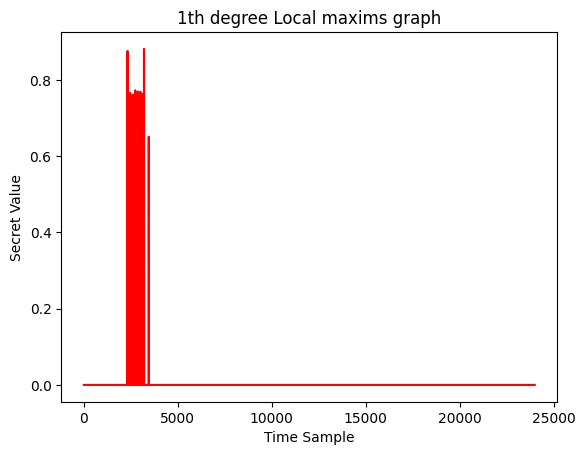

Number of uniques: 3
Number of local maxims: 39
Uniquess: [1, 5, 20]
Local maxims: [1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 20]


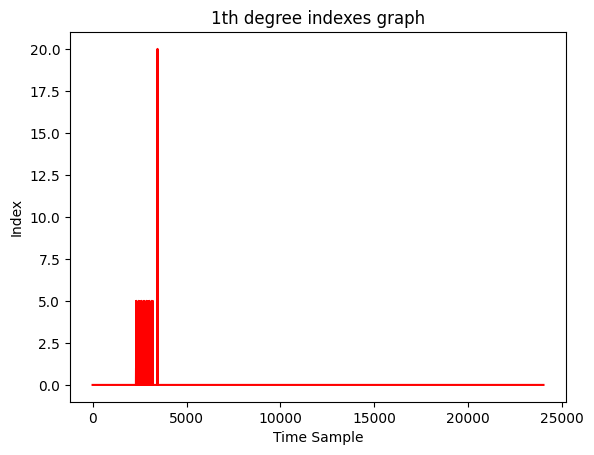

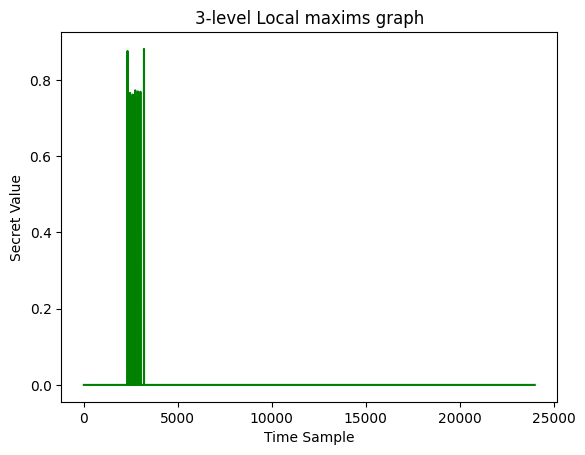

Number of uniques: 1
Number of local maxims: 7
Uniquess: [5]
Local maxims: [5, 5, 5, 5, 5, 5, 5]


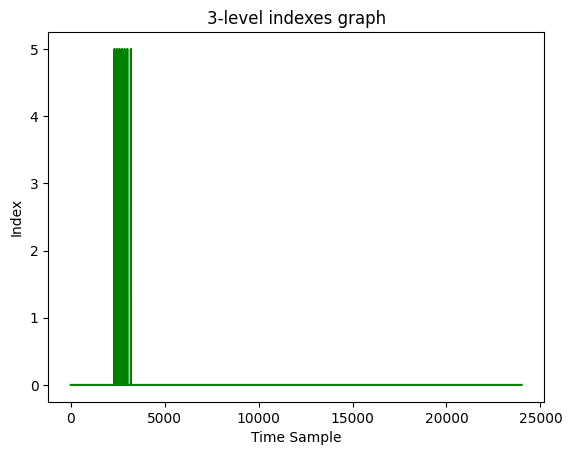

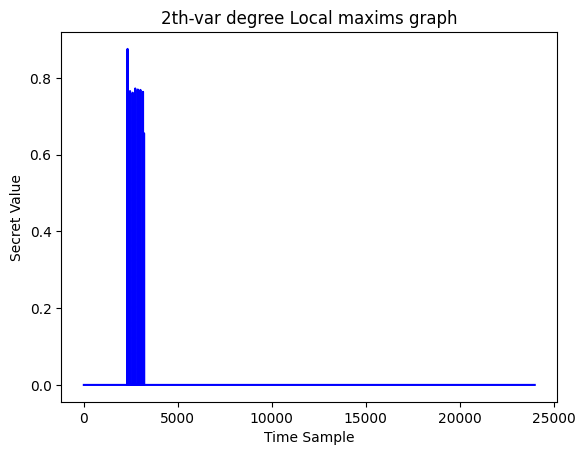

Number of uniques: 2
Number of local maxims: 9
Uniquess: [5, 1]
Local maxims: [5, 1, 5, 5, 5, 5, 5, 5, 5]


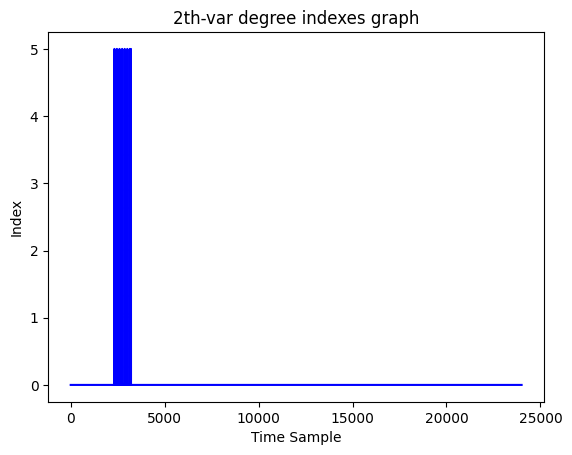

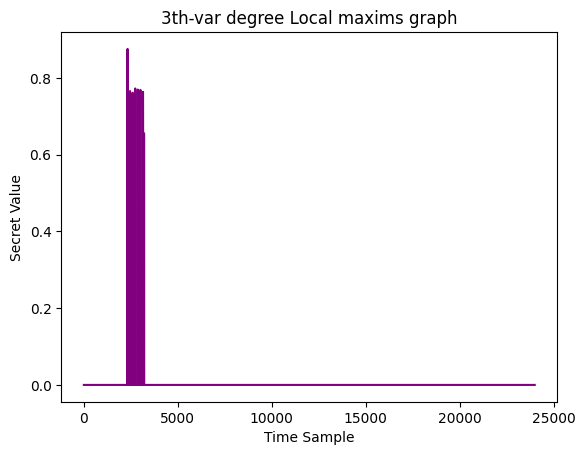

Number of uniques: 2
Number of local maxims: 12
Uniquess: [1, 5]
Local maxims: [1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


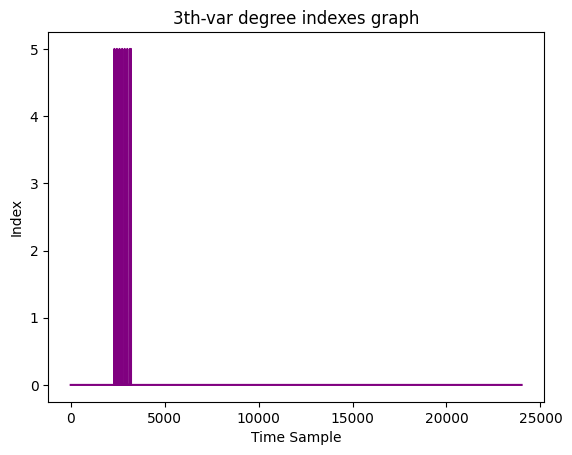

In range 0 - 24000
 Found the soonest secret value is 5, at the time sample 2327, with correlation secret_corr = 0.876


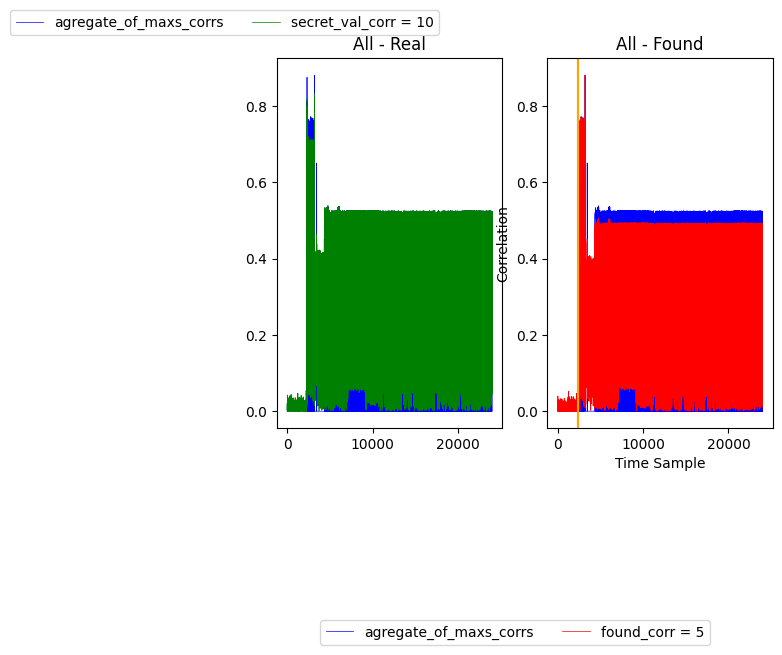

In range 2339 - 24000
 Found the soonest secret value is 1, at the time sample 2351, with correlation secret_corr = 0.716


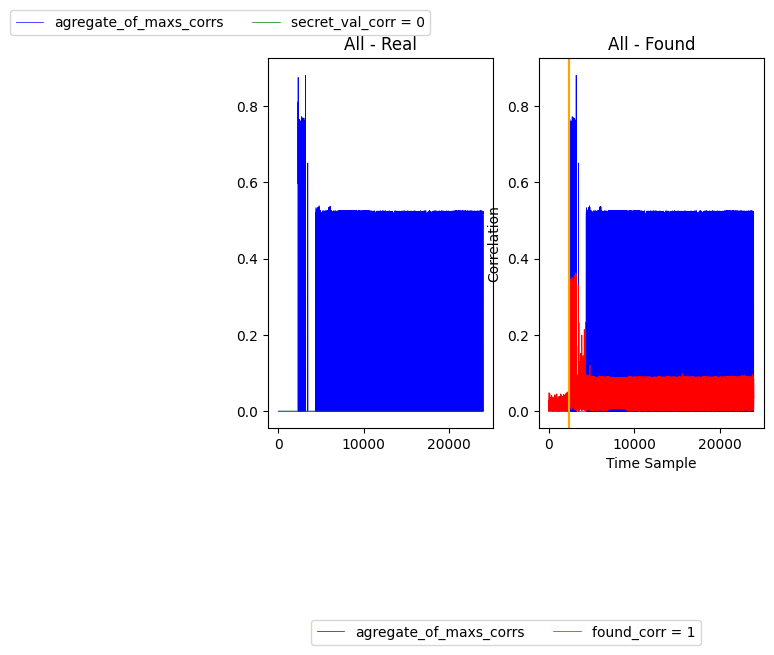

In range 2406 - 24000
 Found the soonest secret value is 5, at the time sample 2460, with correlation secret_corr = 0.766


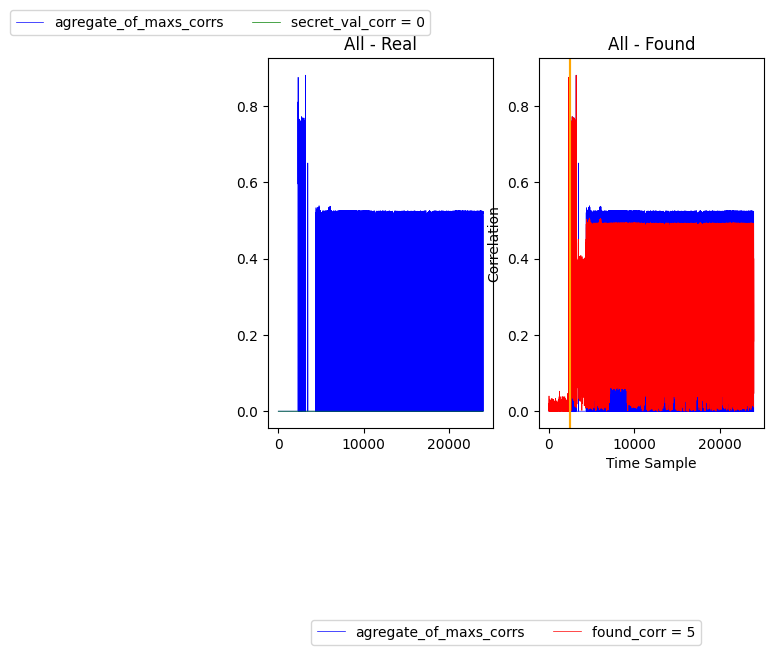

In range 2529 - 24000
 Found the soonest secret value is 5, at the time sample 2598, with correlation secret_corr = 0.762


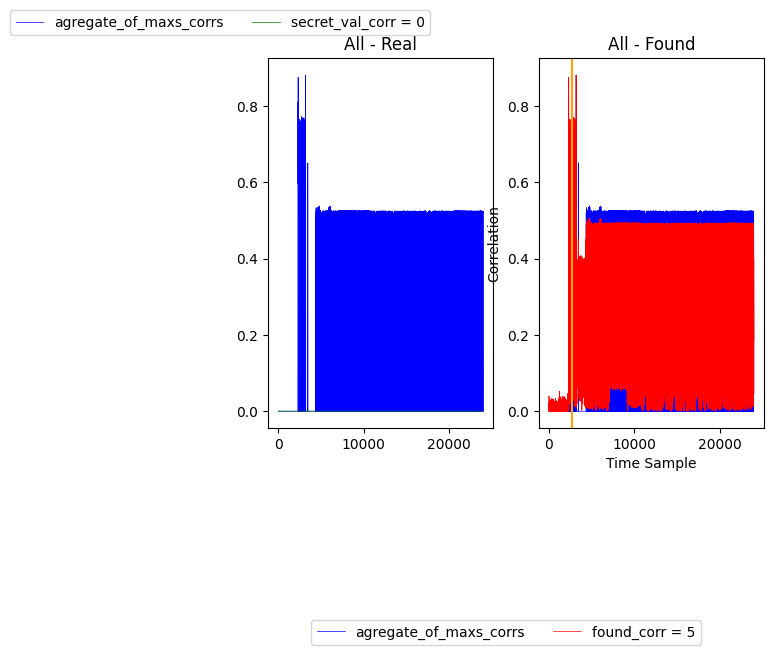

In range 2667 - 24000
 Found the soonest secret value is 5, at the time sample 2736, with correlation secret_corr = 0.772


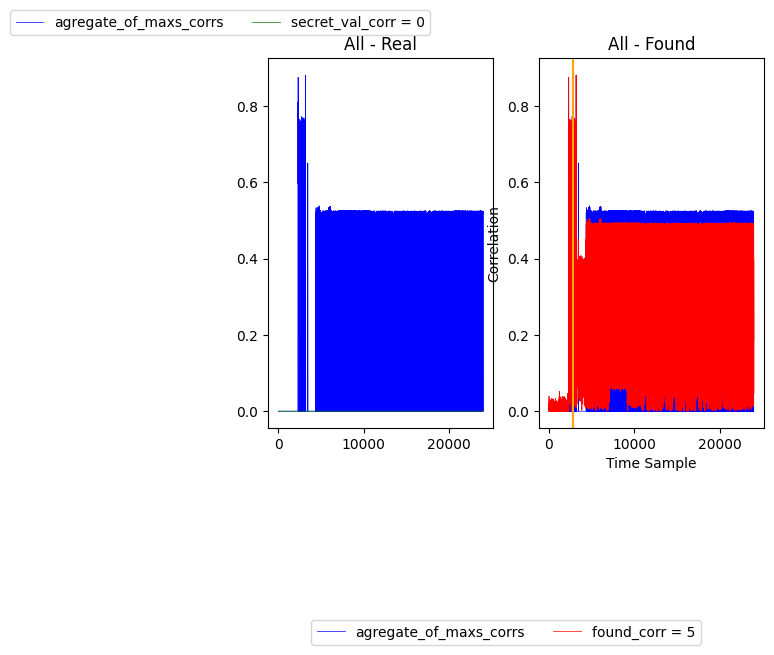

In [45]:
corr_map = abs(np.array(corr2_10000)[:,:])
analyse_corr(corr_map=corr_map, weights=np.array(out)[3:-4], stop_num = 5, maxims_map = None,
                 _index = 0, peak_range = 0.5, show_info=True, mountain_half_dist = 5, level = 3)

12384
 Index of global max: 3202 and global_max_val: 0.8810185101168834


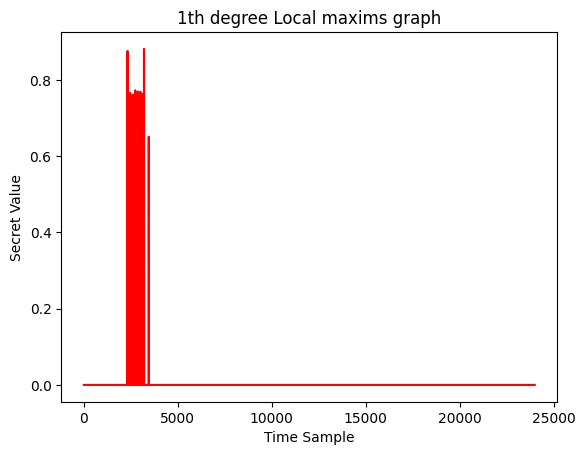

Number of uniques: 3
Number of local maxims: 39
Uniquess: [1, 5, 20]
Local maxims: [1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 20]


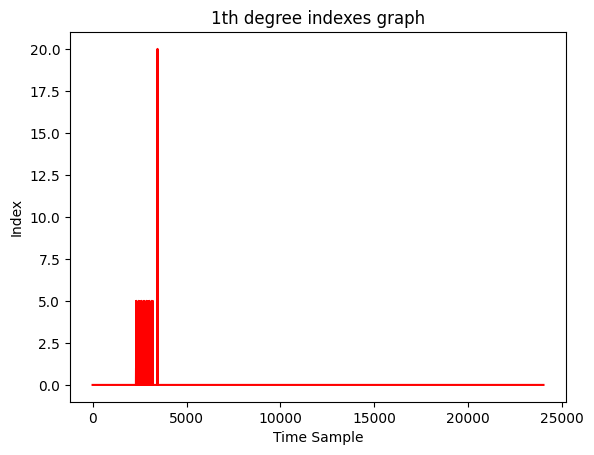

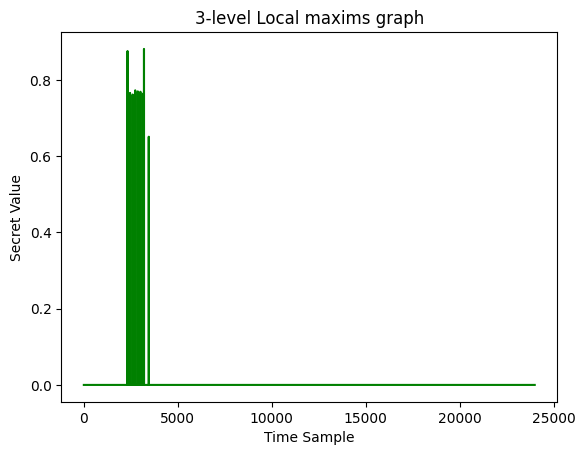

Number of uniques: 3
Number of local maxims: 10
Uniquess: [5, 1, 20]
Local maxims: [5, 1, 5, 5, 5, 5, 5, 5, 5, 20]


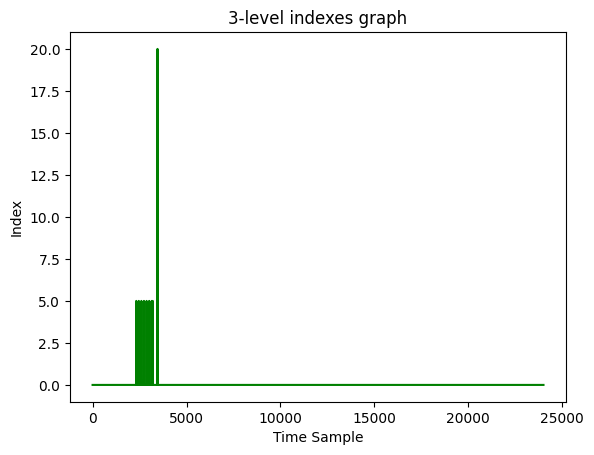

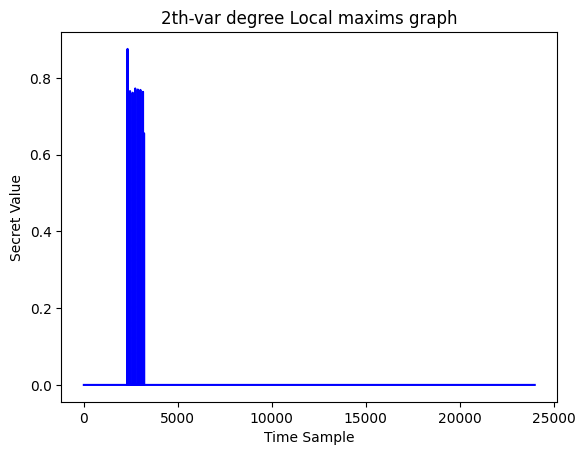

Number of uniques: 2
Number of local maxims: 9
Uniquess: [5, 1]
Local maxims: [5, 1, 5, 5, 5, 5, 5, 5, 5]


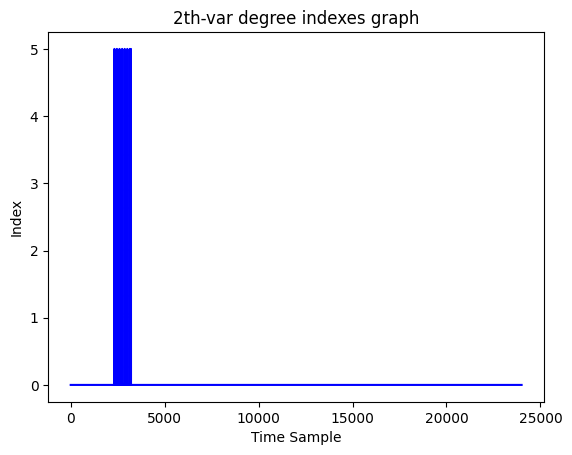

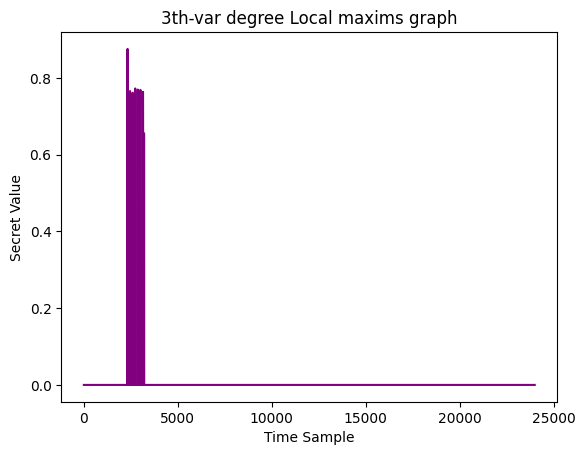

Number of uniques: 2
Number of local maxims: 12
Uniquess: [1, 5]
Local maxims: [1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


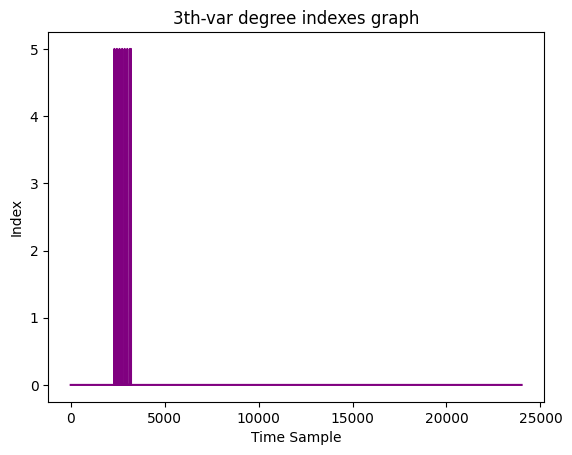

In range 0 - 24000
 Found the soonest secret value is 5, at the time sample 2327, with correlation secret_corr = 0.876


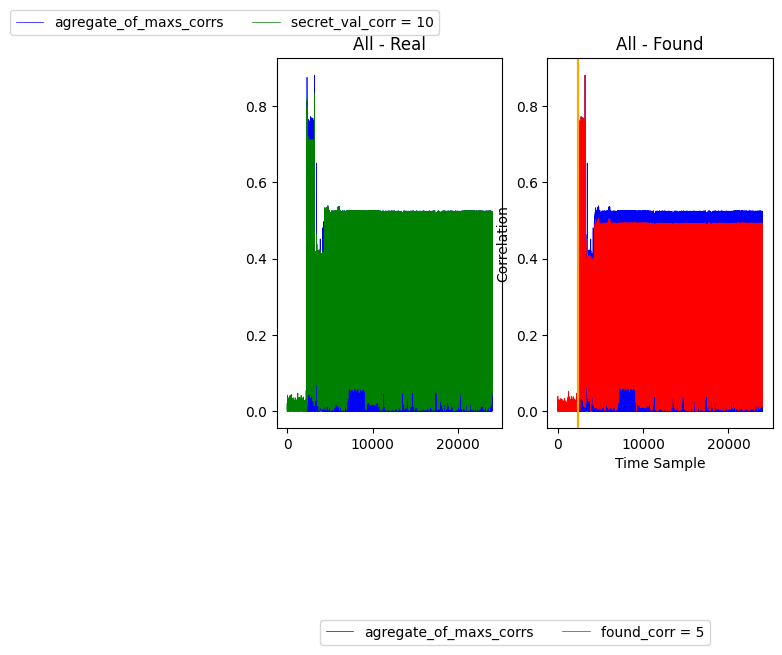

In range 2339 - 24000
 Found the soonest secret value is 1, at the time sample 2351, with correlation secret_corr = 0.716


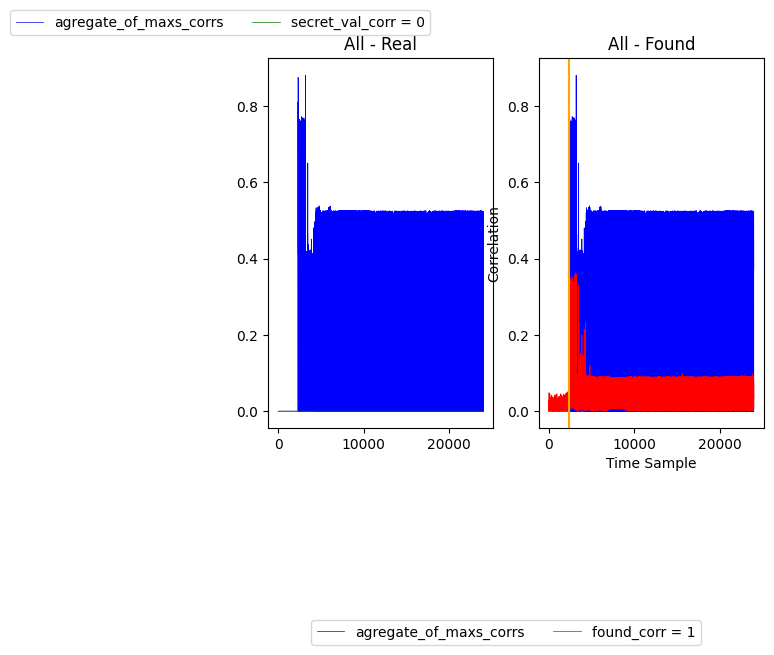

In range 2406 - 24000
 Found the soonest secret value is 5, at the time sample 2460, with correlation secret_corr = 0.766


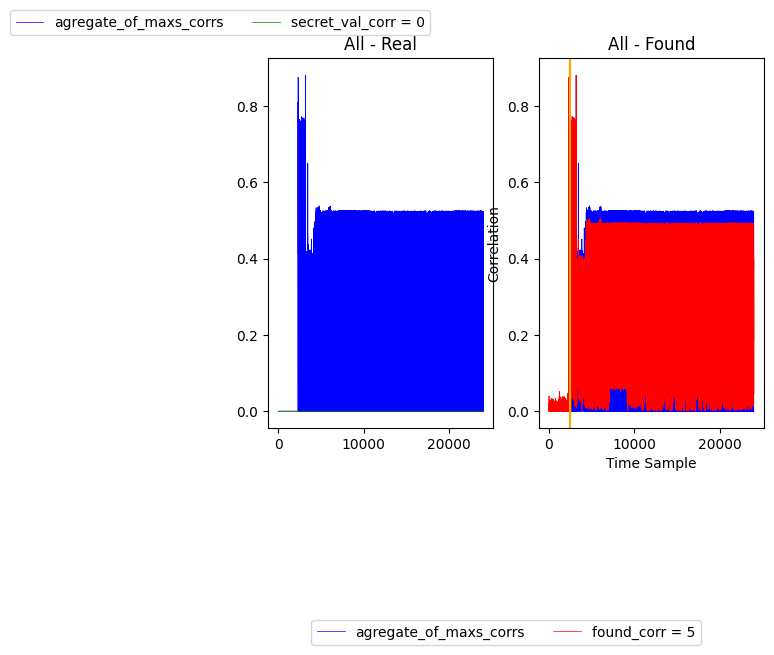

In range 2529 - 24000
 Found the soonest secret value is 5, at the time sample 2598, with correlation secret_corr = 0.762


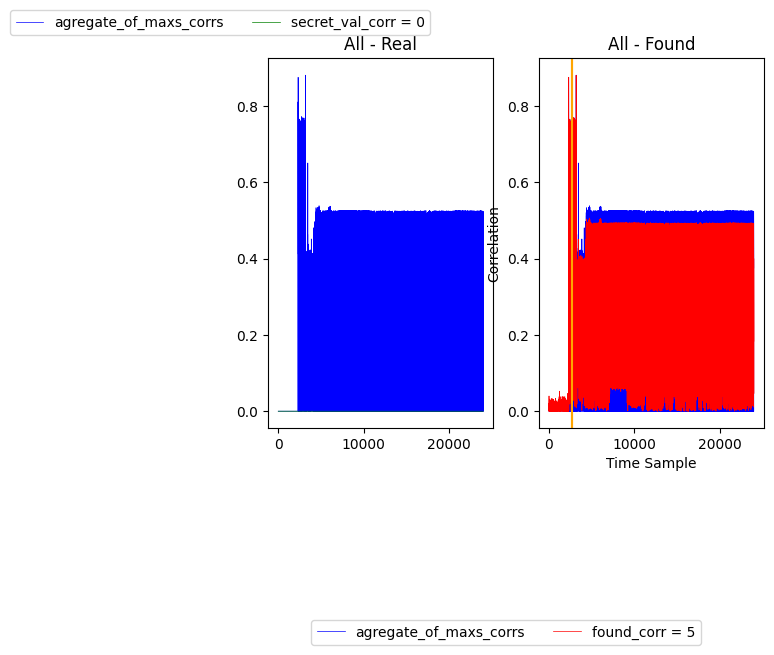

In range 2667 - 24000
 Found the soonest secret value is 5, at the time sample 2736, with correlation secret_corr = 0.772


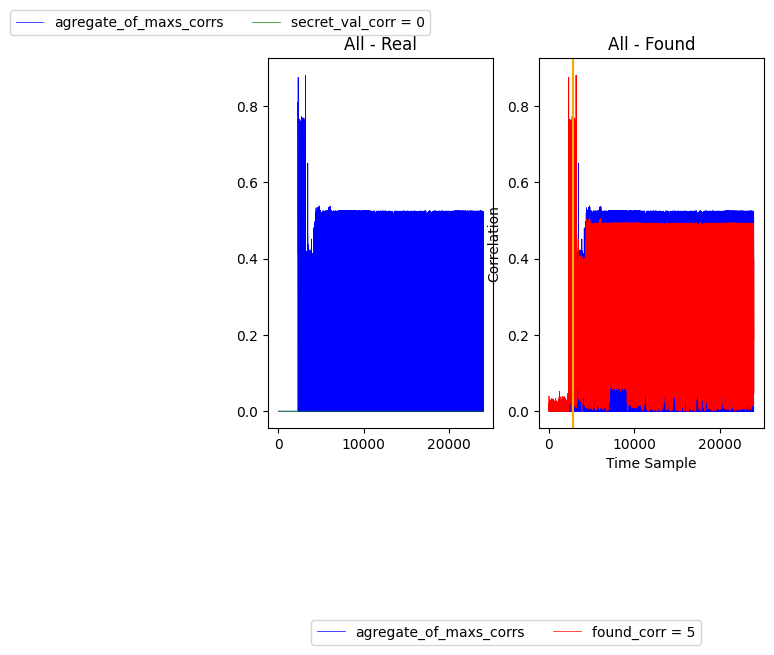

In [35]:
corr_map = abs(np.array(corr3_10000)[:,:])
analyse_corr(corr_map=corr_map, weights=np.array(out)[3:-4], stop_num = 5, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3)

### traces=3000, decimate=1

Capturing and Analysing the traces::   0%|          | 0/1 [00:00<?, ?it/s]

⚠️ Generating rand_input..


                                Capturing traces:   0%|          | 0/3000 [00:00<?, ?it/s]

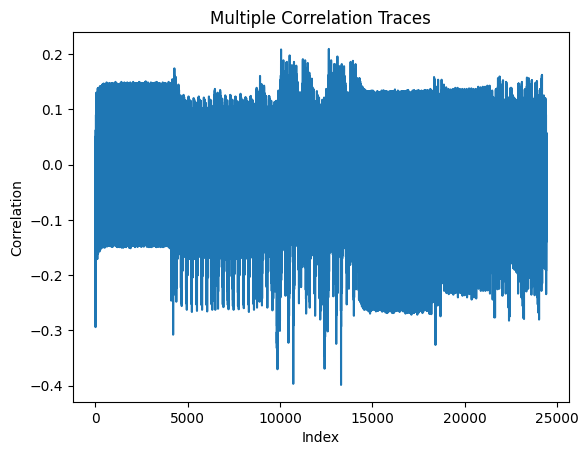

✔️ Saving Rand_input succesfull.
🌍 Saving Secret_weights succesfull.
CWbytearray(b'00 72 16 0a 00 00 00 00 00 00 00 14 00 00 00 00 00 00 00 4d d2 25 55 2a 00 50 00')


Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

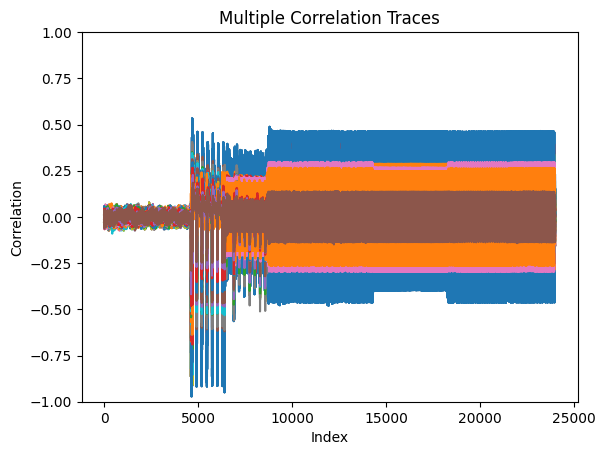

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

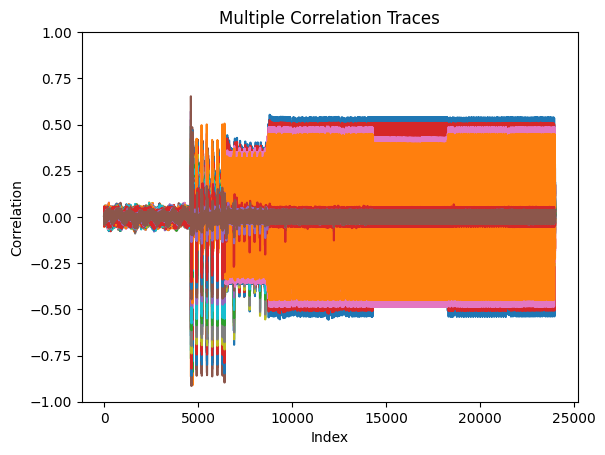

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

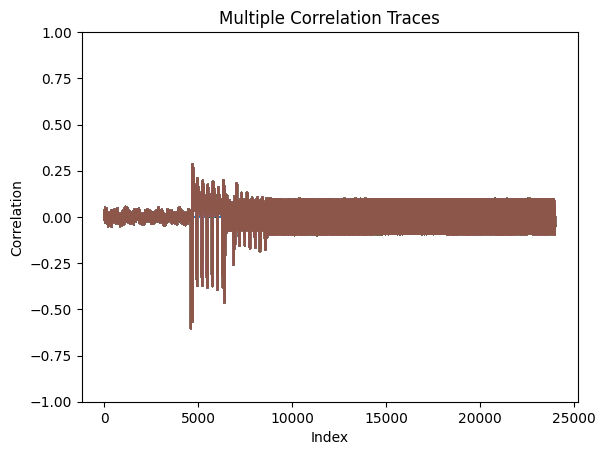

✔️ Scope disconnected.
✔️ Firmware disconnected.


In [18]:
corr1, corr2, corr3, rand_input, waves, out = capture_correlate(scope, epochs_list = [3000], ncorr_all1 = None, ncorr_all2 = None, decimate = 1, reverse = False, runName="_722_BasicMLP-NO_OPT")

##### Additional  analysis

(-1.0, 1.0)

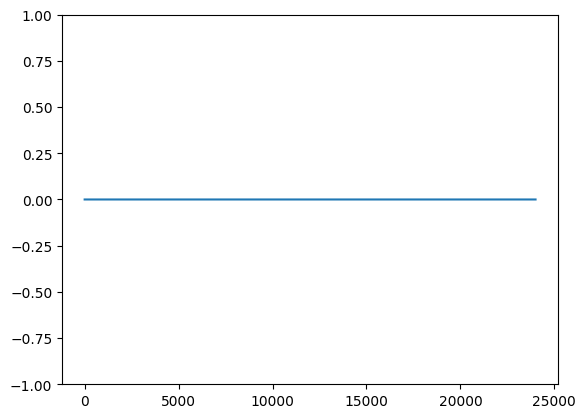

In [27]:
plt.plot(np.subtract(abs(np.array(corr1)[10,:]), abs(np.array(corr1)[20,:])))
plt.ylim(-1,1)

(-1.0, 1.0)

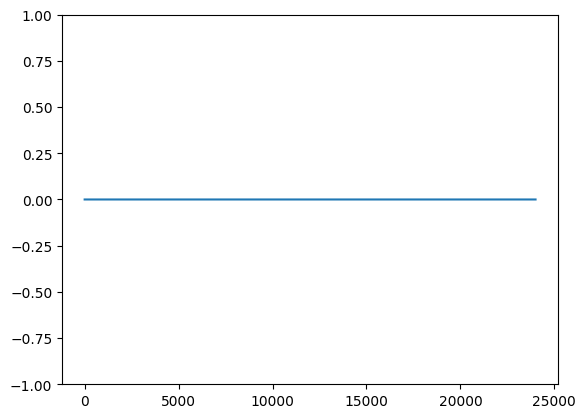

In [25]:
plt.plot(np.subtract(abs(np.array(corr1)[5,:]), abs(np.array(corr1)[10,:])))
plt.ylim(-1,1)

(-1.0, 1.0)

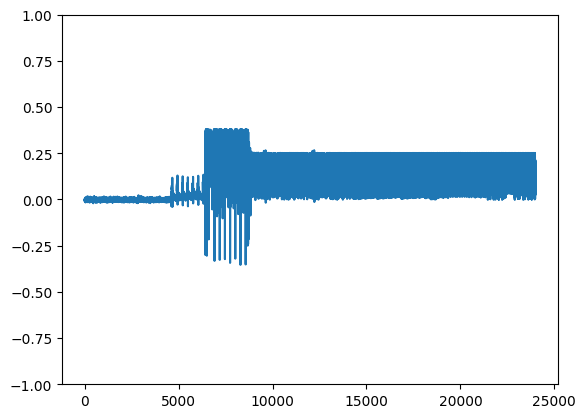

In [30]:
plt.plot(np.subtract(abs(np.array(corr2)[10,:]), abs(np.array(corr2)[20,:])))
plt.ylim(-1,1)

(-1.0, 1.0)

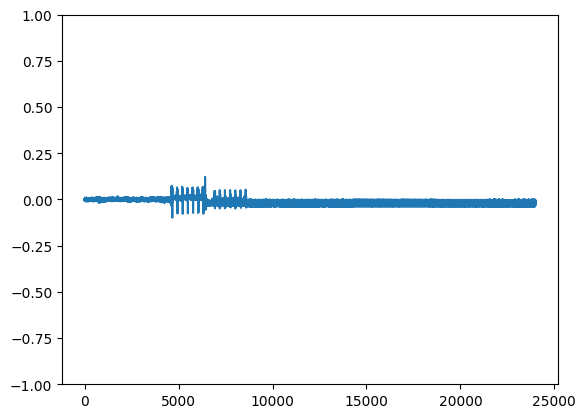

In [29]:
plt.plot(np.subtract(abs(np.array(corr2)[5,:]), abs(np.array(corr2)[10,:])))
plt.ylim(-1,1)

(-1.0, 1.0)

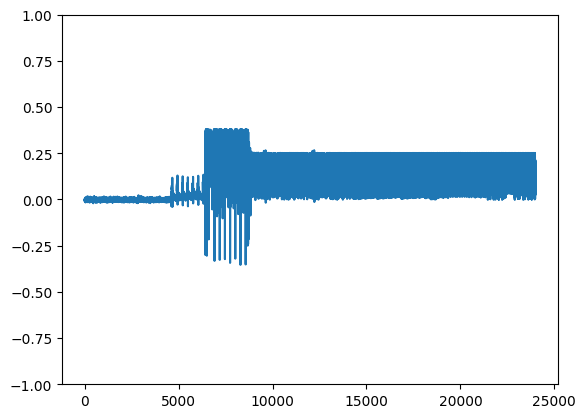

In [31]:
plt.plot(np.subtract(abs(np.array(corr3)[10,:]), abs(np.array(corr3)[20,:])))
plt.ylim(-1,1)

(-1.0, 1.0)

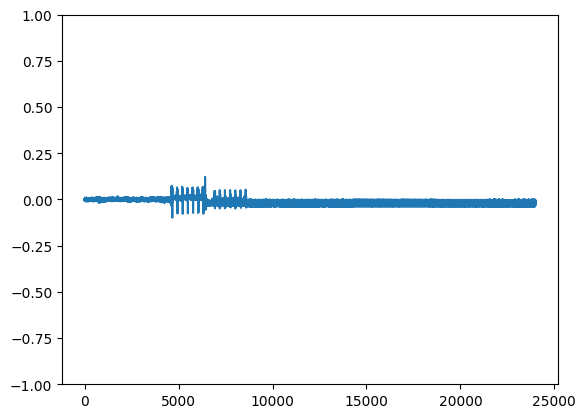

In [28]:
plt.plot(np.subtract(abs(np.array(corr3)[5,:]), abs(np.array(corr3)[10,:])))
plt.ylim(-1,1)

10304
 Index of global max: 4649 and global_max_val: 0.9708109151514981


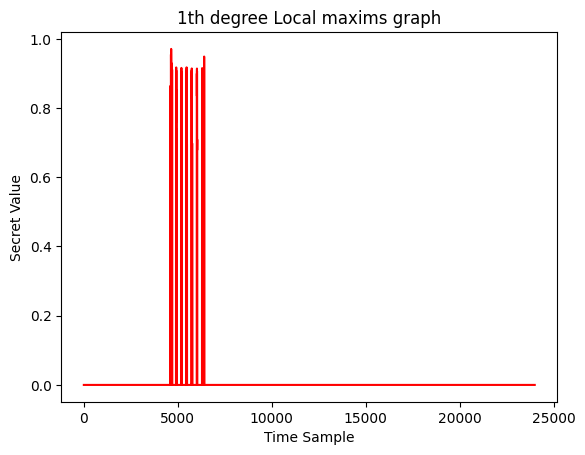

Number of uniques: 2
Number of local maxims: 115
Uniquess: [1, 5]
Local maxims: [1, 1, 1, 1, 5, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


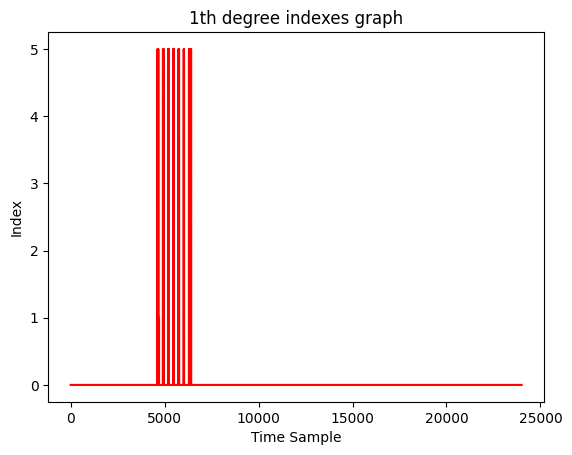

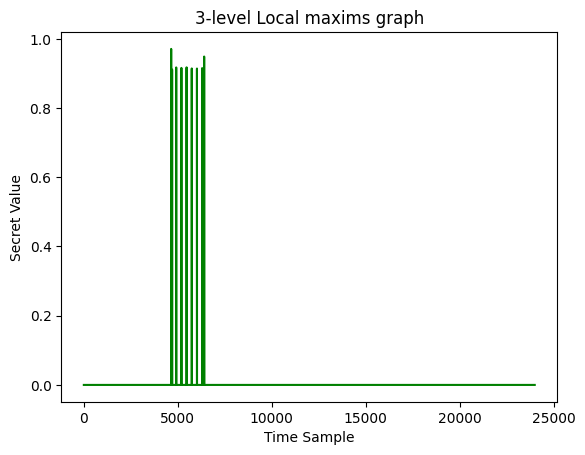

Number of uniques: 2
Number of local maxims: 9
Uniquess: [5, 1]
Local maxims: [5, 1, 5, 5, 5, 5, 5, 5, 5]


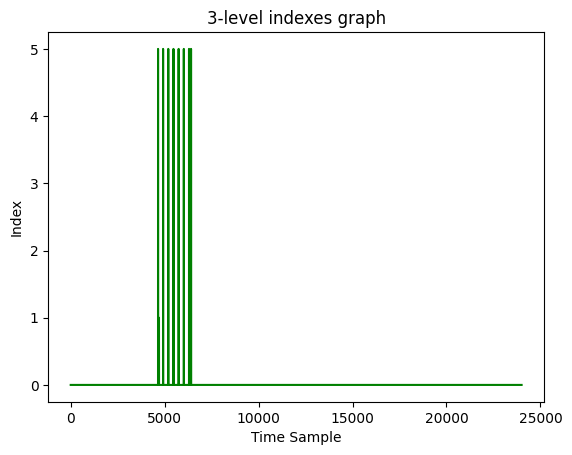

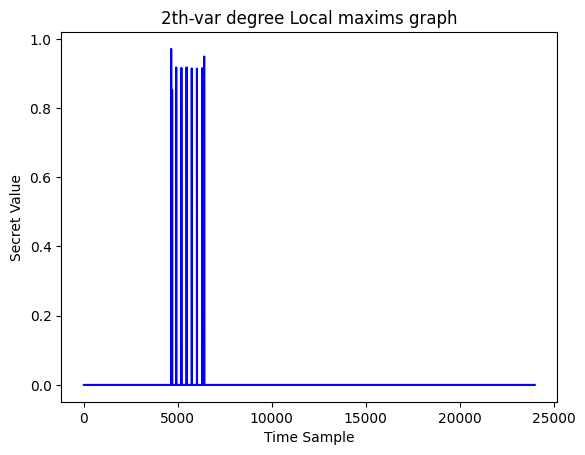

Number of uniques: 2
Number of local maxims: 9
Uniquess: [5, 1]
Local maxims: [5, 1, 5, 5, 5, 5, 5, 5, 5]


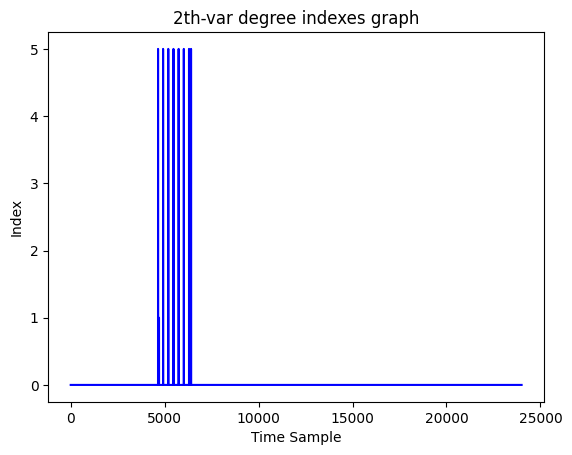

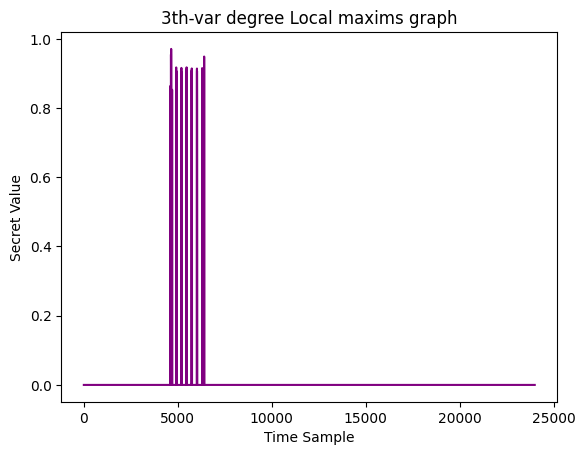

Number of uniques: 2
Number of local maxims: 73
Uniquess: [1, 5]
Local maxims: [1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


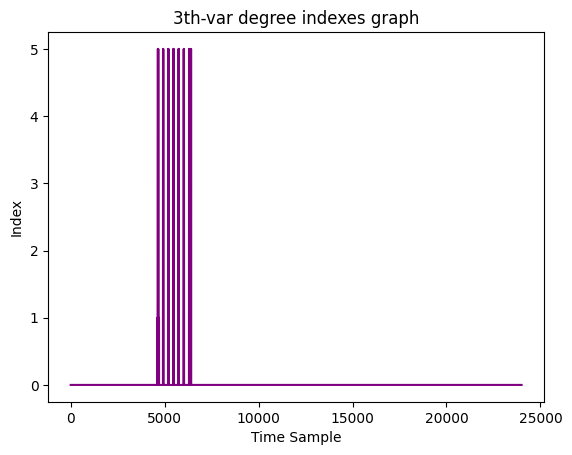

In range 0 - 24000
 Found the soonest secret value is 5, at the time sample 4649, with correlation secret_corr = 0.971


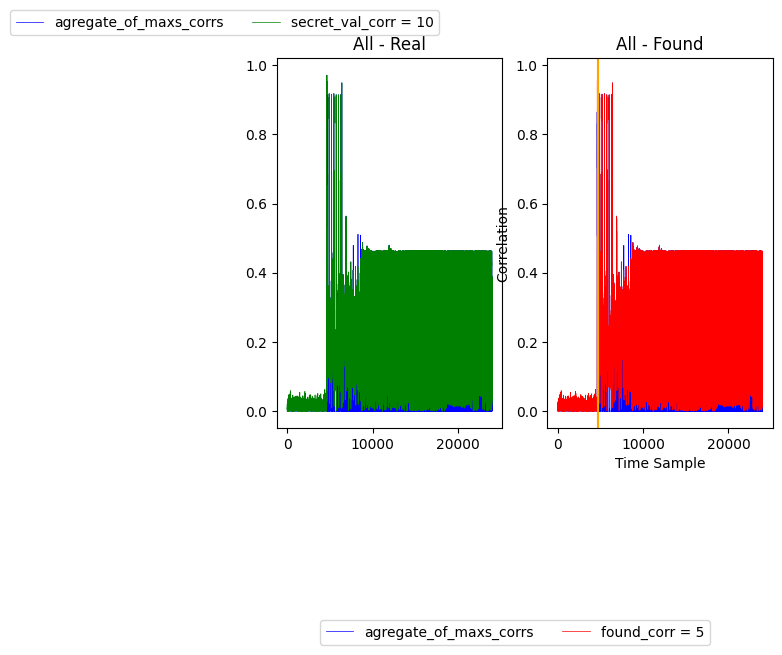

In range 4674 - 24000
 Found the soonest secret value is 1, at the time sample 4699, with correlation secret_corr = 0.853


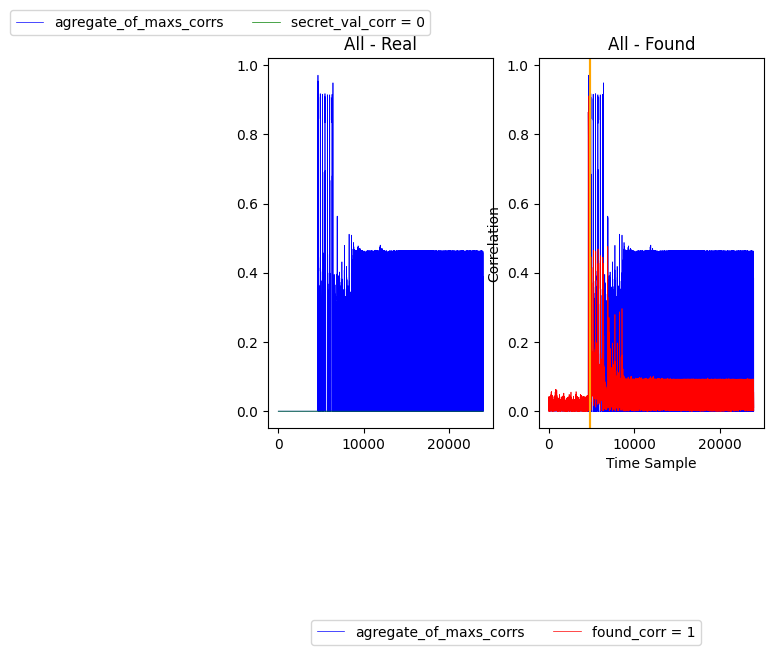

In range 4808 - 24000
 Found the soonest secret value is 5, at the time sample 4917, with correlation secret_corr = 0.917


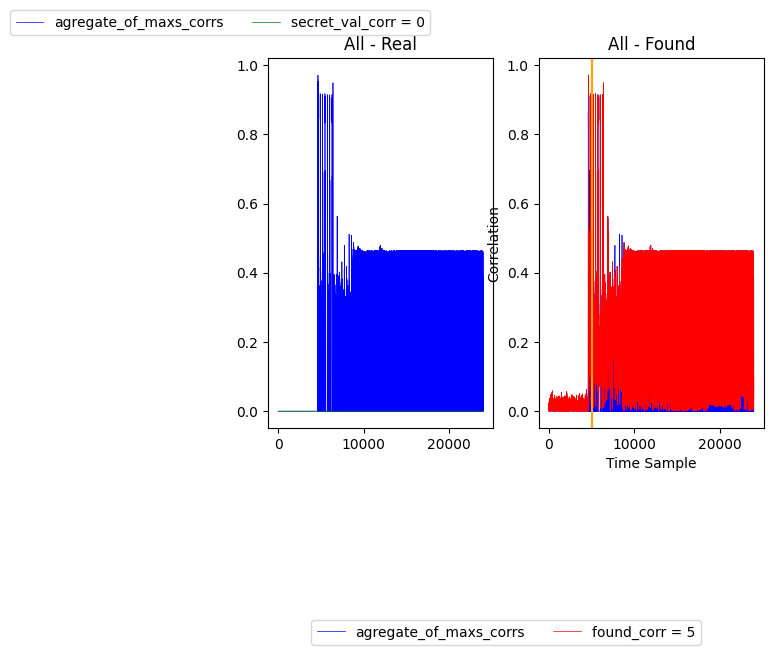

In range 5055 - 24000
 Found the soonest secret value is 5, at the time sample 5193, with correlation secret_corr = 0.916


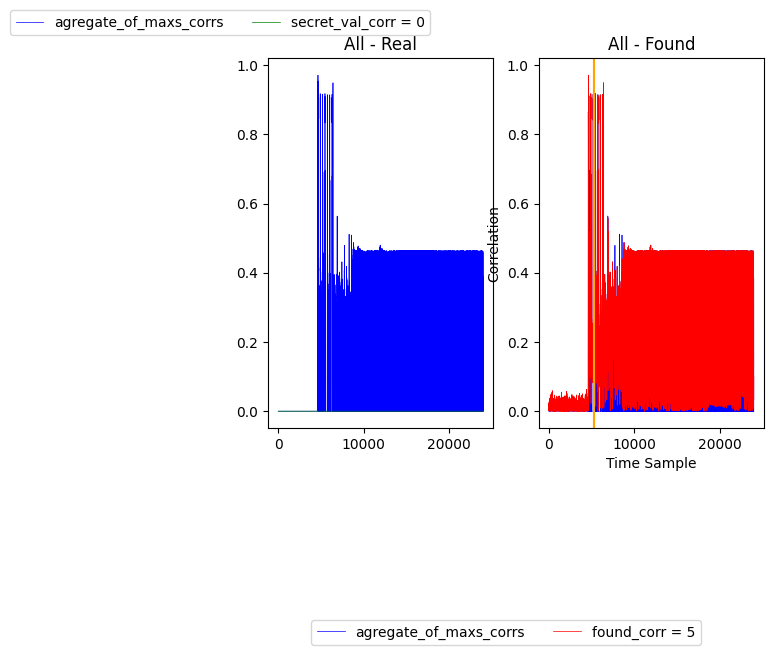

In range 5331 - 24000
 Found the soonest secret value is 5, at the time sample 5469, with correlation secret_corr = 0.918


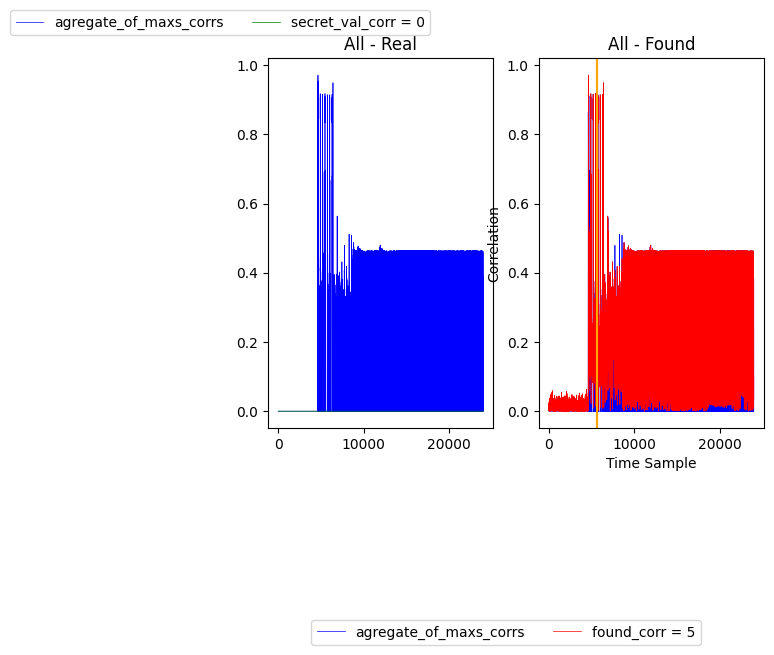

In [21]:
corr_map = abs(np.array(corr1)[:,:])
analyse_corr(corr_map=corr_map, weights=np.array(out)[3:-4], stop_num = 5, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3)

11663
 Index of global max: 4641 and global_max_val: 0.914901826925481


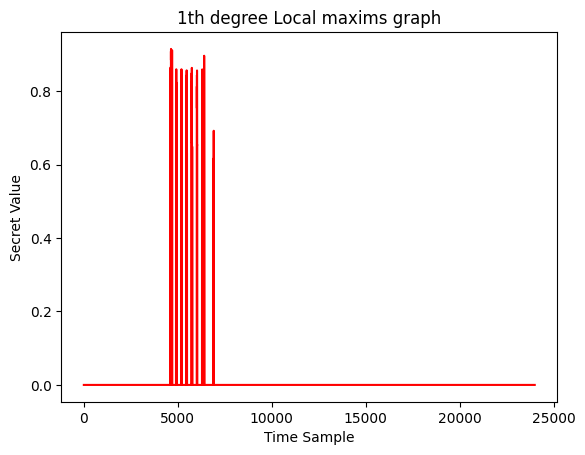

Number of uniques: 4
Number of local maxims: 126
Uniquess: [255, 1, 5, 20]
Local maxims: [255, 255, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 20, 20]


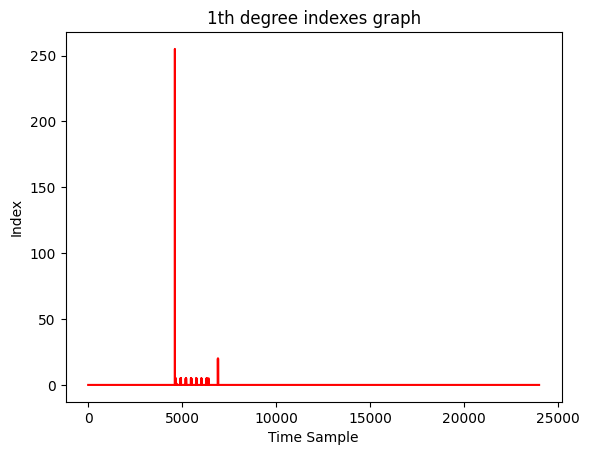

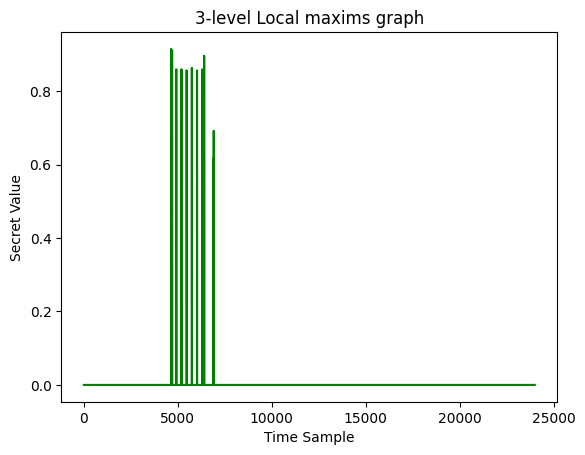

Number of uniques: 3
Number of local maxims: 11
Uniquess: [5, 1, 20]
Local maxims: [5, 1, 5, 5, 5, 5, 5, 5, 5, 20, 20]


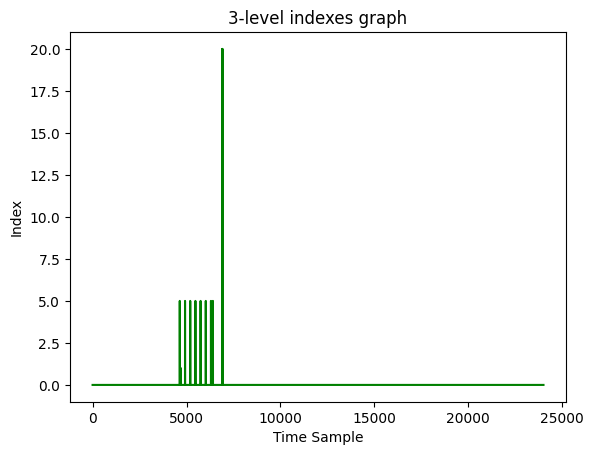

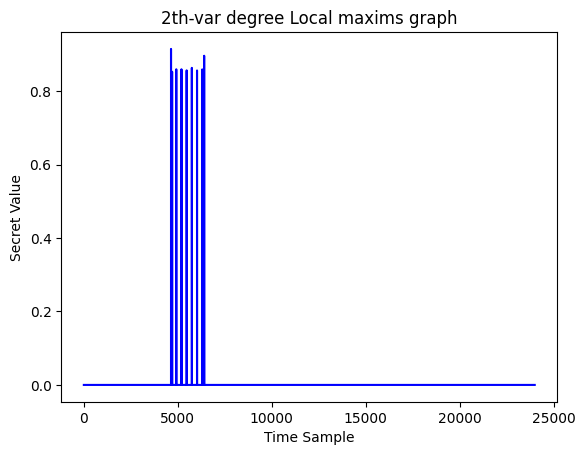

Number of uniques: 2
Number of local maxims: 9
Uniquess: [5, 1]
Local maxims: [5, 1, 5, 5, 5, 5, 5, 5, 5]


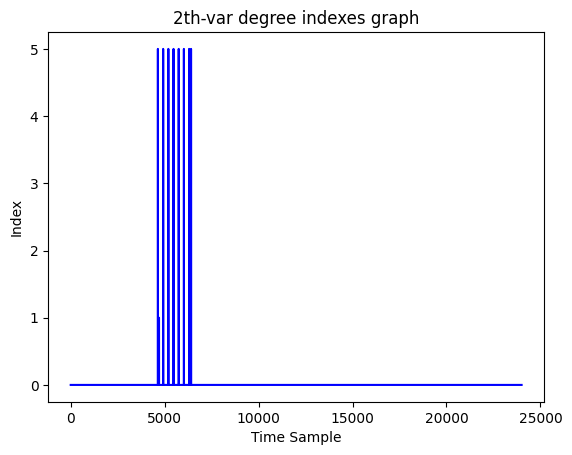

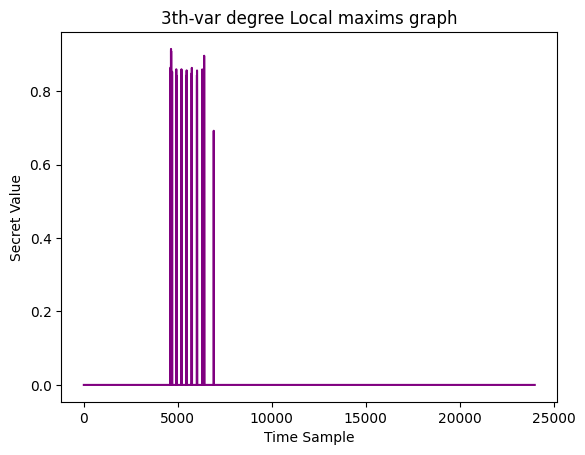

Number of uniques: 4
Number of local maxims: 76
Uniquess: [255, 1, 5, 20]
Local maxims: [255, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 20]


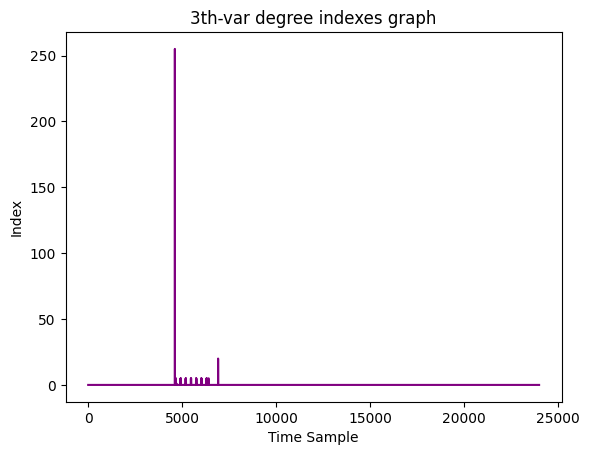

In range 0 - 24000
 Found the soonest secret value is 5, at the time sample 4641, with correlation secret_corr = 0.915


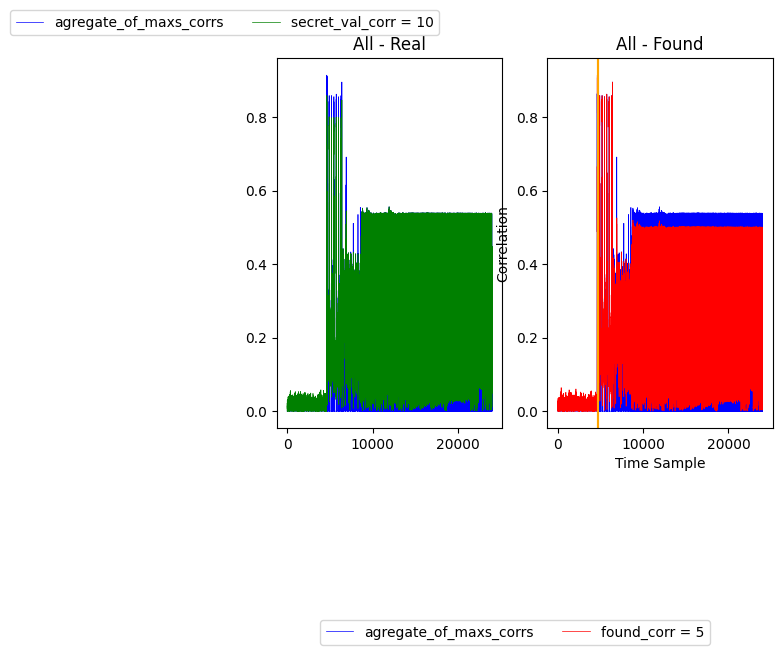

In range 4670 - 24000
 Found the soonest secret value is 1, at the time sample 4699, with correlation secret_corr = 0.853


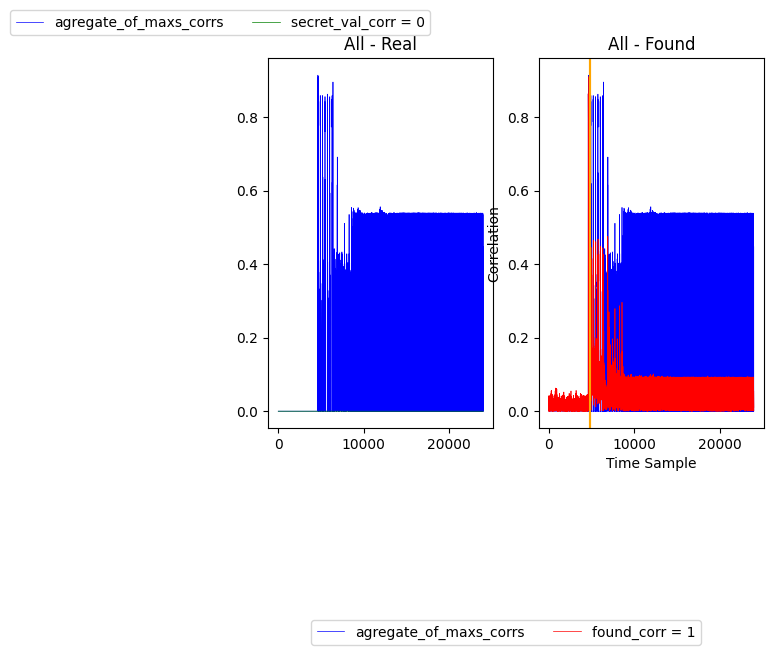

In range 4810 - 24000
 Found the soonest secret value is 5, at the time sample 4921, with correlation secret_corr = 0.859


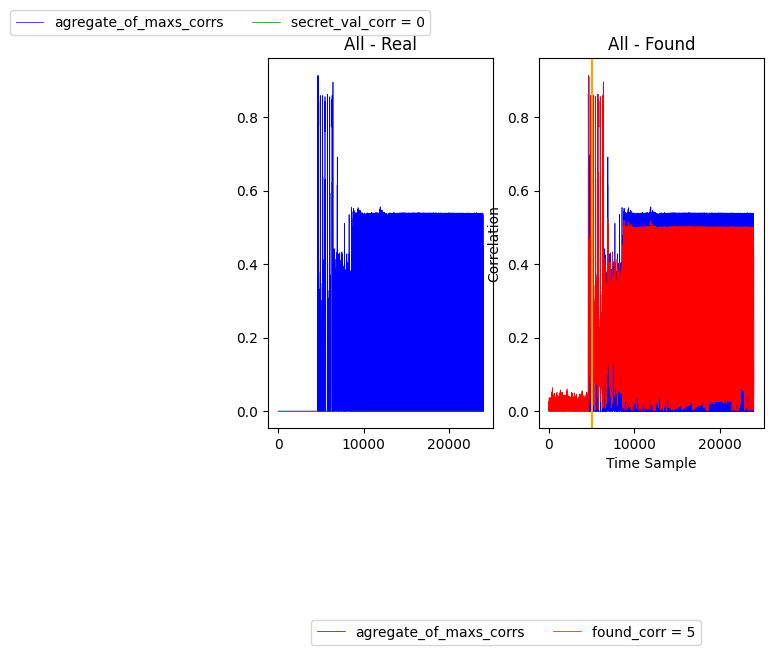

In range 5059 - 24000
 Found the soonest secret value is 5, at the time sample 5197, with correlation secret_corr = 0.859


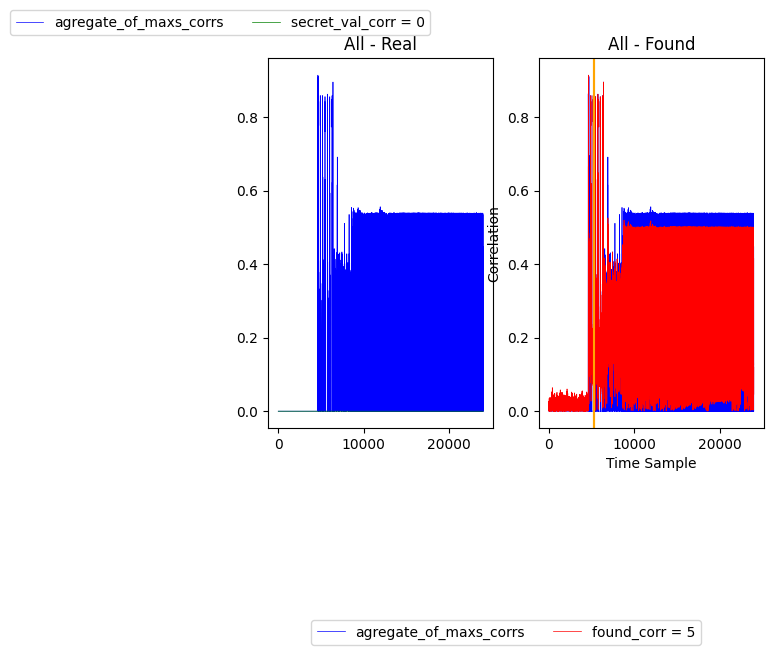

In range 5335 - 24000
 Found the soonest secret value is 5, at the time sample 5473, with correlation secret_corr = 0.857


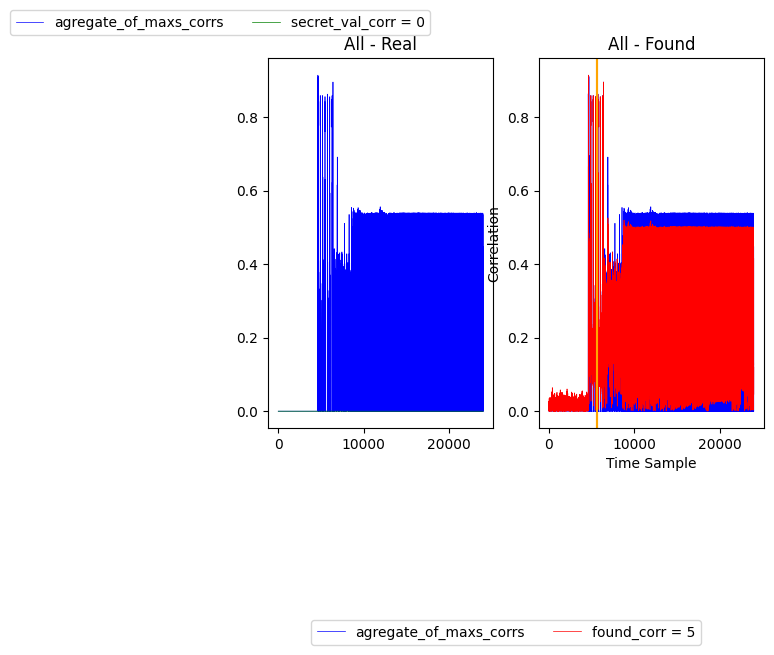

In [20]:
corr_map = abs(np.array(corr2)[:,:])
analyse_corr(corr_map=corr_map, weights=np.array(out)[3:-4], stop_num = 5, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3)

11663
 Index of global max: 4641 and global_max_val: 0.914901826925481


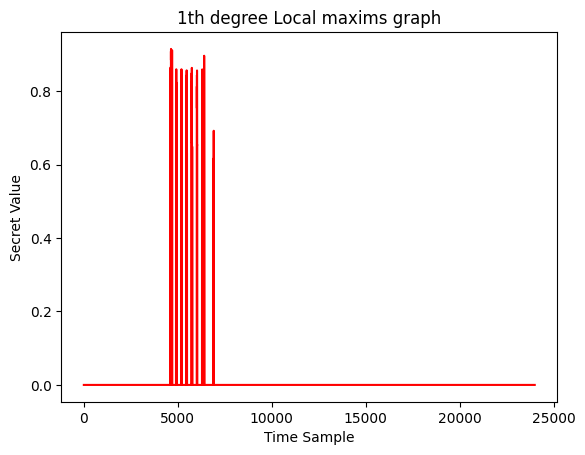

Number of uniques: 4
Number of local maxims: 126
Uniquess: [255, 1, 5, 20]
Local maxims: [255, 255, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 20, 20]


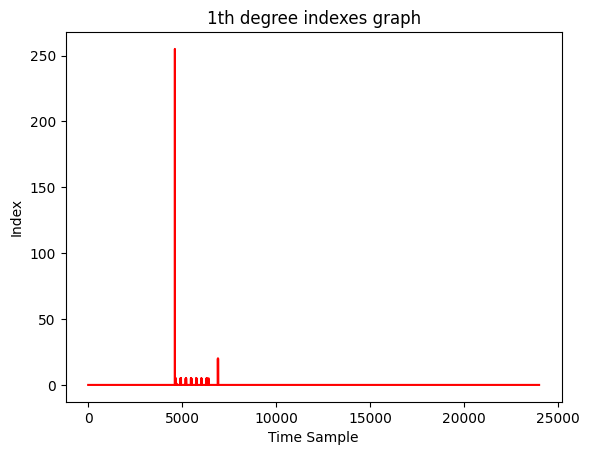

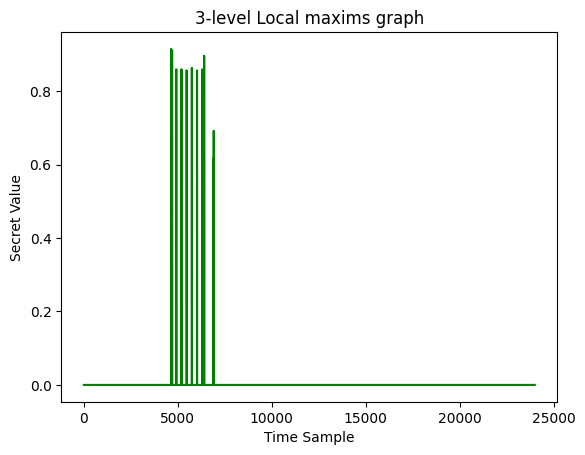

Number of uniques: 3
Number of local maxims: 11
Uniquess: [5, 1, 20]
Local maxims: [5, 1, 5, 5, 5, 5, 5, 5, 5, 20, 20]


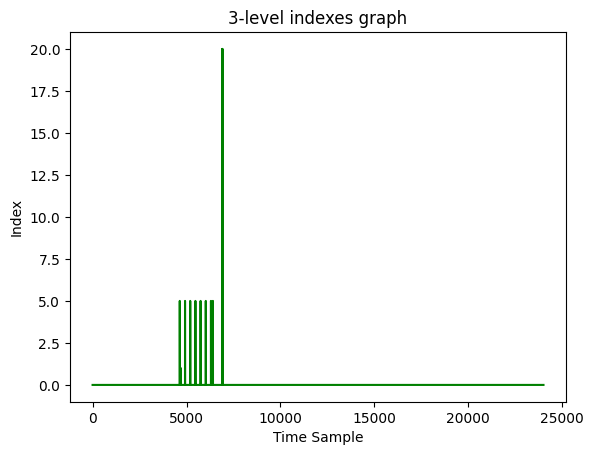

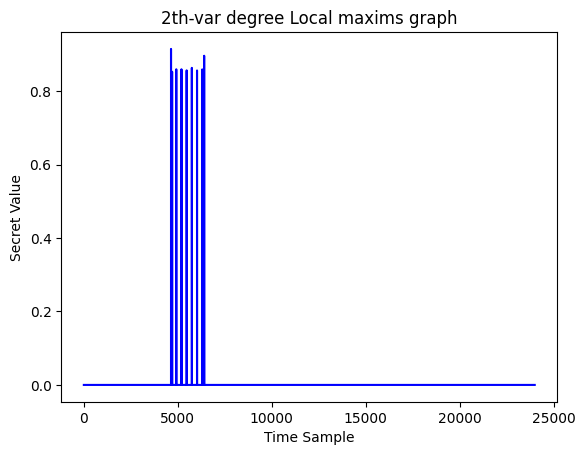

Number of uniques: 2
Number of local maxims: 9
Uniquess: [5, 1]
Local maxims: [5, 1, 5, 5, 5, 5, 5, 5, 5]


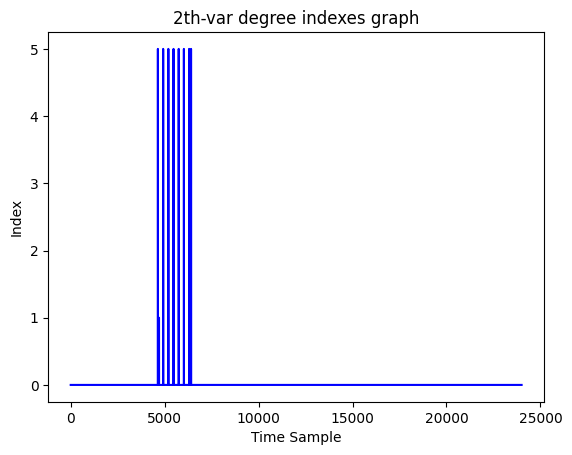

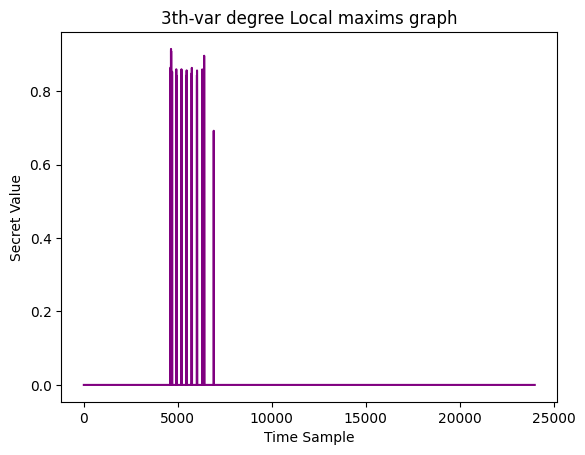

Number of uniques: 4
Number of local maxims: 76
Uniquess: [255, 1, 5, 20]
Local maxims: [255, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 20]


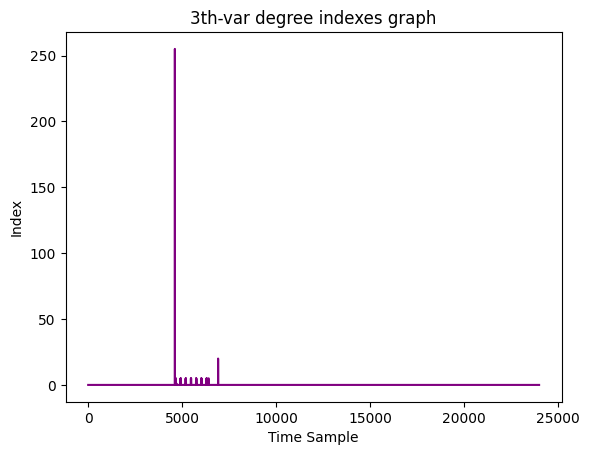

In range 0 - 24000
 Found the soonest secret value is 5, at the time sample 4641, with correlation secret_corr = 0.915


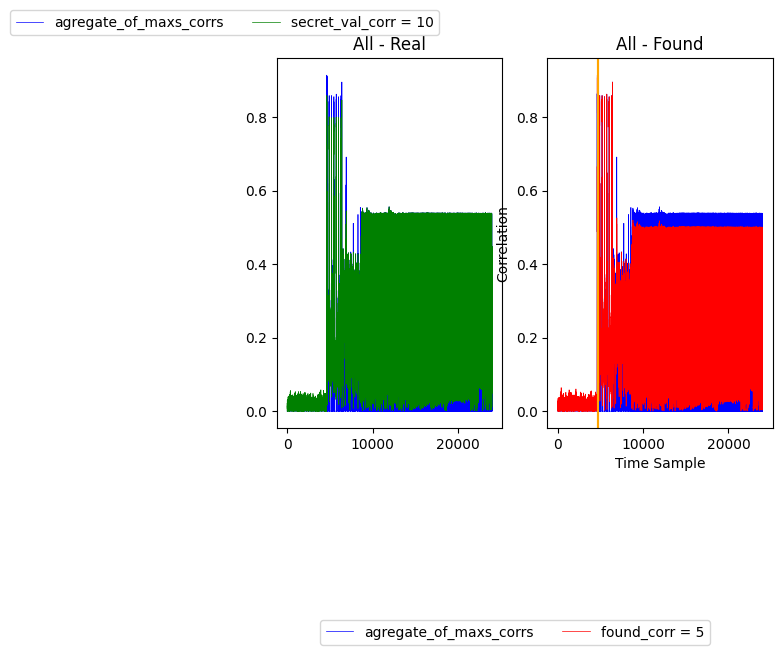

In range 4670 - 24000
 Found the soonest secret value is 1, at the time sample 4699, with correlation secret_corr = 0.853


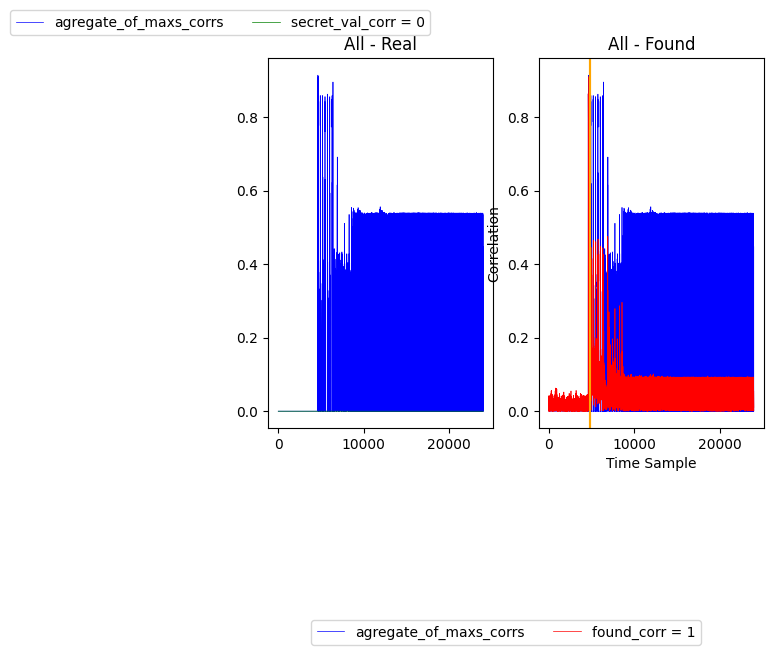

In range 4810 - 24000
 Found the soonest secret value is 5, at the time sample 4921, with correlation secret_corr = 0.859


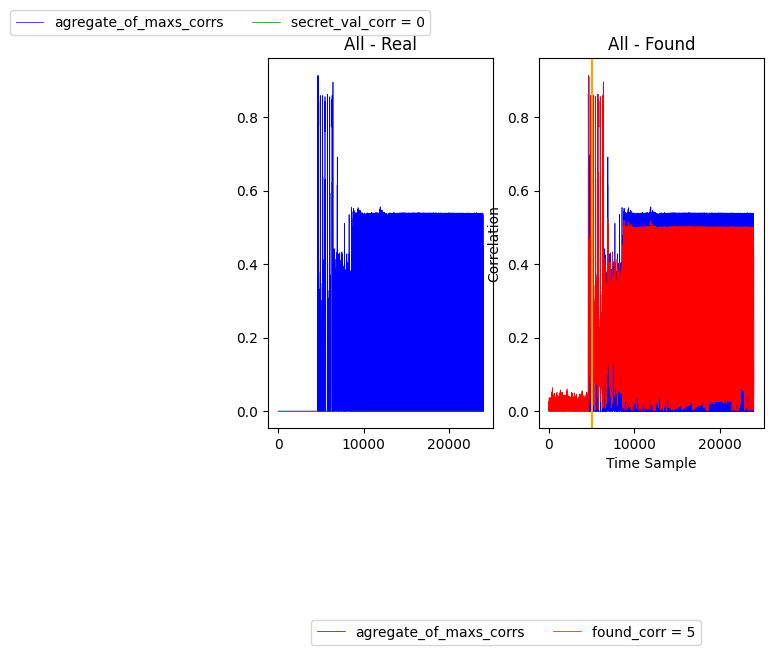

In range 5059 - 24000
 Found the soonest secret value is 5, at the time sample 5197, with correlation secret_corr = 0.859


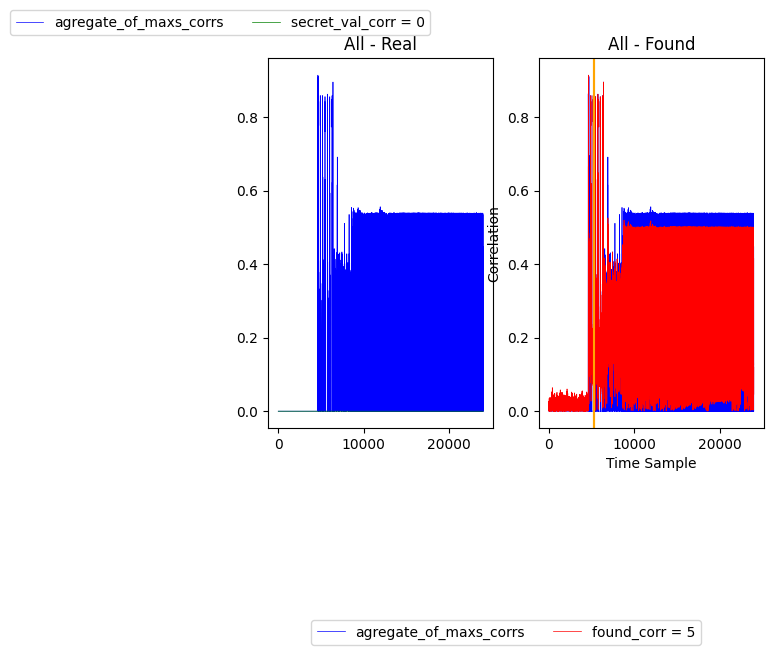

In range 5335 - 24000
 Found the soonest secret value is 5, at the time sample 5473, with correlation secret_corr = 0.857


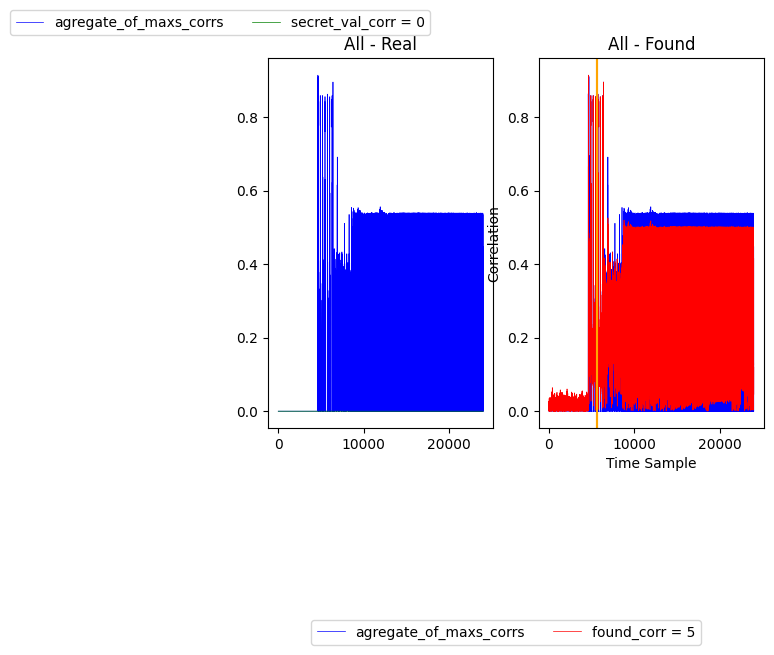

In [19]:
corr_map = abs(np.array(corr3)[:,:])
analyse_corr(corr_map=corr_map, weights=np.array(out)[3:-4], stop_num = 5, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3)

##### Additional  analysis Prev

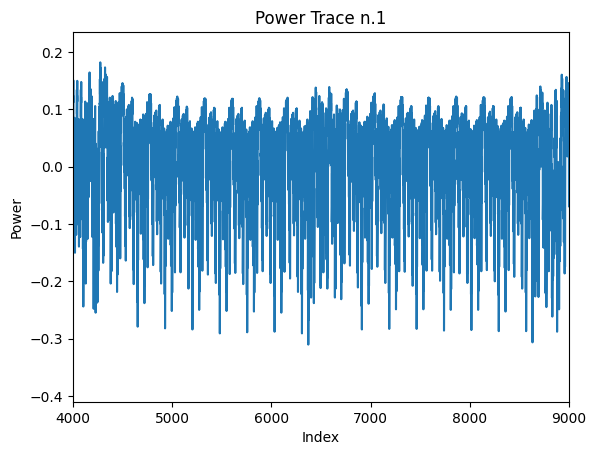

In [70]:
plot_mult(np.array(waves)[1,:], _type = "tmp", mult=False,  xlim=[4000,9000], graph_title="Power Trace n.1", ylabel="Power")

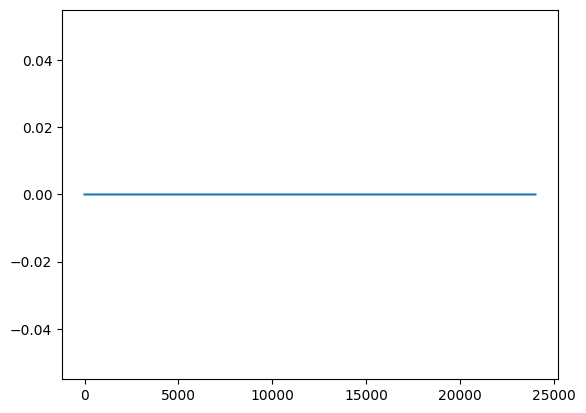

In [112]:
plt.plot(np.subtract(abs(np.array(corr1)[5,:]), abs(np.array(corr1)[10,:])))

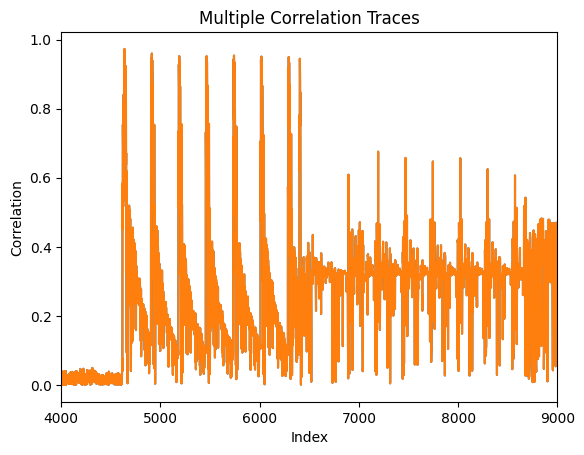

In [99]:
plot_mult(abs(np.array(corr1)[[5, 10],:]), _type = "tmp", mult=True, xlim=[4000,9000])

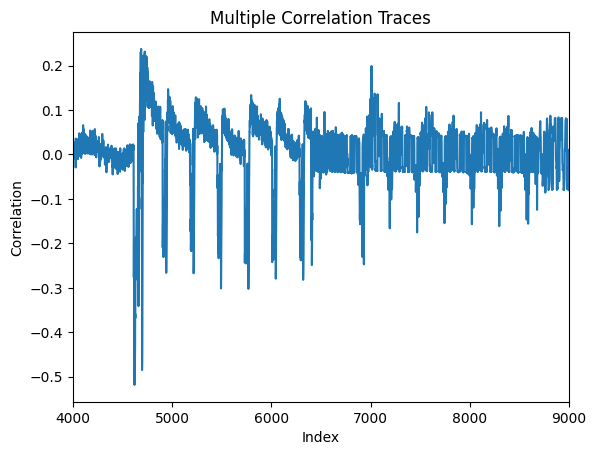

In [104]:
plot_mult(np.array(corr1)[3,:], _type = "tmp", mult=False, xlim=[4000,9000])

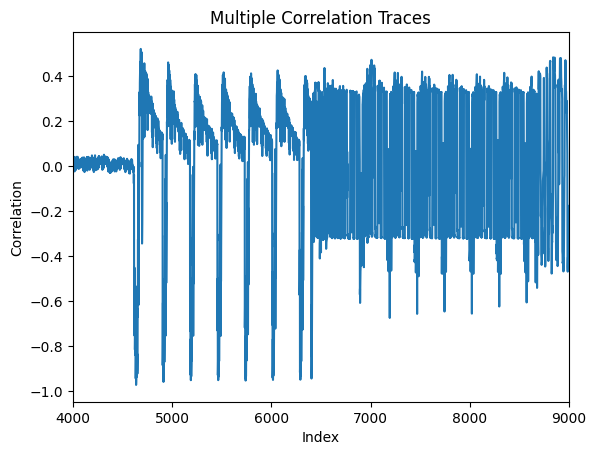

In [84]:
plot_mult(np.array(corr1)[5,:], _type = "tmp", mult=False, xlim=[4000,9000])

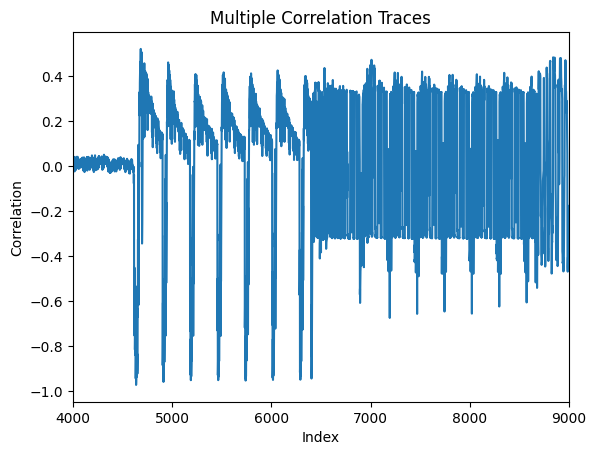

In [82]:
plot_mult(np.array(corr1)[10,:], _type = "tmp", mult=False, xlim=[4000,9000])

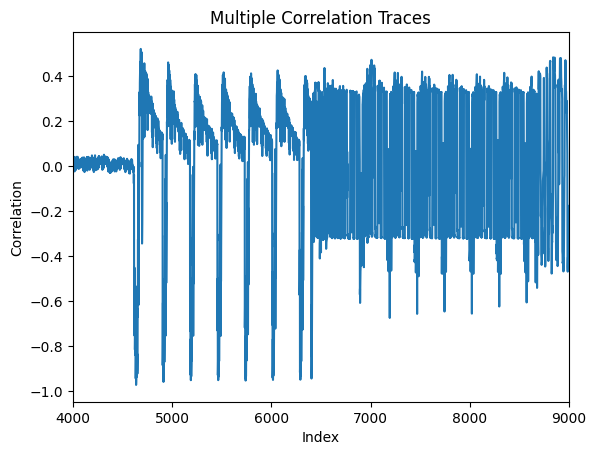

In [83]:
plot_mult(np.array(corr1)[20,:], _type = "tmp", mult=False, xlim=[4000,9000])

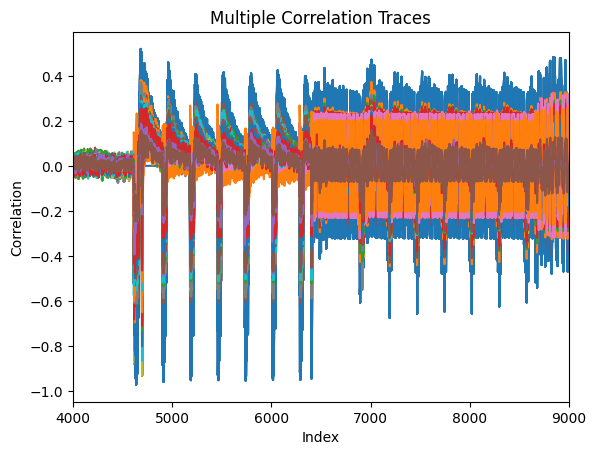

In [63]:
plot_mult(np.array(corr1)[:,:], _type = "tmp", mult=True, xlim=[4000,9000])

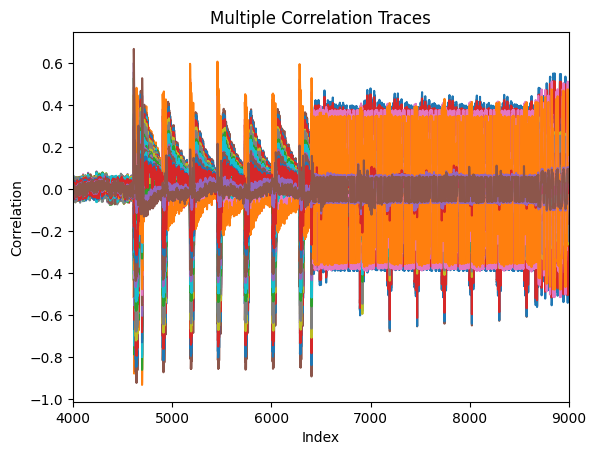

In [71]:
plot_mult(np.array(corr2)[:,:], _type = "tmp", mult=True, xlim=[4000,9000])

In [43]:
np.array(out)[3:-4]

array([ 10,   0,   0,   0,   0,   0,   0,   0,  20,   0,   0,   0,   0,
         0,   0,   0,  77, 210,  37,  85], dtype=uint8)

12488
 Index of global max: 4697 and global_max_val: 0.9324396229778797


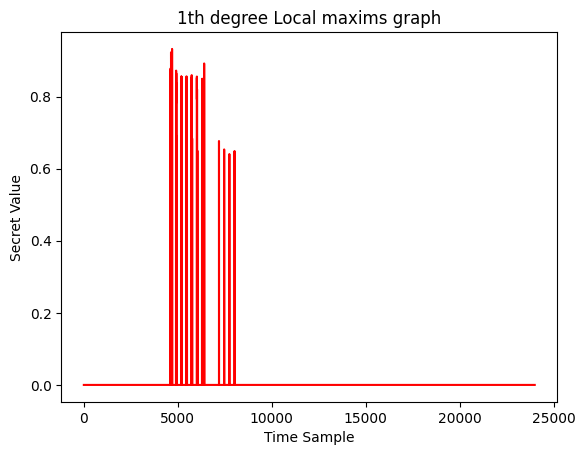

Number of uniques: 3
Number of local maxims: 124
Uniquess: [255, 1, 5]
Local maxims: [255, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


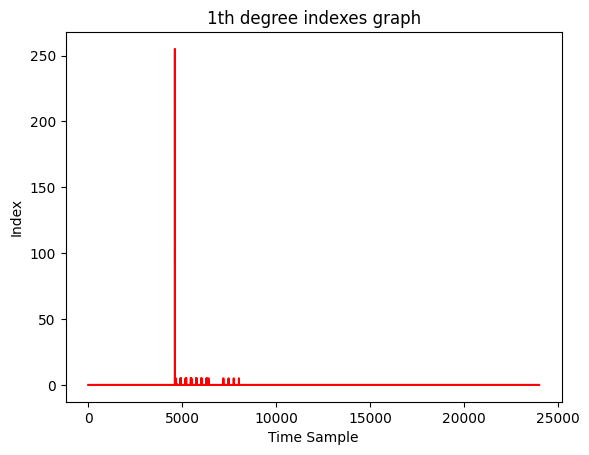

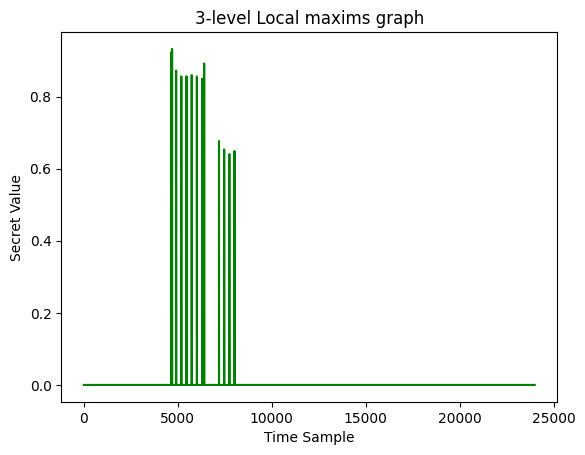

Number of uniques: 2
Number of local maxims: 13
Uniquess: [5, 1]
Local maxims: [5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


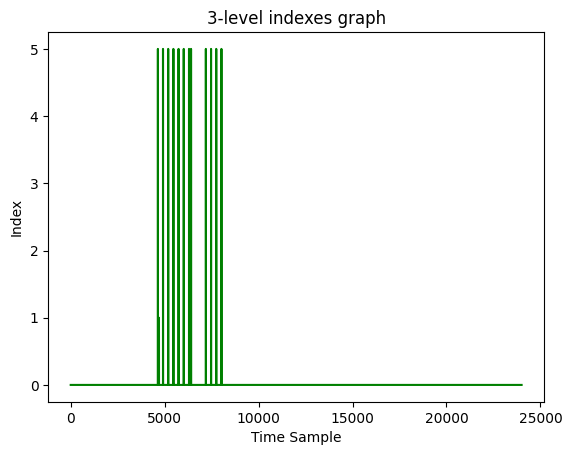

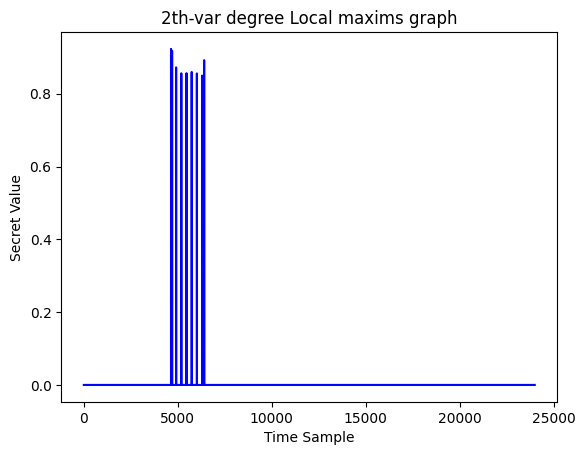

Number of uniques: 2
Number of local maxims: 9
Uniquess: [5, 1]
Local maxims: [5, 1, 5, 5, 5, 5, 5, 5, 5]


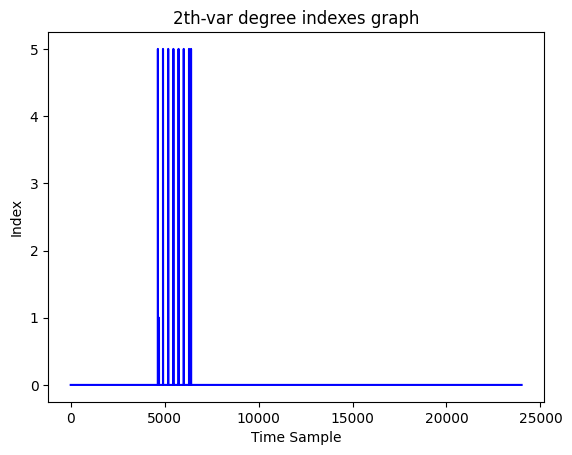

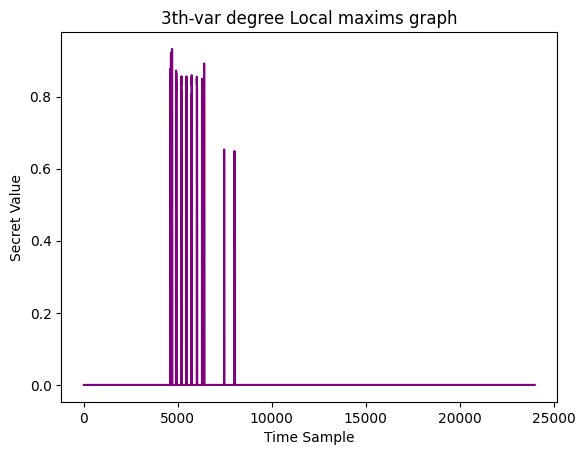

Number of uniques: 2
Number of local maxims: 84
Uniquess: [1, 5]
Local maxims: [1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


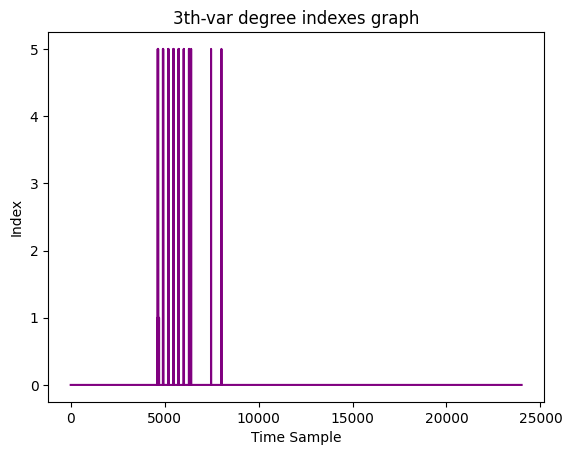

In range 0 - 24000
 Found the soonest secret value is 5, at the time sample 4641, with correlation secret_corr = 0.923


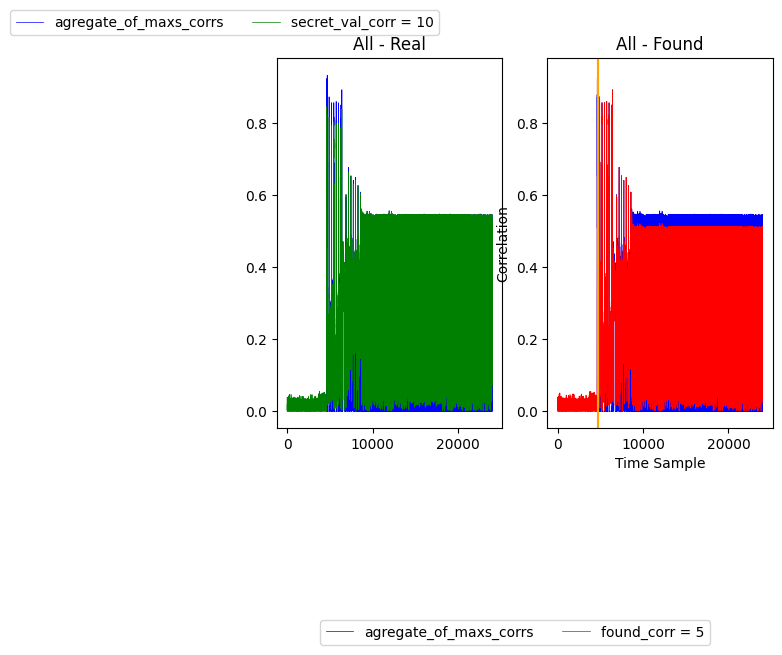

In range 4670 - 24000
 Found the soonest secret value is 1, at the time sample 4698, with correlation secret_corr = 0.918


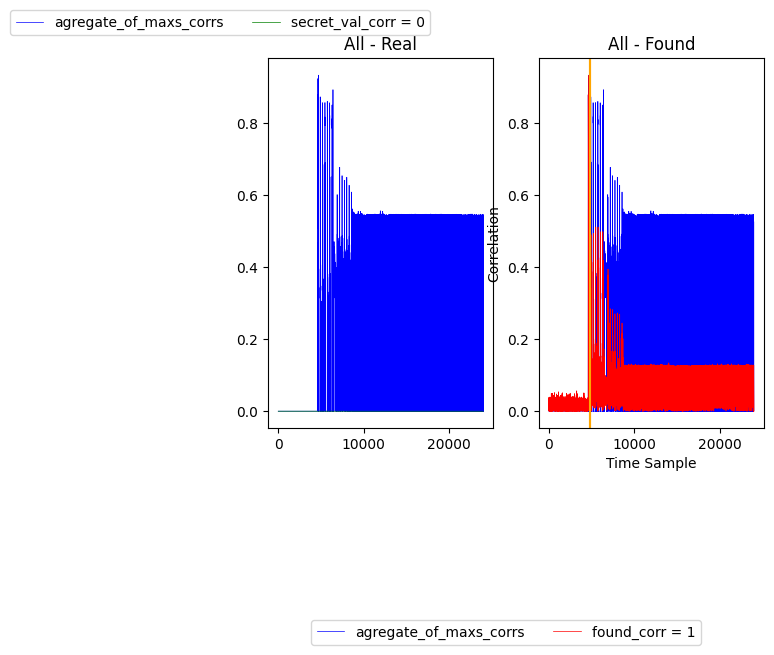

In range 4805 - 24000
 Found the soonest secret value is 5, at the time sample 4913, with correlation secret_corr = 0.872


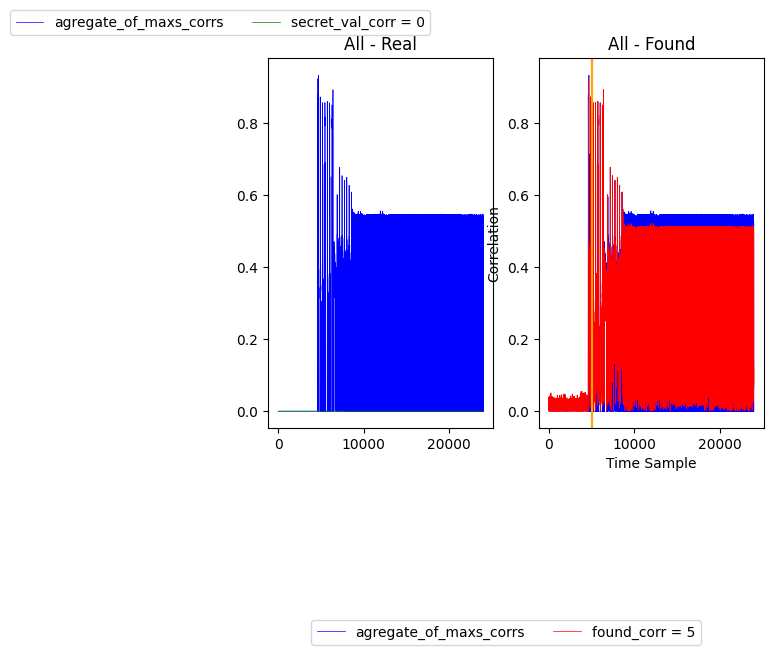

In range 5051 - 24000
 Found the soonest secret value is 5, at the time sample 5189, with correlation secret_corr = 0.856


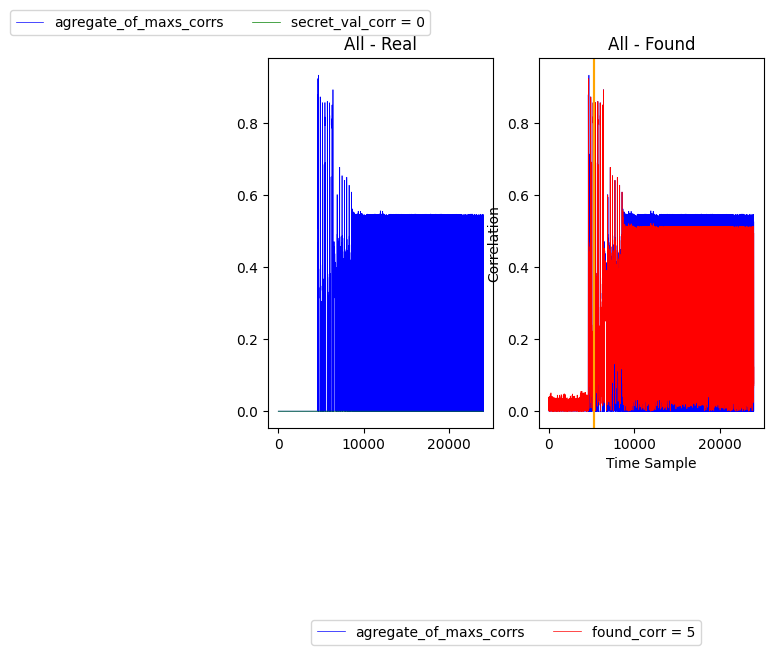

In range 5327 - 24000
 Found the soonest secret value is 5, at the time sample 5465, with correlation secret_corr = 0.856


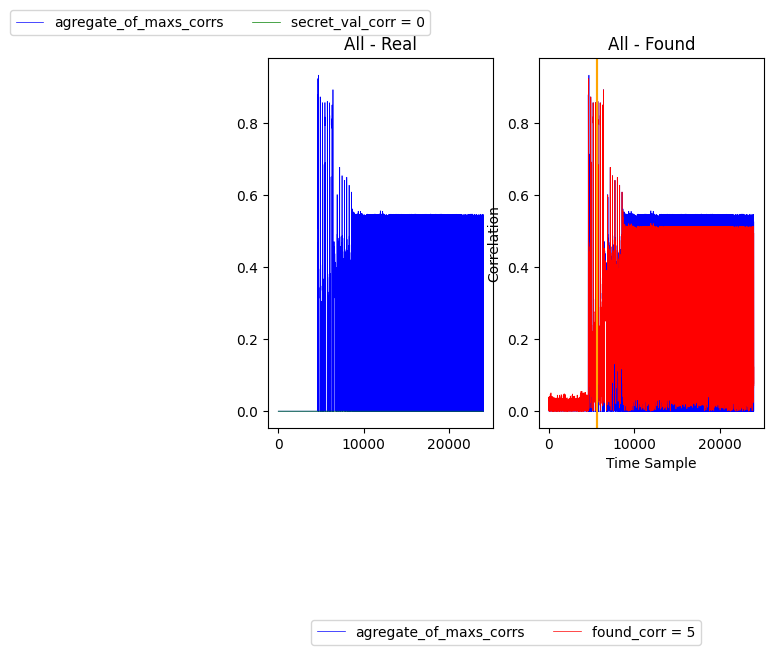

In [72]:
corr_map = abs(np.array(corr2)[:,:])
analyse_corr(corr_map=corr_map, weights=np.array(out)[3:-4], stop_num = 5, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3)

11517
 Index of global max: 4637 and global_max_val: 0.9730403116887656


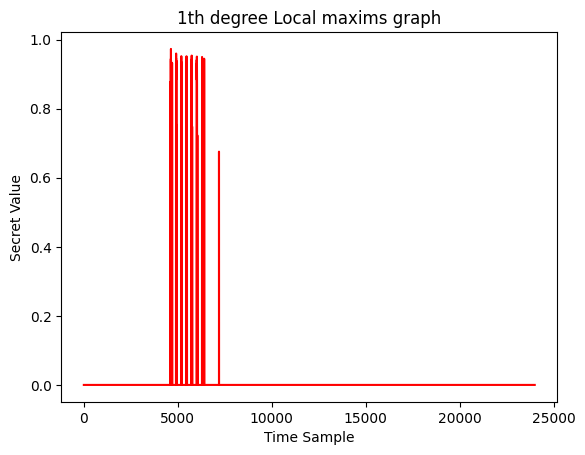

Number of uniques: 3
Number of local maxims: 126
Uniquess: [1, 5, 133]
Local maxims: [1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 133, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


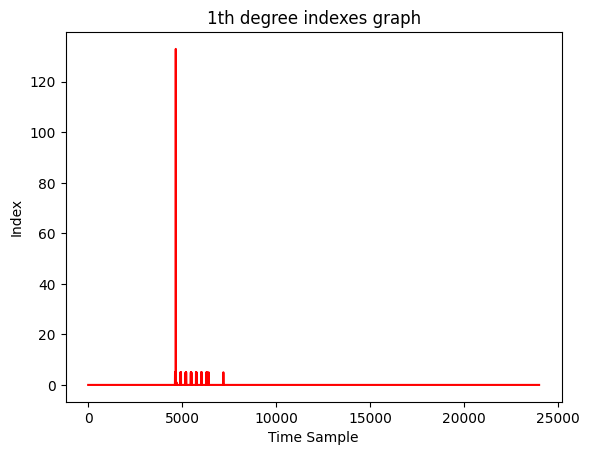

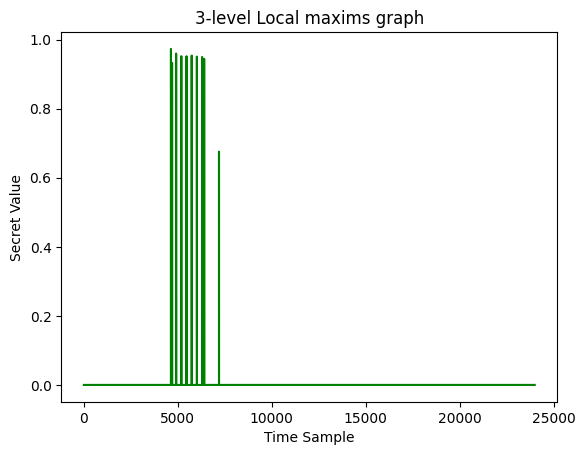

Number of uniques: 2
Number of local maxims: 10
Uniquess: [5, 1]
Local maxims: [5, 1, 5, 5, 5, 5, 5, 5, 5, 5]


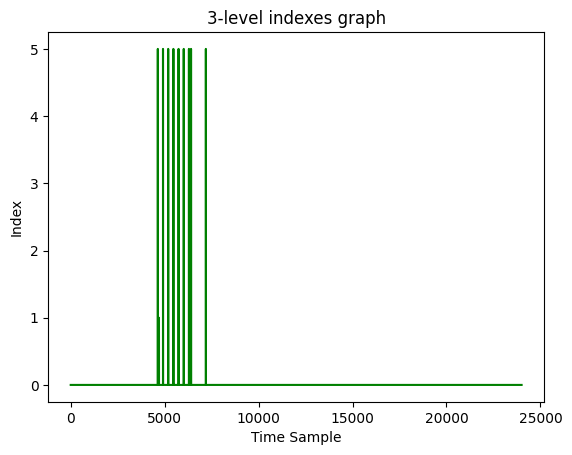

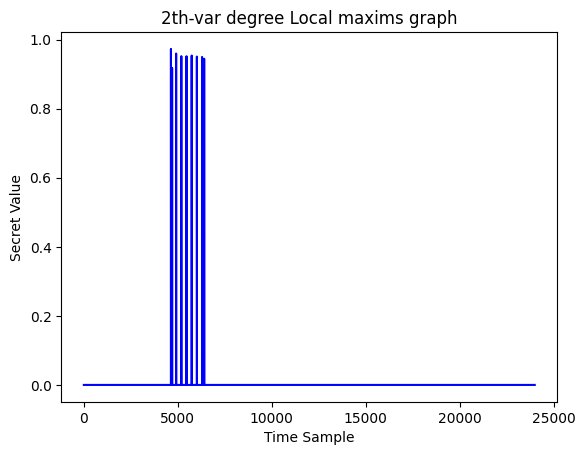

Number of uniques: 2
Number of local maxims: 9
Uniquess: [5, 1]
Local maxims: [5, 1, 5, 5, 5, 5, 5, 5, 5]


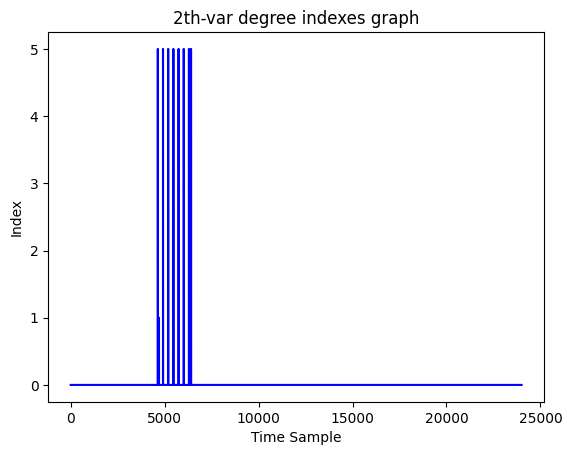

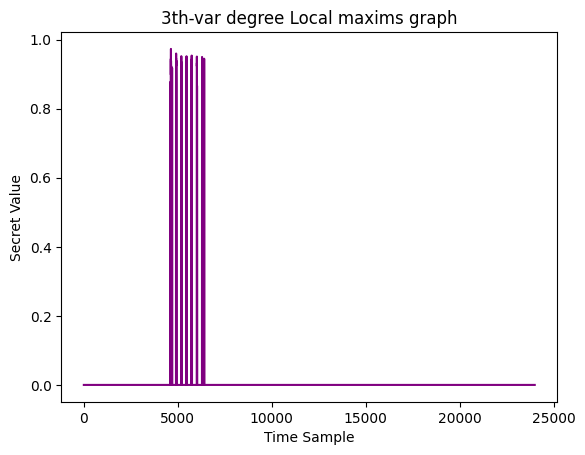

Number of uniques: 2
Number of local maxims: 86
Uniquess: [1, 5]
Local maxims: [1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


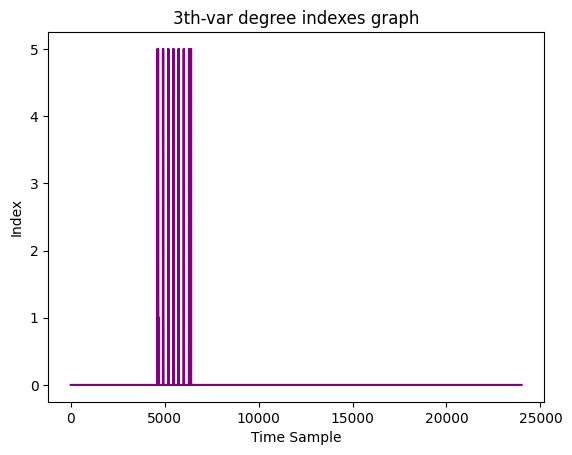

In range 0 - 24000
 Found the soonest secret value is 5, at the time sample 4637, with correlation secret_corr = 0.973


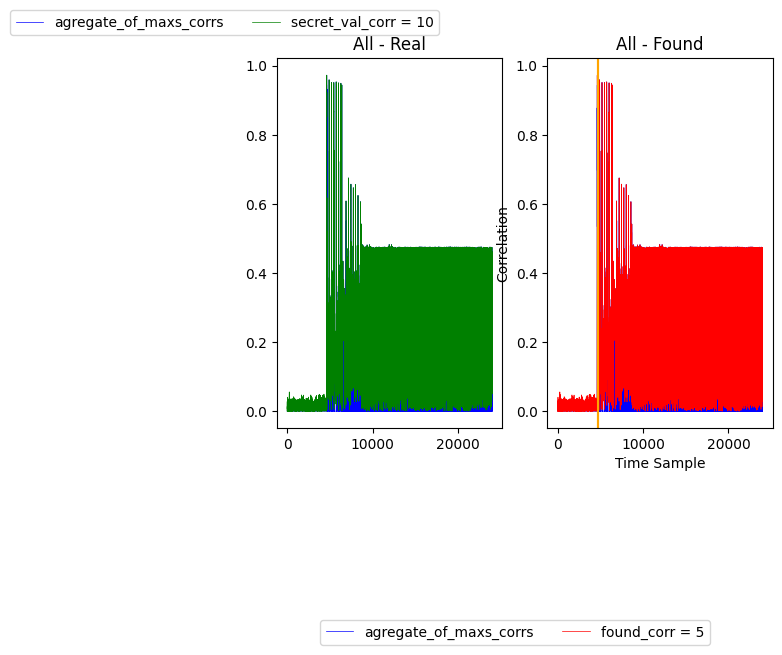

In range 4668 - 24000
 Found the soonest secret value is 1, at the time sample 4698, with correlation secret_corr = 0.918


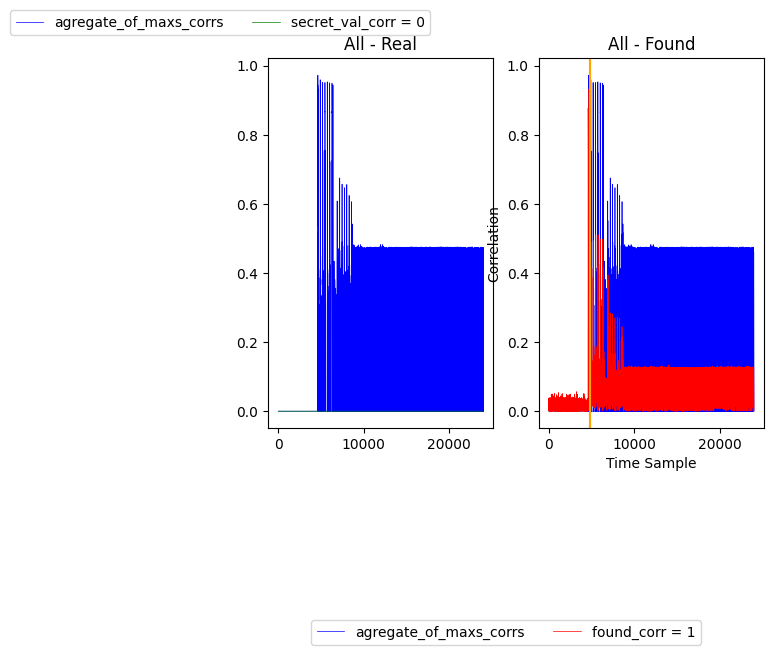

In range 4805 - 24000
 Found the soonest secret value is 5, at the time sample 4913, with correlation secret_corr = 0.960


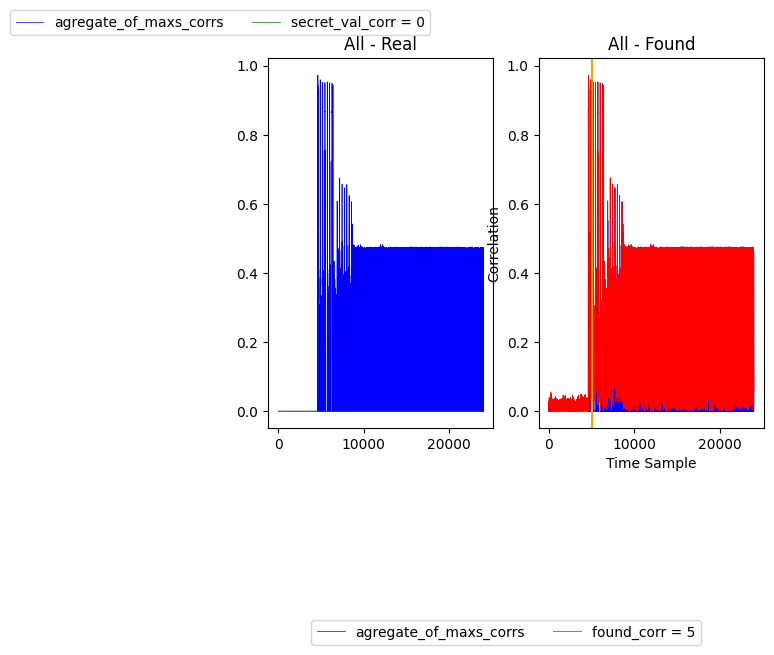

In range 5051 - 24000
 Found the soonest secret value is 5, at the time sample 5189, with correlation secret_corr = 0.952


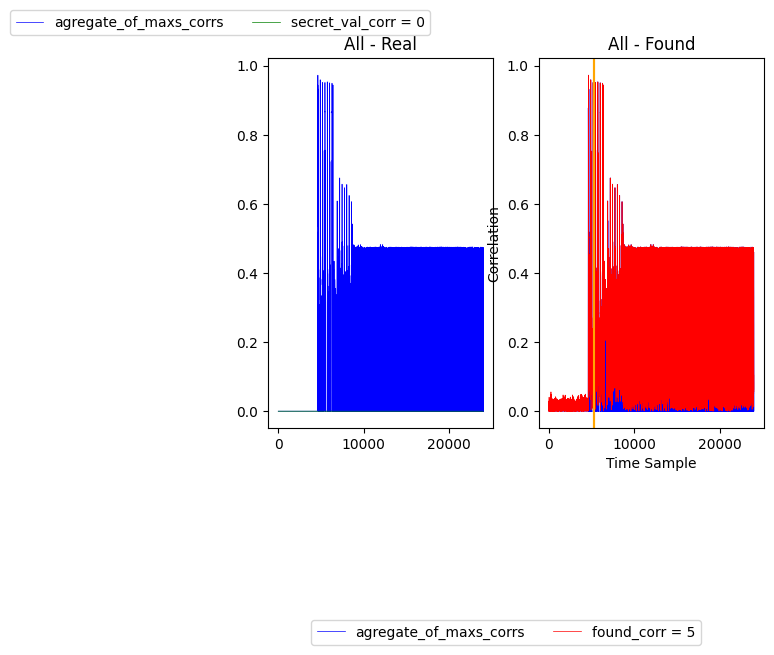

In range 5327 - 24000
 Found the soonest secret value is 5, at the time sample 5465, with correlation secret_corr = 0.952


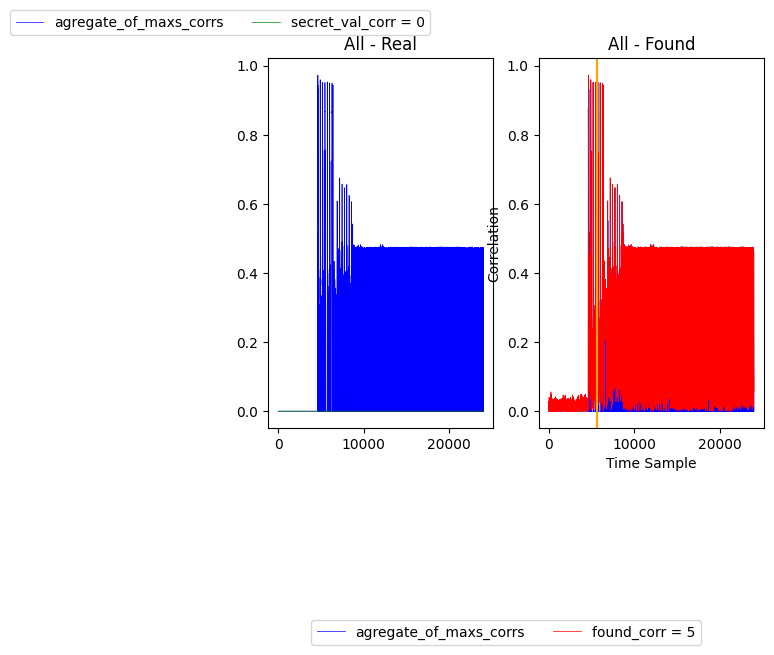

In [51]:
corr_map = abs(np.array(corr1)[:,:])
analyse_corr(corr_map=corr_map, weights=np.array(out)[3:-4], stop_num = 5, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3)

In [9]:
scope, target, cw_setuper = setup("makefile_dir_basic_quantized_MLP")
time.sleep(10)

⚠️ Changed, firmware config!!!
✔️ Firmware maked, with command cd %s | make CRYPTO_TARGET=%s PLATFORM=%s FIRMWAREPATH=%s SS_VER=%s TARGET=%s> output.txt 2>warnings_new.txt.
INFO: Found ChipWhisperer😍
✔️ INFO: Scope and Target, are set😍
❤️ Target hex: ./makefile_dir_basic_MLP/simpleserial-target-CWLITEARM.hex
Detected known STMF32: STM32F302xB(C)/303xB(C)
Extended erase (0x44), this can take ten seconds or more
Attempting to program 15963 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 15963 bytes
✔️ Setuper initiated.


Capturing and Analysing the traces::   0%|          | 0/1 [00:00<?, ?it/s]

⚠️ Generating rand_input..


                                Capturing traces:   0%|          | 0/3000 [00:00<?, ?it/s]

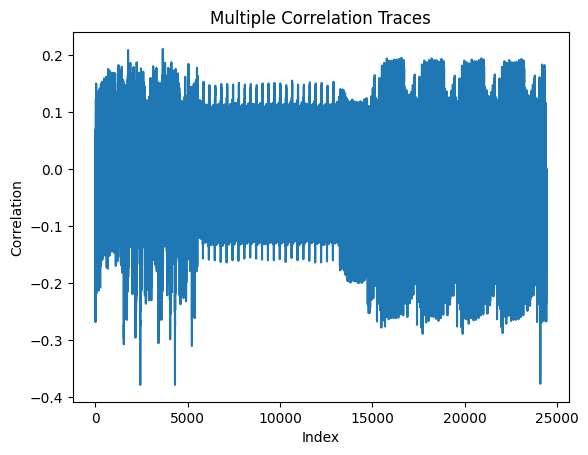

✔️ Saving Rand_input succesfull.
🌍 Saving Secret_weights succesfull.
CWbytearray(b'00 72 16 0a 00 00 00 00 00 00 00 14 00 00 00 00 00 00 00 05 00 00 00 5f 00 c8 00')


Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

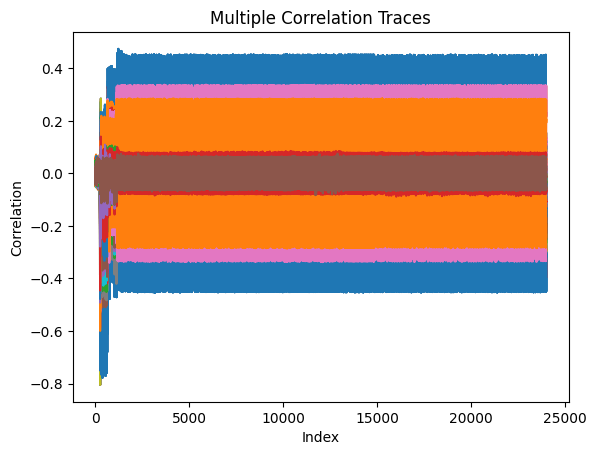

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

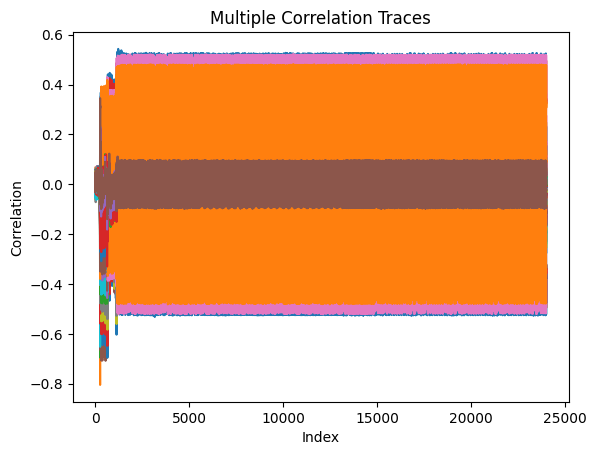

✔️ Scope disconnected.
✔️ Firmware disconnected.


In [14]:
corr1, corr2, rand_input, waves, out = capture_correlate(scope, epochs_list = [3000], ncorr_all1 = None, ncorr_all2 = None, decimate = 1, reverse = False, runName="_722_BasicMLP")

24000
 Index of global max: 249 and global_max_val: 0.8162345949846169


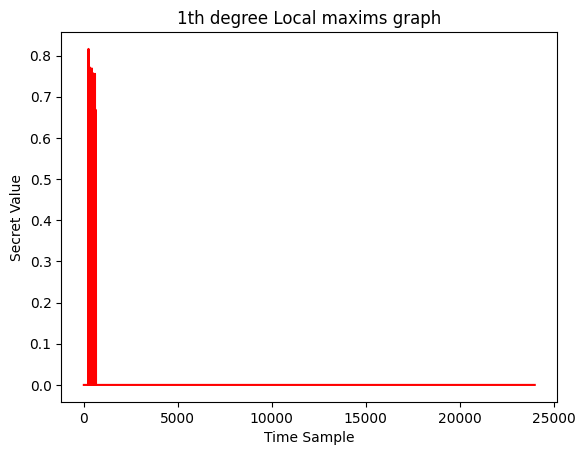

Number of uniques: 2
Number of local maxims: 46
Uniquess: [1, 5]
Local maxims: [1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


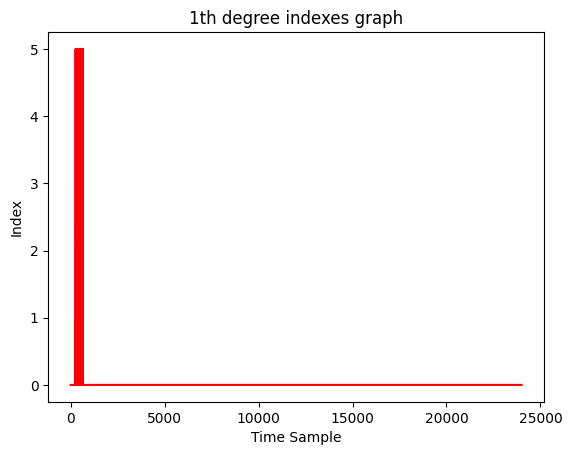

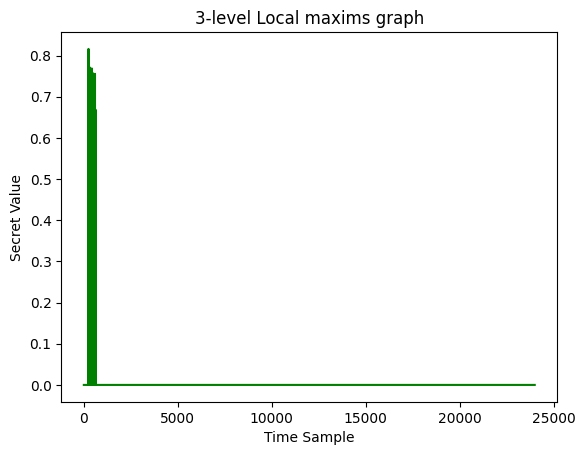

Number of uniques: 2
Number of local maxims: 8
Uniquess: [1, 5]
Local maxims: [1, 5, 5, 5, 5, 5, 5, 5]


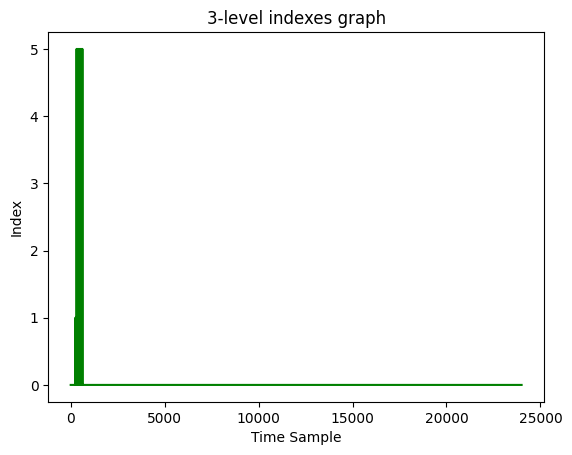

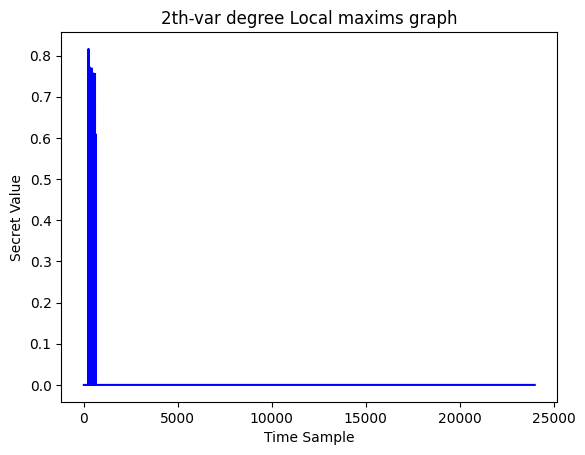

Number of uniques: 2
Number of local maxims: 9
Uniquess: [1, 5]
Local maxims: [1, 5, 5, 5, 5, 5, 5, 5, 5]


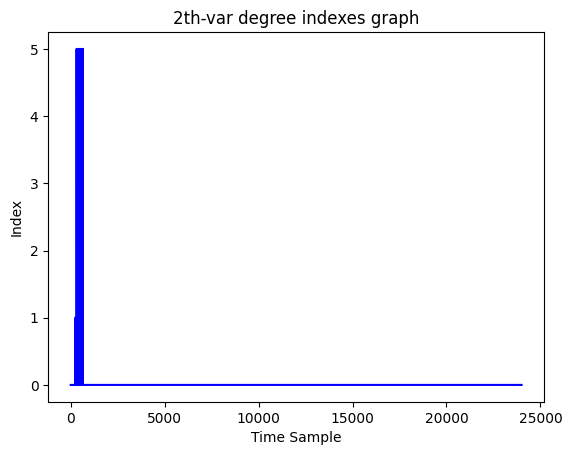

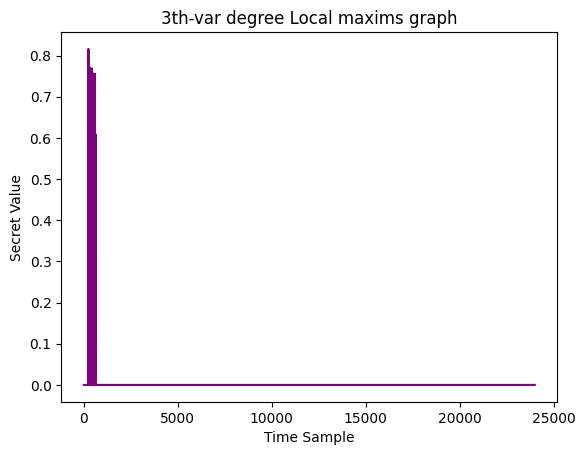

Number of uniques: 2
Number of local maxims: 25
Uniquess: [1, 5]
Local maxims: [1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


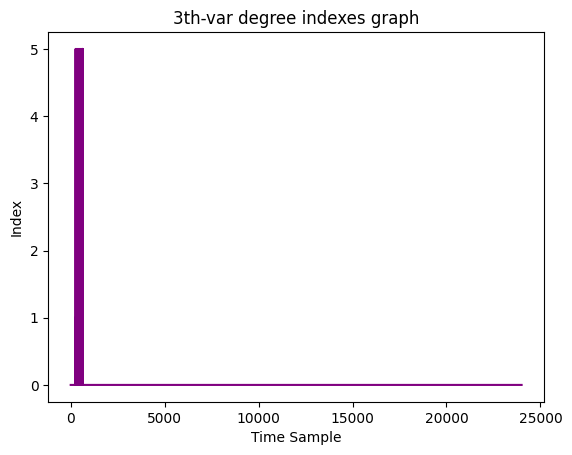

In range 0 - 24000
 Found the soonest secret value is 1, at the time sample 249, with correlation secret_corr = 0.816


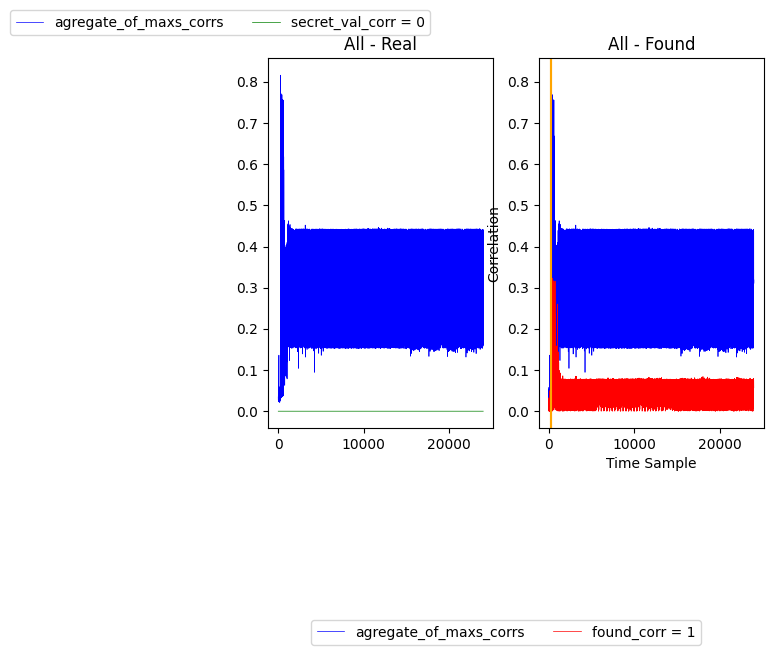

In range 282 - 24000
 Found the soonest secret value is 5, at the time sample 314, with correlation secret_corr = 0.771


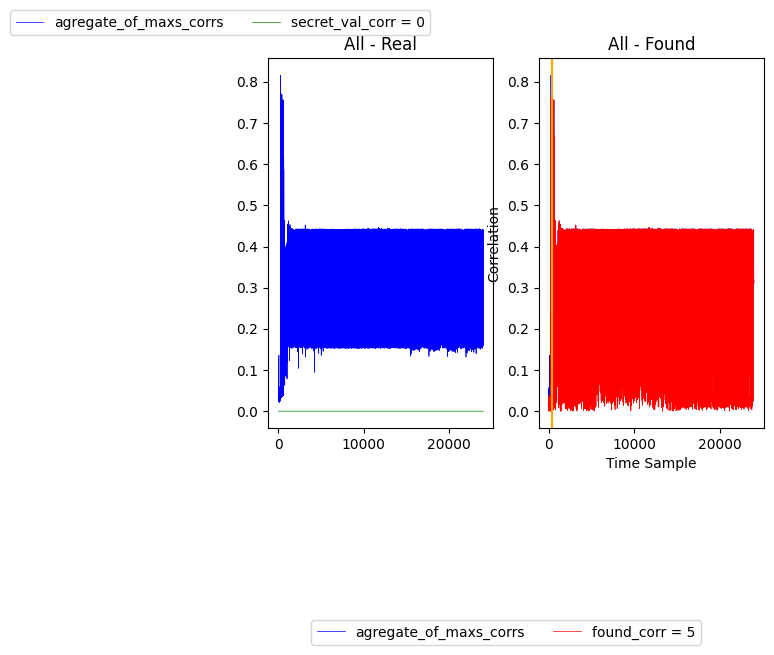

In range 342 - 24000
 Found the soonest secret value is 5, at the time sample 370, with correlation secret_corr = 0.765


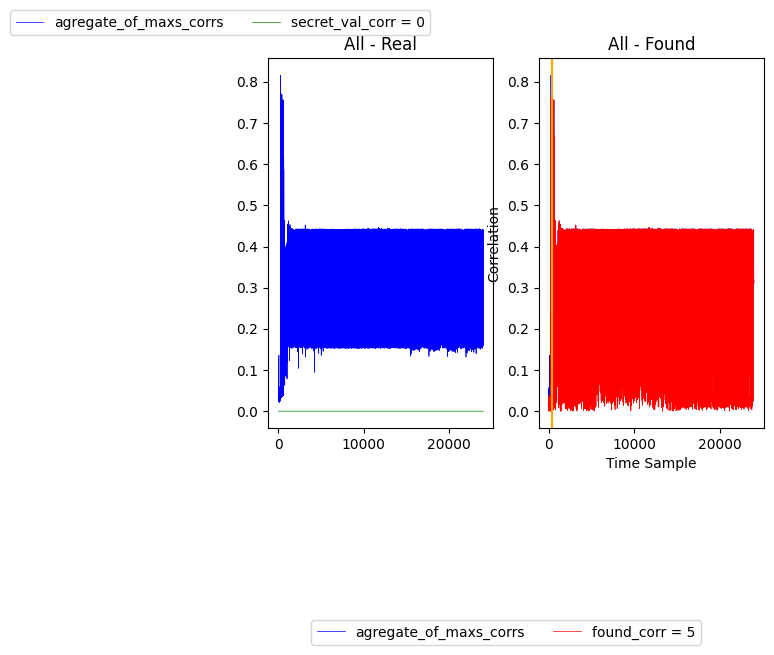

In range 398 - 24000
 Found the soonest secret value is 5, at the time sample 426, with correlation secret_corr = 0.769


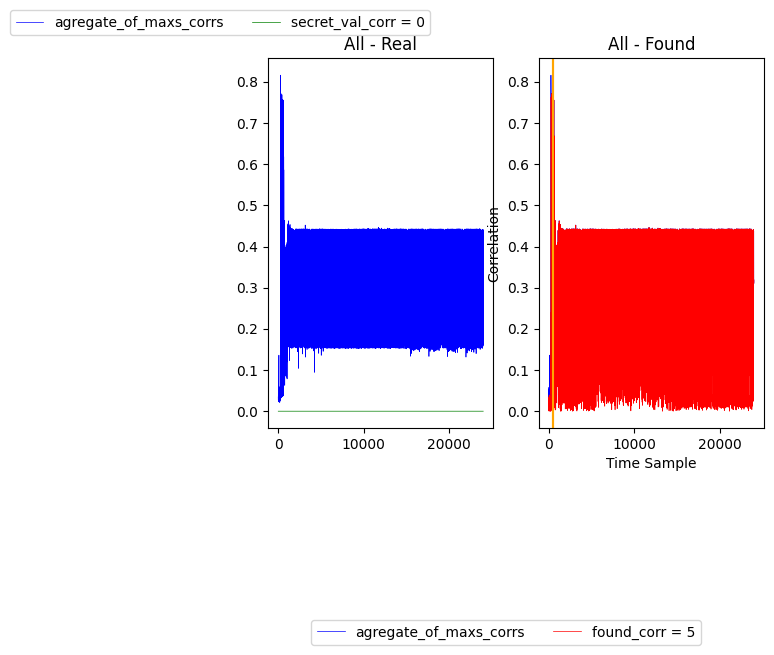

In range 454 - 24000
 Found the soonest secret value is 5, at the time sample 482, with correlation secret_corr = 0.757


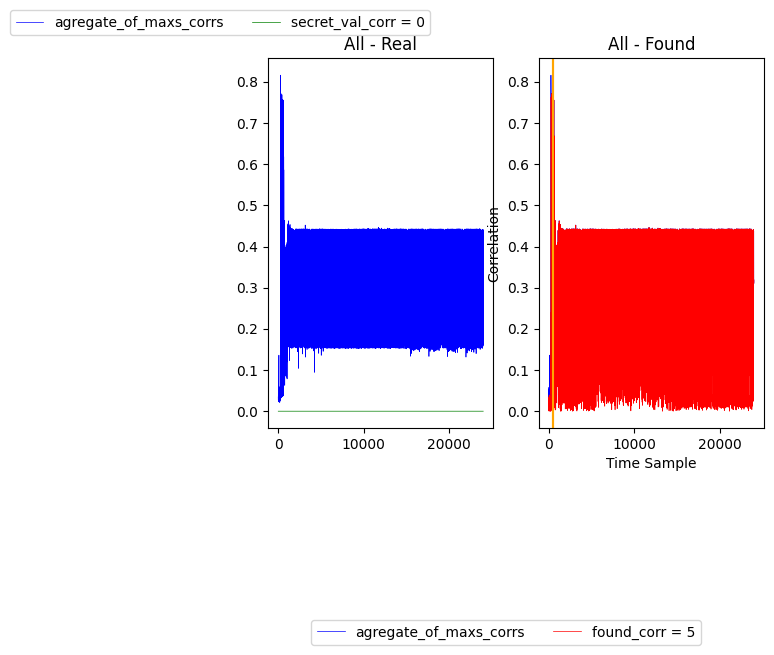

In [42]:
corr_map = abs(np.array(ncorr_all1)[:,:])
analyse_corr(stop_num = 5, maxims_map = None, _index = 0, corr_map: np.ndarray)

## Archive

In [77]:
%run "./Analyser.ipynb"

✔️ The Analyser succesfuly runned.


In [78]:
weights

array([177, 129,   0, 152, 142,   0,  97,  66,   0,  53, 160,   0,  87,
       216,   0,  17, 105,   0, 226,  82,   0])

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

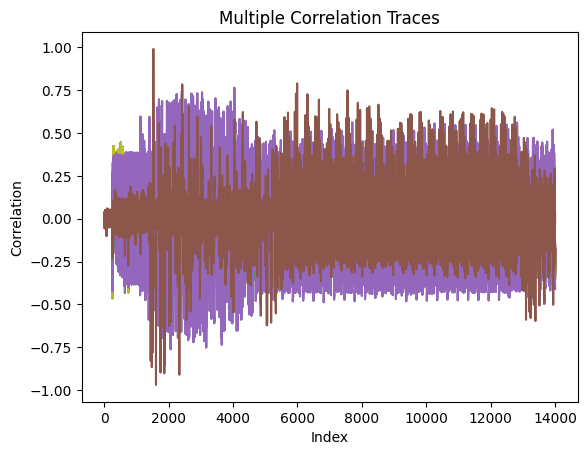

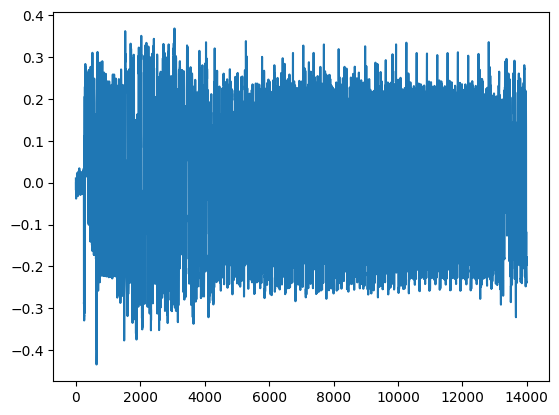

In [79]:
#Analysis
ith_weight = 0
epochs  =  5000
ncorr_all = V2_ANN_CPA_OTS(known_input = rand_input, waves = waves, n_traces = epochs, trace_len = 14000, calc_p_value = False)
plot_mult(np.array(ncorr_all)[:,:], _type = "tmp")
plt.plot(ncorr_all[177])
plt.show()

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

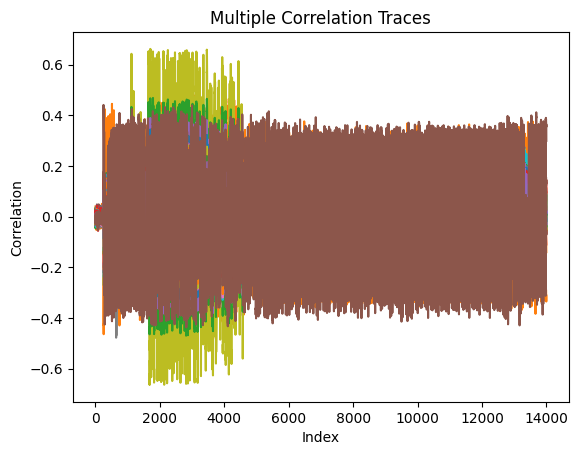

In [26]:
#Analysis
ith_weight = 0
epochs  =  5000
ncorr_all = V2_ANN_CPA_OTS(known_input = rand_input, waves = waves, n_traces = epochs, trace_len = 14000, calc_p_value = False)
plot_mult(np.array(ncorr_all)[:,:], _type = "tmp")
plt.plot(ncorr_all[177])
plt.show()

### Get weights

In [63]:
%run "./Analyser.ipynb"

✔️ The Analyser succesfuly runned.


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.01108657 0.00741666 0.008679   ... 0.33506068 0.32729733 0.31152184]
 [0.01362667 0.00629412 0.01114756 ... 0.01059773 0.01258632 0.0154629 ]
 ...
 [0.01825064 0.02351102 0.00873667 ... 0.1121432  0.10223093 0.09617812]
 [0.00581129 0.00472941 0.00388187 ... 0.02260998 0.00974858 0.02861844]
 [0.00148902 0.00496238 0.00099493 ... 0.36433888 0.32898034 0.29888986]]
14000
 Index of global max: 1681 and global_max_val: 0.664139754140457


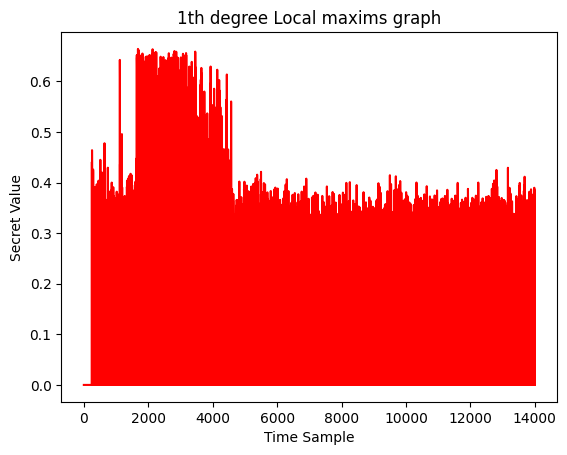

Number of uniques: 56
Number of local maxims: 6381
Uniquess: [255, 1, 2, 136, 177, 128, 127, 206, 49, 50, 130, 179, 178, 78, 77, 65, 207, 191, 73, 109, 25, 155, 126, 129, 63, 39, 202, 81, 217, 185, 249, 153, 19, 101, 71, 237, 167, 51, 105, 111, 213, 75, 141, 251, 242, 201, 37, 183, 145, 205, 147, 233, 115, 40, 23, 219]
Local maxims: [255, 255, 1, 1, 1, 1, 1, 1, 2, 2, 255, 1, 1, 1, 1, 1, 1, 1, 255, 1, 1, 1, 1, 1, 255, 255, 1, 1, 1, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 1, 1, 2, 255, 1, 1, 1, 1, 1, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 1, 255, 255, 255, 255, 255, 1, 1, 1, 1, 255, 1, 1, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 1, 1, 1, 1, 255, 1, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 1, 255, 255, 255, 255, 255, 255, 255, 255, 1, 1, 1, 136, 1, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 1, 1, 1, 255, 255, 255, 255, 255, 255, 255, 2

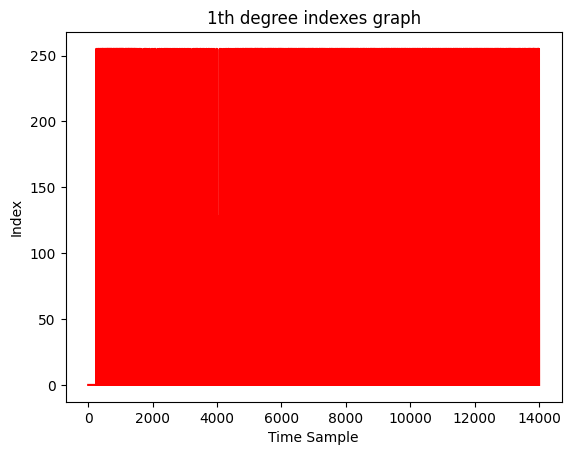

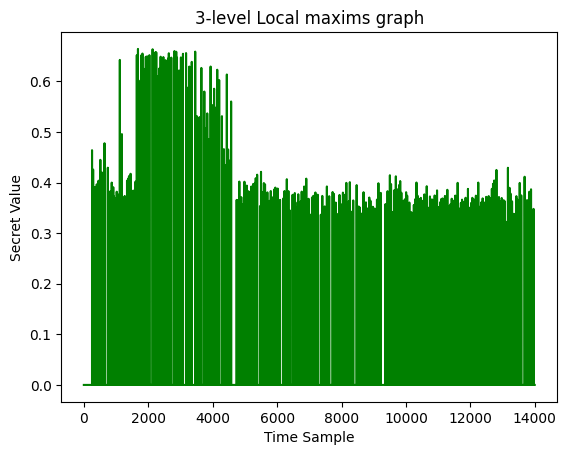

Number of uniques: 4
Number of local maxims: 276
Uniquess: [1, 255, 177, 128]
Local maxims: [1, 255, 255, 255, 255, 1, 1, 255, 1, 255, 1, 255, 177, 1, 255, 255, 255, 255, 255, 255, 255, 128, 128, 255, 255, 255, 1, 128, 255, 1, 255, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 1, 128, 128, 128, 128, 255, 1, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 1, 1, 255, 255, 255, 255, 255, 255, 255, 1, 255, 255, 255, 255, 1, 255, 255, 255, 255, 255, 1, 255, 255, 255, 255, 255, 255, 255, 255, 1, 1, 255, 255, 255, 255, 255, 255, 255, 255, 1, 255, 255, 255, 255, 1, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 

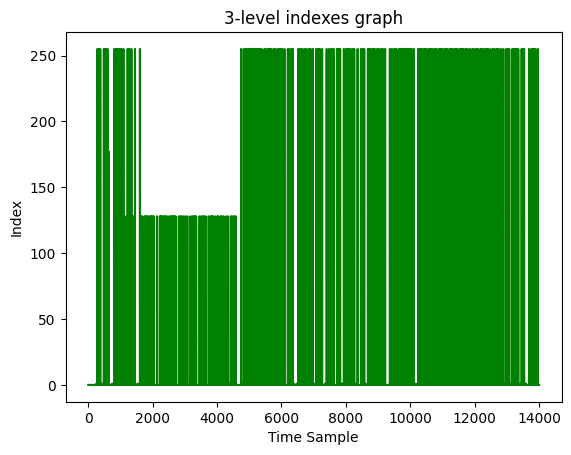

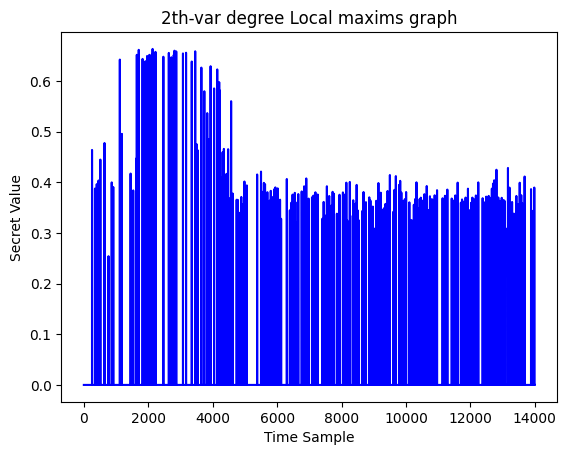

Number of uniques: 4
Number of local maxims: 229
Uniquess: [1, 177, 255, 128]
Local maxims: [1, 1, 1, 1, 1, 177, 255, 255, 255, 128, 128, 255, 1, 128, 128, 128, 128, 128, 128, 128, 128, 128, 1, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 1, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 1, 1, 128, 1, 255, 128, 128, 1, 128, 255, 255, 1, 255, 255, 255, 1, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 1, 255, 255, 255, 1, 255, 1, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 1, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 1, 255, 255, 255, 255, 1, 255, 255, 255, 1, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 1, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 2

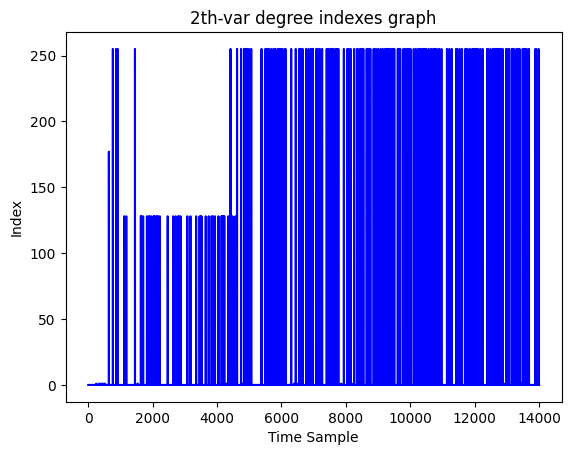

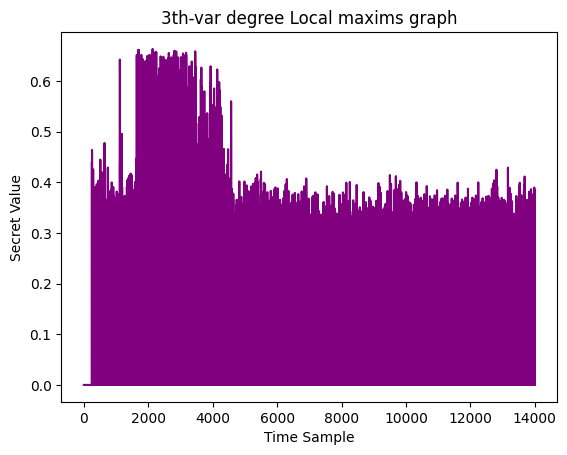

Number of uniques: 56
Number of local maxims: 5116
Uniquess: [255, 1, 2, 136, 177, 128, 127, 206, 49, 50, 130, 179, 178, 78, 77, 65, 207, 191, 73, 109, 25, 155, 126, 129, 63, 39, 202, 81, 217, 185, 249, 153, 19, 101, 71, 237, 167, 51, 105, 111, 213, 75, 141, 251, 242, 201, 37, 183, 145, 205, 147, 233, 115, 40, 23, 219]
Local maxims: [255, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 255, 1, 1, 1, 1, 1, 255, 255, 1, 255, 255, 255, 255, 255, 255, 255, 255, 1, 1, 2, 255, 1, 1, 1, 1, 1, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 1, 255, 1, 1, 1, 255, 1, 1, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 1, 1, 1, 1, 255, 1, 255, 255, 255, 255, 255, 255, 255, 255, 255, 1, 255, 255, 255, 255, 1, 1, 1, 136, 1, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 1, 1, 1, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 177, 177, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255

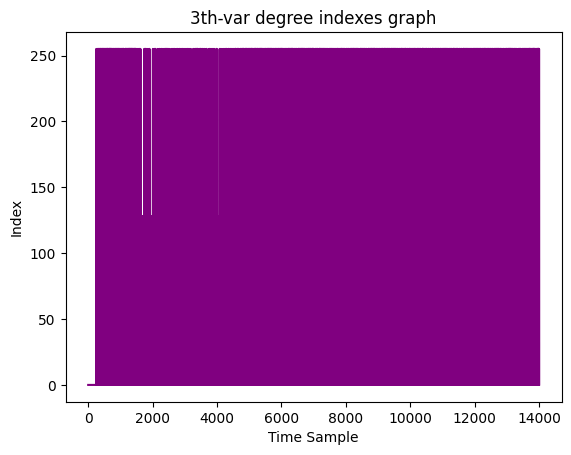

In range 0 - 14000
 Found the soonest secret value is 1, at the time sample 255, with correlation secret_corr = 0.464


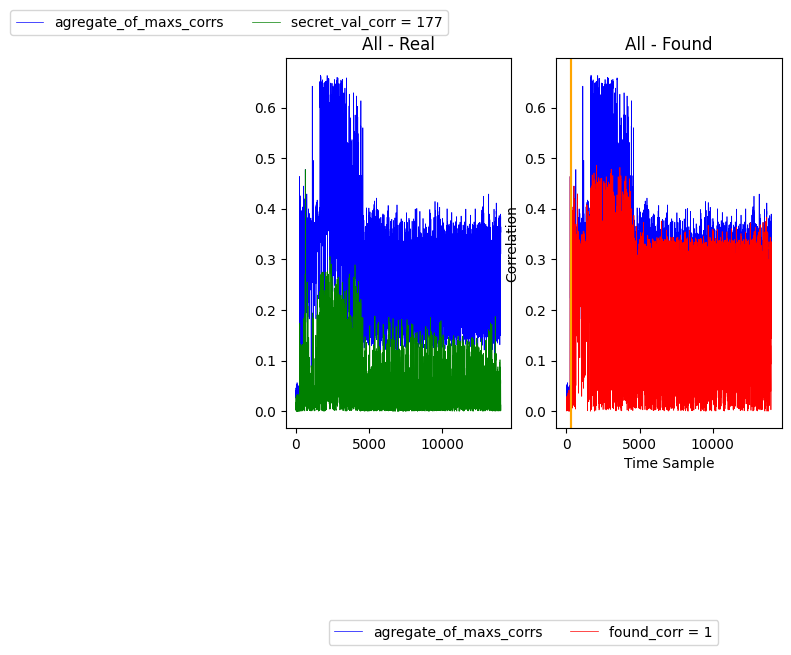

In range 300 - 14000
 Found the soonest secret value is 1, at the time sample 346, with correlation secret_corr = 0.388


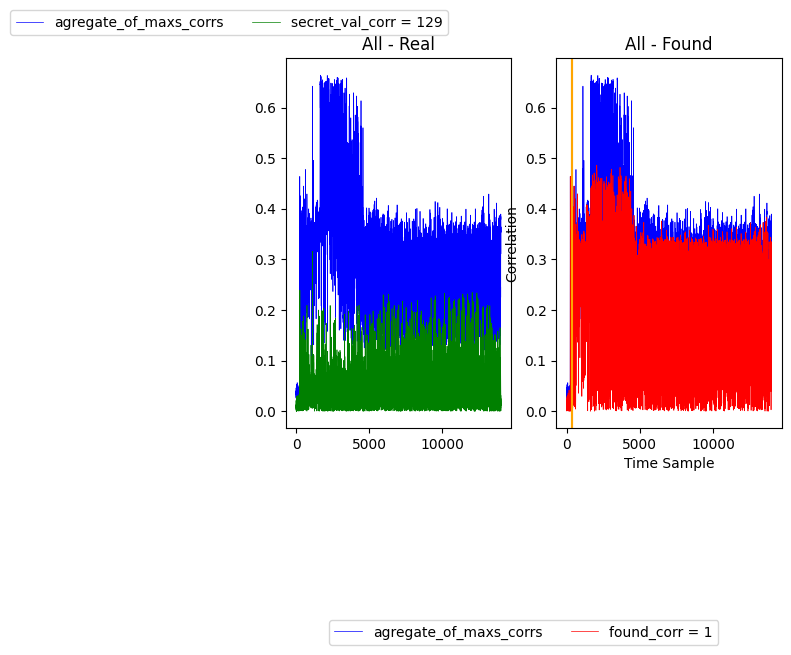

In range 373 - 14000
 Found the soonest secret value is 1, at the time sample 401, with correlation secret_corr = 0.396


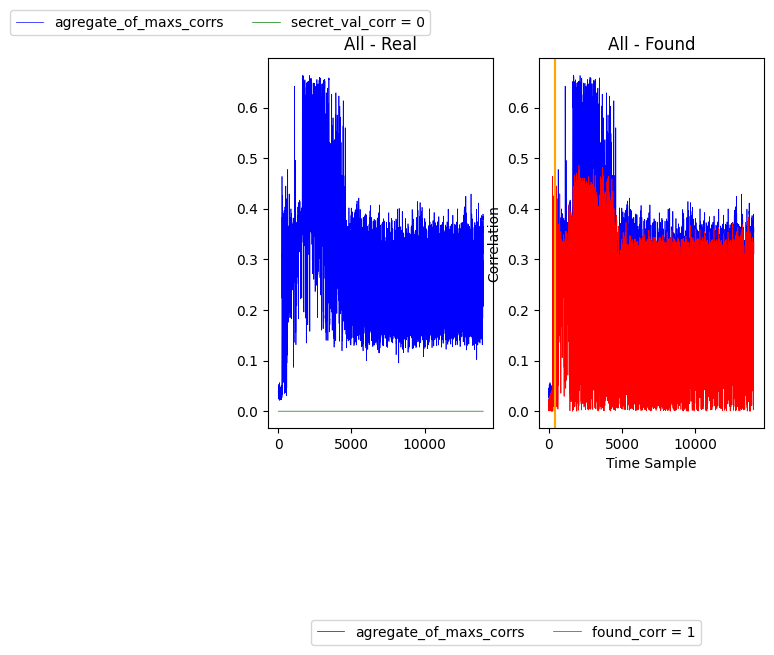

In range 429 - 14000
 Found the soonest secret value is 1, at the time sample 457, with correlation secret_corr = 0.404


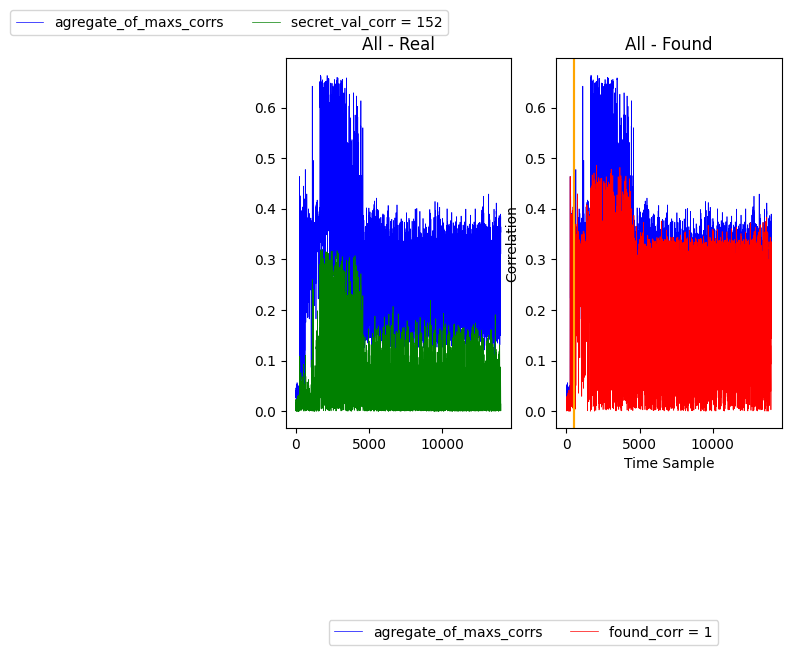

In range 485 - 14000
 Found the soonest secret value is 1, at the time sample 513, with correlation secret_corr = 0.445


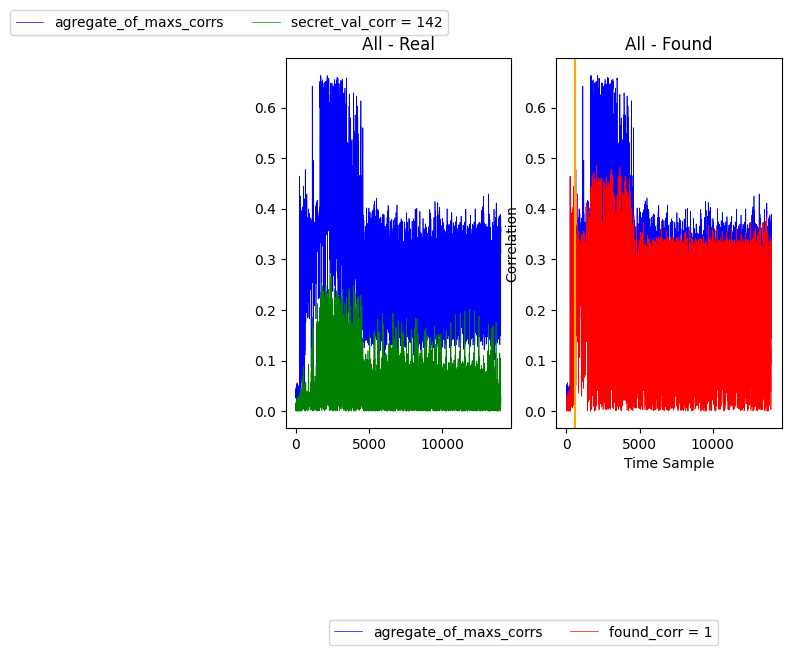

In [64]:
stop_num = 5
maxims_map = None
index = 0
maxims_map = None
corr_map = abs(np.array(ncorr_all))
print(corr_map)
#secret_weight = []
#for i in range(50):
#    secret_weight.append(i)
for secret in weights:
    secret_value, time_sample, correlation, localMax_vector, colmn_maxVector, nextIndex, maxims_map  = get_weight(corr_map,
                                                                                                                 peak_range = 0.5,
                                                                                                                 show_info=True,
                                                                                                                 lastIndex=index,
                                                                                                                 map_2dgrMaxs=maxims_map,
                                                                                                                 mountain_half_dist = 5,
                                                                                                                level = 3)

    index = nextIndex
    figure, axis = plt.subplots(1, 2)
    # Comparison to real correlation
    axis[0].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
    axis[0].plot(corr_map[secret], color='g', label=f'secret_val_corr = {secret}', linewidth=0.5)
    #axis[0].legend(loc='upper right')
    axis[0].legend(bbox_to_anchor=(0.75, 1.15), ncol=2)
    axis[0].set_title("All - Real")
    plt.xlabel("Time Sample")
    plt.ylabel("Correlation")
    plt.axvline(x = index, color = 'orange')

    # Comparison to found correlation
    axis[1].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
    axis[1].plot(corr_map[secret_value], color='r', label=f'found_corr = {secret_value}', linewidth=0.5)
    #axis[1].legend(loc='upper right')
    axis[1].legend(bbox_to_anchor=(0.75, -0.5), ncol=2)
    axis[1].set_title("All - Found")
    plt.axvline(x = index, color = 'orange')

    #figure.savefig(f'{name}_correlation.png')

    stop_num -= 1
    if stop_num == 0:
        break
    plt.show()
    last_found_indx = time_sample